<a href="https://colab.research.google.com/github/OlajideFemi/Carbon-Footprint/blob/main/Copy_of_Dissertation_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Library
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import json
from sklearn import metrics
from sklearn.cluster import DBSCAN
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


<center><h1> West Midlands' Carbon Footprint </h1></center>

### Understanding the Data

<!-- <ul> -->
<!--  <li><h2> Understanding the Data</h2></li> -->
<!--  <li>Handling Missing Values</li> -->
<!--  <li>Remove Duplicates</li> -->
<!--  <li>Standardize Formats</li> -->
<!--  <li>Handle Outliers</li> -->
<!--  <li>Validate and correct data</li>  -->
<!--  <li>Document Changes</li> -->
<!--  <li>Test and iterate</li> -->
<!--  <li>Maintain data provence</li>   -->     
<!-- </ul> -->




<!-- <P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P> -->  

<b><P>Dataset:</b></P>
<p>
C. O'Sullivan, "UK local authority and regional greenhouse gas emissions national statistics: 2005-2021," Department of Business, Energy & Industrial Strategy, London, 2023.</p>
Accessed Date: 29 March, 2023
<P><b>Internet Repositories:</b></P>

<P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P>



<b><P>Stored On:</b></P>

<P>https://olajidefemi.github.io</P>

<P><a href="GitHub">https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx
</a></P>


From exploration of the '1_1' sheet

 <p>Shape of the Data: The dataset contains 7106 rows and 50 columns.</p>
 <p>Summary of the Data:
   The dataset provides details for <b>12 unique regions</b>.
   There are data for 17 unique years, spanning from 2005 to 2021.
   Variables such as 'Industry Electricity', 'Industry Gas', and 'Industry Total'</p>





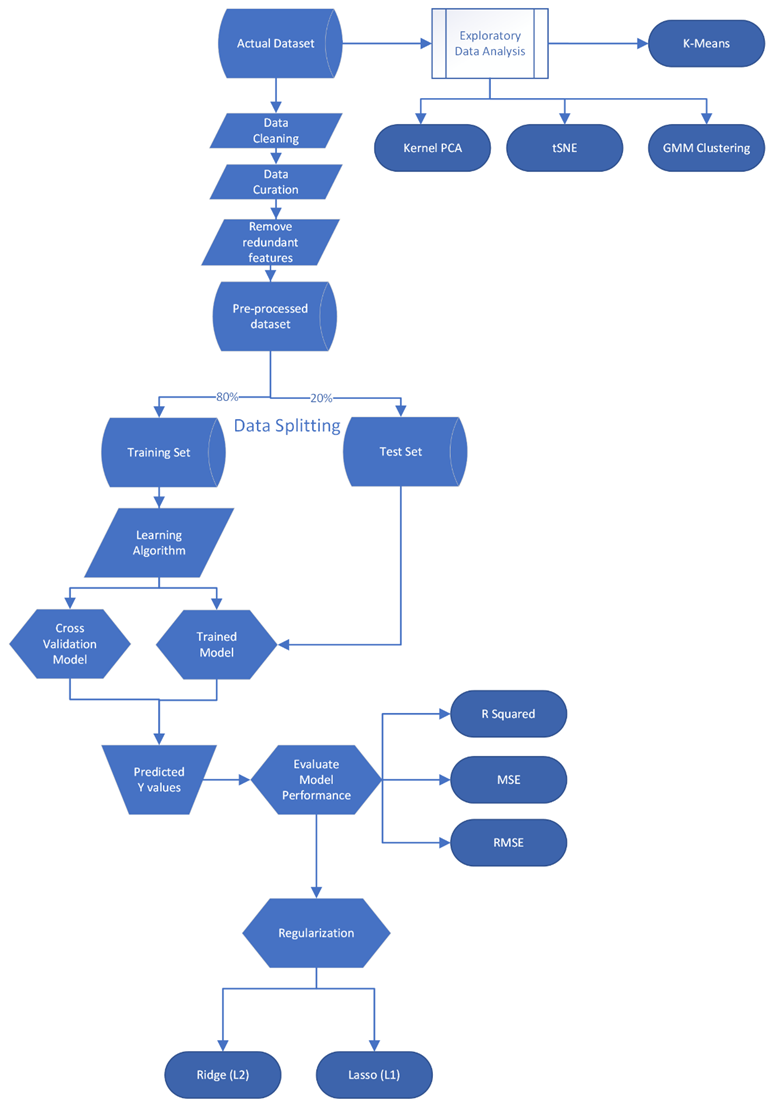

In [2]:
#Load the excel data on sheet 1_1
url = 'https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')
data_1_1.head()


Table 1.1: Local Authority territorial greenhouse gas emissions estimates 2005-2021 (kt CO2e) - Full dataset  \
0  This worksheet contains one table. The table c...                                                             
1  Freeze panes are active on this sheet. To turn...                                                             
2  Filters are active in cells A5 to AX5 and may ...                                                             
3                                     Region/Country                                                             
4                                         North East                                                             

              Unnamed: 1       Unnamed: 2            Unnamed: 3  \
0                    NaN              NaN                   NaN   
1                    NaN              NaN                   NaN   
2                    NaN              NaN                   NaN   
3  Second Tier Authority  Local Authority  Local Authority Code   
4             Darlington       Darlington             E06000005   

      Unnamed: 4            Unnamed: 5     Unnamed: 6  \
0            NaN                   NaN            NaN   
1            NaN                   NaN            NaN   
2            NaN                   NaN            NaN   
3  Calendar Year  Industry Electricity  Industry Gas    
4           2005              51.87311     114.701874   

                       Unnamed: 7        Unnamed: 8      Unnamed: 9  ...  \
0                             NaN               NaN             NaN  ...   
1                             NaN               NaN             NaN  ...   
2                             NaN               NaN             NaN  ...   
3  Large Industrial Installations  Industry 'Other'  Industry Total  ...   
4                        0.045681         43.073543      209.694209  ...   

         Unnamed: 40        Unnamed: 41 Unnamed: 42               Unnamed: 43  \
0                NaN                NaN         NaN                       NaN   
1                NaN                NaN         NaN                       NaN   
2                NaN                NaN         NaN                       NaN   
3  Agriculture Soils  Agriculture Total    Landfill  Waste Management 'Other'   
4          12.699185            63.7069   34.256022                  5.613394   

              Unnamed: 44  Unnamed: 45                            Unnamed: 46  \
0                     NaN          NaN                                    NaN   
1                     NaN          NaN                                    NaN   
2                     NaN          NaN                                    NaN   
3  Waste Management Total  Grand Total  Population ('000s, mid-year estimate)   
4               39.869415   968.661604                                100.287   

                    Unnamed: 47 Unnamed: 48                  Unnamed: 49  
0                           NaN         NaN                          NaN  
1                           NaN         NaN                          NaN  
2                           NaN         NaN                          NaN  
3  Per Capita Emissions (tCO2e)  Area (km2)  Emissions per km2 (kt CO2e)  
4                      9.658895    197.4758                     4.905217  

[5 rows x 50 columns]

In [3]:
# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

In [4]:
data_1_1_actual

3     Region/Country Second Tier Authority Local Authority  \
4         North East            Darlington      Darlington   
5         North East            Darlington      Darlington   
6         North East            Darlington      Darlington   
7         North East            Darlington      Darlington   
8         North East            Darlington      Darlington   
...              ...                   ...             ...   
7105  National Total        National Total  National Total   
7106  National Total        National Total  National Total   
7107  National Total        National Total  National Total   
7108  National Total        National Total  National Total   
7109  National Total        National Total  National Total   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
4               E06000005          2005             51.87311    114.701874   
5               E06000005          2006            55.398988     97.614091   
6               E06000005          2007            52.249398     95.167732   
7               E06000005          2008            51.651166     95.266031   
8               E06000005          2009            45.607413     82.045964   
...                   ...           ...                  ...           ...   
7105                  NaN          2017         18256.184881  15602.265158   
7106                  NaN          2018         20997.236163  19161.407779   
7107                  NaN          2019         18512.578663  18433.106892   
7108                  NaN          2020         15164.001049  17463.024978   
7109                  NaN          2021         17109.121337  20037.052043   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
4                          0.045681        43.073543     209.694209  ...   
5                          0.065836        42.086928     195.165842  ...   
6                          0.074503         43.79521     191.286843  ...   
7                          0.055964        35.982972     182.956132  ...   
8                          1.061014        26.863721     155.578112  ...   
...                             ...              ...            ...  ...   
7105                   33619.941766     17990.618473   85469.010278  ...   
7106                   32309.811618     17713.459471   90181.915031  ...   
7107                     31951.4012     17364.788398   86261.875153  ...   
7108                   30135.710515      17584.10729   80346.843833  ...   
7109                   29267.622916     17927.304689   84341.100985  ...   

3    Agriculture Soils Agriculture Total      Landfill  \
4            12.699185           63.7069     34.256022   
5            11.659759         59.927177     31.802024   
6            12.166507         59.716732     37.048534   
7             12.55795         59.566044      7.662955   
8            11.405542         57.689627     16.001037   
...                ...               ...           ...   
7105       9689.245642      51301.203756  15821.005923   
7106       9573.565596      51380.522611  15911.984565   
7107       9770.415392      50706.546836  15684.547926   
7108       8890.946812      49220.899615  14304.397217   
7109       9247.865828      50711.980197  13618.050957   

3    Waste Management 'Other' Waste Management Total    Grand Total  \
4                    5.613394              39.869415     968.661604   
5                     6.57408              38.376104     943.627506   
6                     6.81813              43.866664     925.275164   
7                    6.771385               14.43434     876.045542   
8                    6.053694              22.054731     805.592471   
...                       ...                    ...            ...   
7105              5131.240623           20952.246546  437824.383087   
7106              5088.278772           21000.263337  430745.509283   
7107              5035.738233           20720.286159  416856.663324  

In [5]:
# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)
data_1_1_actual

3     Region/Country Second Tier Authority Local Authority  \
0         North East            Darlington      Darlington   
1         North East            Darlington      Darlington   
2         North East            Darlington      Darlington   
3         North East            Darlington      Darlington   
4         North East            Darlington      Darlington   
...              ...                   ...             ...   
7101  National Total        National Total  National Total   
7102  National Total        National Total  National Total   
7103  National Total        National Total  National Total   
7104  National Total        National Total  National Total   
7105  National Total        National Total  National Total   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
0               E06000005          2005             51.87311    114.701874   
1               E06000005          2006            55.398988     97.614091   
2               E06000005          2007            52.249398     95.167732   
3               E06000005          2008            51.651166     95.266031   
4               E06000005          2009            45.607413     82.045964   
...                   ...           ...                  ...           ...   
7101                  NaN          2017         18256.184881  15602.265158   
7102                  NaN          2018         20997.236163  19161.407779   
7103                  NaN          2019         18512.578663  18433.106892   
7104                  NaN          2020         15164.001049  17463.024978   
7105                  NaN          2021         17109.121337  20037.052043   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
0                          0.045681        43.073543     209.694209  ...   
1                          0.065836        42.086928     195.165842  ...   
2                          0.074503         43.79521     191.286843  ...   
3                          0.055964        35.982972     182.956132  ...   
4                          1.061014        26.863721     155.578112  ...   
...                             ...              ...            ...  ...   
7101                   33619.941766     17990.618473   85469.010278  ...   
7102                   32309.811618     17713.459471   90181.915031  ...   
7103                     31951.4012     17364.788398   86261.875153  ...   
7104                   30135.710515      17584.10729   80346.843833  ...   
7105                   29267.622916     17927.304689   84341.100985  ...   

3    Agriculture Soils Agriculture Total      Landfill  \
0            12.699185           63.7069     34.256022   
1            11.659759         59.927177     31.802024   
2            12.166507         59.716732     37.048534   
3             12.55795         59.566044      7.662955   
4            11.405542         57.689627     16.001037   
...                ...               ...           ...   
7101       9689.245642      51301.203756  15821.005923   
7102       9573.565596      51380.522611  15911.984565   
7103       9770.415392      50706.546836  15684.547926   
7104       8890.946812      49220.899615  14304.397217   
7105       9247.865828      50711.980197  13618.050957   

3    Waste Management 'Other' Waste Management Total    Grand Total  \
0                    5.613394              39.869415     968.661604   
1                     6.57408              38.376104     943.627506   
2                     6.81813              43.866664     925.275164   
3                    6.771385               14.43434     876.045542   
4                    6.053694              22.054731     805.592471   
...                       ...                    ...            ...   
7101              5131.240623           20952.246546  437824.383087   
7102              5088.278772           21000.263337  430745.509283   
7103              5035.738233           20720.286159  416856.663324  

In [6]:
# Display the shape of the data
data_shape = data_1_1_actual.shape

data_shape

(7106, 50)

In [7]:
# Get a summary of the data
data_summary = data_1_1_actual.describe()

data_summary

3      Region/Country Second Tier Authority Local Authority  \
count            7106                  7106            7106   
unique             27                   194             418   
top        South East              Scotland      Darlington   
freq             1190                   544              17   

3      Local Authority Code  Calendar Year  Industry Electricity  \
count                  6358           7106            7106.00000   
unique                  374             17            7106.00000   
top               E06000005           2005              51.87311   
freq                     17            418               1.00000   

3       Industry Gas   Large Industrial Installations  Industry 'Other'  \
count          7106.0                          7106.0            7106.0   
unique         7002.0                          6118.0            7073.0   
top               0.0                             0.0               0.0   
freq            105.0                           925.0              34.0   

3       Industry Total  ...  Agriculture Soils  Agriculture Total  Landfill  \
count      7106.000000  ...             7106.0             7106.0    7106.0   
unique     7106.000000  ...             7073.0             7073.0    7090.0   
top         209.694209  ...                0.0                0.0       0.0   
freq          1.000000  ...               34.0               34.0      17.0   

3       Waste Management 'Other'  Waste Management Total  Grand Total  \
count                     7106.0                  7106.0  7106.000000   
unique                    7073.0                  7090.0  7106.000000   
top                          0.0                     0.0   968.661604   
freq                        34.0                    17.0     1.000000   

3       Population ('000s, mid-year estimate)  Per Capita Emissions (tCO2e)  \
count                                  7106.0                        7106.0   
unique                                 7050.0                        7073.0   
top                                       0.0                           0.0   
freq                                     34.0                          34.0   

3       Area (km2)  Emissions per km2 (kt CO2e)  
count       7106.0                       7106.0  
unique       417.0                       7073.0  
top            0.0                          0.0  
freq          34.0                         34.0  

[4 rows x 50 columns]

In [8]:
# Get a view of the datatypes

data_types = data_1_1_actual.dtypes
data_types

3
Region/Country                            object
Second Tier Authority                     object
Local Authority                           object
Local Authority Code                      object
Calendar Year                             object
Industry Electricity                      object
Industry Gas                              object
Large Industrial Installations            object
Industry 'Other'                          object
Industry Total                            object
Commercial Electricity                    object
Commercial Gas                            object
Commercial 'Other'                        object
Commercial Total                          object
Public Sector Electricity                 object
Public Sector Gas                         object
Public Sector 'Other'                     object
Public Sector Total                       object
Domestic Electricity                      object
Domestic Gas                              object
Domestic 'Other'  

In [9]:
# Check for missing values
missing_values = data_1_1_actual.isnull().sum()

missing_values

3
Region/Country                              0
Second Tier Authority                       0
Local Authority                             0
Local Authority Code                      748
Calendar Year                               0
Industry Electricity                        0
Industry Gas                                0
Large Industrial Installations              0
Industry 'Other'                            0
Industry Total                              0
Commercial Electricity                      0
Commercial Gas                              0
Commercial 'Other'                          0
Commercial Total                            0
Public Sector Electricity                   0
Public Sector Gas                           0
Public Sector 'Other'                       0
Public Sector Total                         0
Domestic Electricity                        0
Domestic Gas                                0
Domestic 'Other'                            0
Domestic Total                  

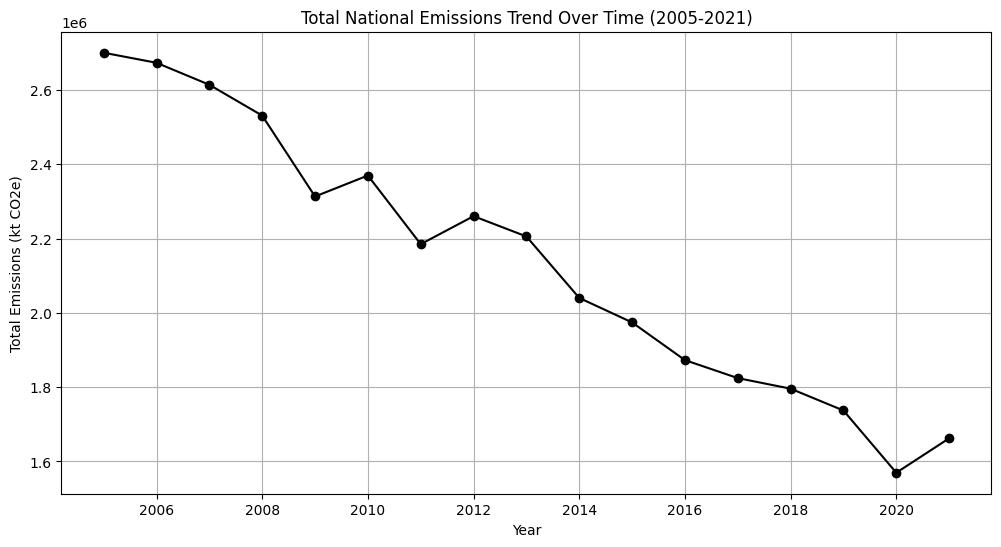

In [10]:
import matplotlib.pyplot as plt

# Group by 'Calendar Year' and sum the 'Grand Total' column to get total emissions for each year
yearly_emissions = data_1_1_actual.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the trend over time
plt.figure(figsize=(12, 6))
yearly_emissions.plot(marker='o', linestyle='-', color='black')
plt.title('Total National Emissions Trend Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()

In [11]:
# Convert the 'Grand Total' column to a numeric type
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Local Authority Region/Country' and sum the 'Grand Total' column to get total emissions for each region again
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
regional_emissions = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Sort the regional emissions in descending order and get the name of the first region
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
highest_emission_region = regional_emissions.sort_values(ascending=False).index[0]
highest_emission_value = regional_emissions.sort_values(ascending=False).iloc[0]

# Sort the regional emissions in ascending order and get the name of the first region
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
lowest_emission_region = regional_emissions.sort_values(ascending=True).index[0]
lowest_emission_value = regional_emissions.sort_values(ascending=True).iloc[0]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value


('National Total', 8763483.862937795, 'Unallocated', 70997.7272303627)

In [12]:
regional_emissions

Region/Country
East Midlands                     1.246579e+06
East Midlands Total               6.759135e+05
East of England                   1.518514e+06
East of England Total             7.986982e+05
England Total                     6.830838e+06
London                            7.105470e+05
London Total                      7.105470e+05
National Total                    8.763484e+06
North East                        4.513099e+05
North East Total                  4.513099e+05
North West                        1.419484e+06
North West Total                  9.620017e+05
Northern Ireland                  3.910081e+05
Northern Ireland Total            3.910081e+05
Scotland                          8.602071e+05
Scotland Total                    8.602071e+05
South East                        1.713013e+06
South East Total                  1.001996e+06
South West                        1.073928e+06
South West Total                  6.987242e+05
Unallocated                       7.099773e+0

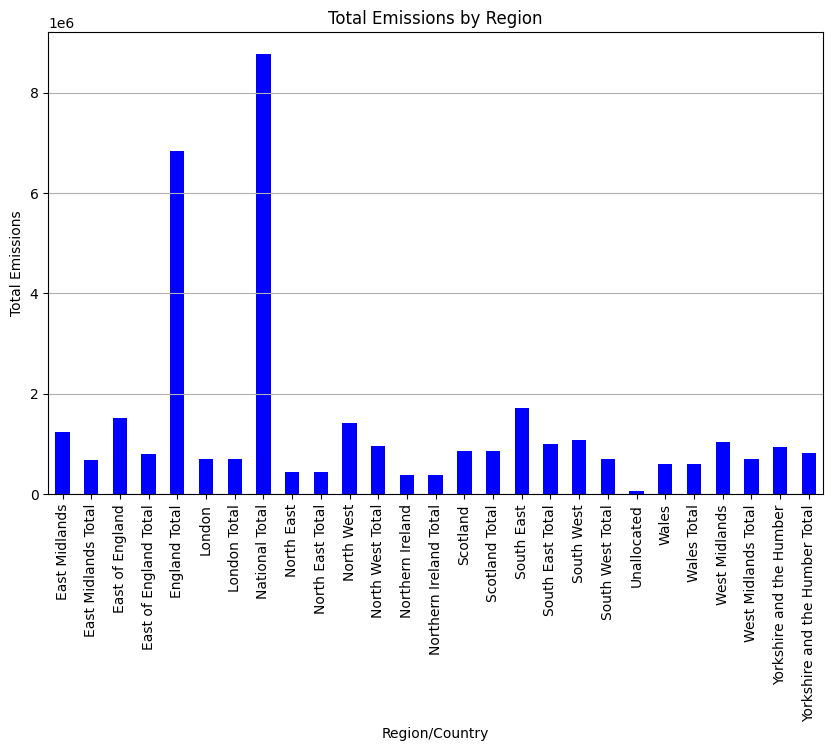

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [14]:
# Drop 'National Total','England Total' and 'Unallocated' from the Series
regional_emissions = regional_emissions.drop(labels=['National Total','England Total', 'Unallocated'])

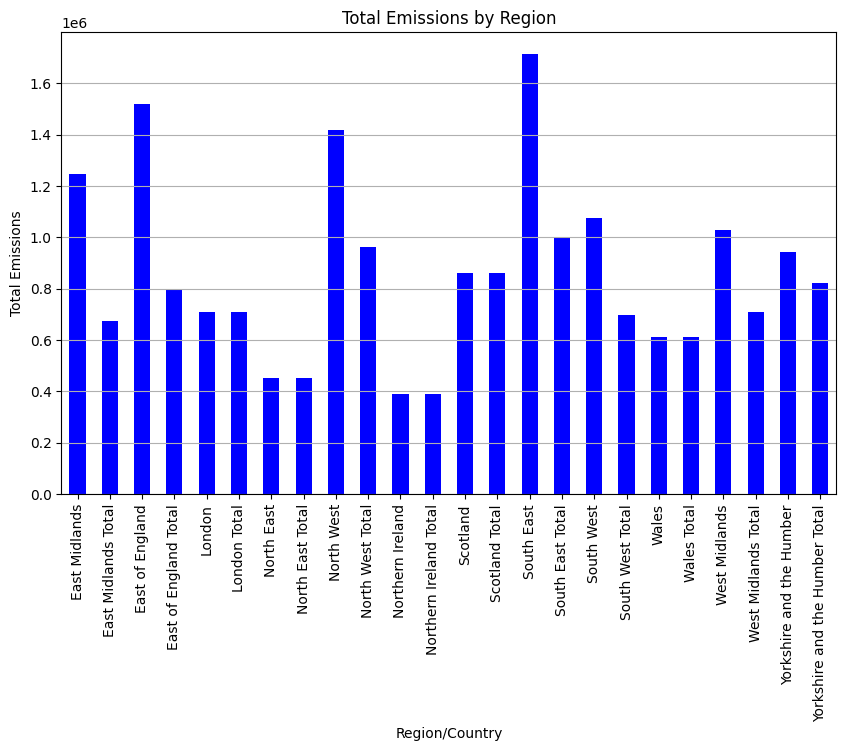

In [15]:
plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [16]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter out rows where 'Region/Country' ends with 'Total' or is 'Unallocated'
data_1_1_filtered = data_1_1_actual[
    ~data_1_1_actual['Region/Country'].str.endswith('Total') &
    ~data_1_1_actual['Region/Country'].str.contains('Unallocated', case=False)
]

# Group by 'Region/Country' and sum the 'Grand Total' column
regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions.idxmax()
lowest_emission_region = regional_emissions.idxmin()

# Get the corresponding values for the highest and lowest emissions
highest_emission_value = regional_emissions[highest_emission_region]
lowest_emission_value = regional_emissions[lowest_emission_region]

# Output the results
(highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value)

('South East', 1713012.733123874, 'Northern Ireland', 391008.14327239833)

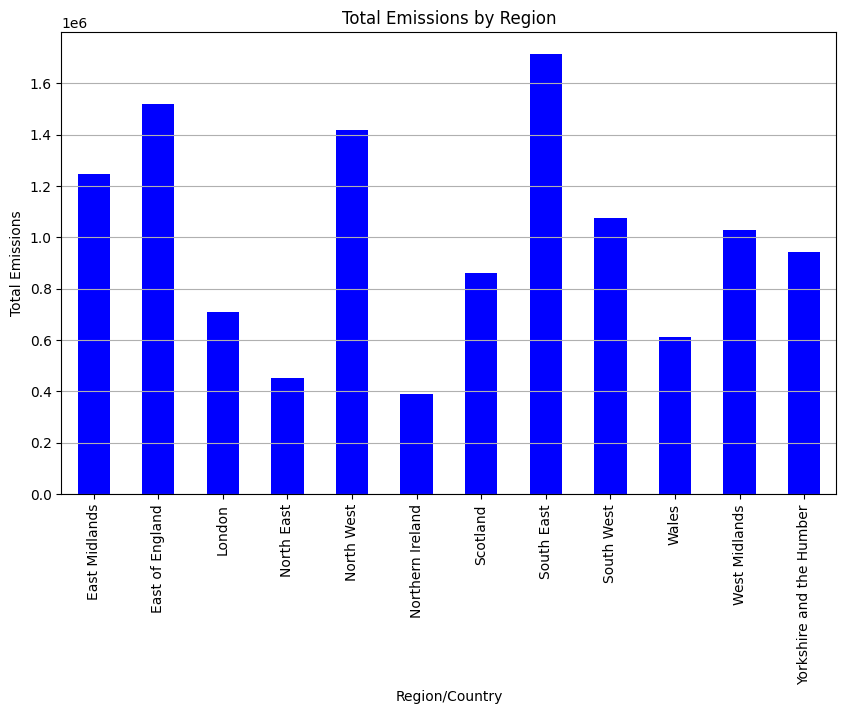

In [17]:
import matplotlib.pyplot as plt

# regional_emissions
# regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [18]:
regional_emissions

Region/Country
East Midlands               1.246579e+06
East of England             1.518514e+06
London                      7.105470e+05
North East                  4.513099e+05
North West                  1.419484e+06
Northern Ireland            3.910081e+05
Scotland                    8.602071e+05
South East                  1.713013e+06
South West                  1.073928e+06
Wales                       6.104329e+05
West Midlands               1.030287e+06
Yorkshire and the Humber    9.443414e+05
Name: Grand Total, dtype: float64

In [19]:
import geopandas as gpd
#file_path = 'uk_regions.geojson'
#file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'
#uk_regions_gdf = gpd.read_file(file_path)
#uk_regions_gdf_head = uk_regions_gdf.head()


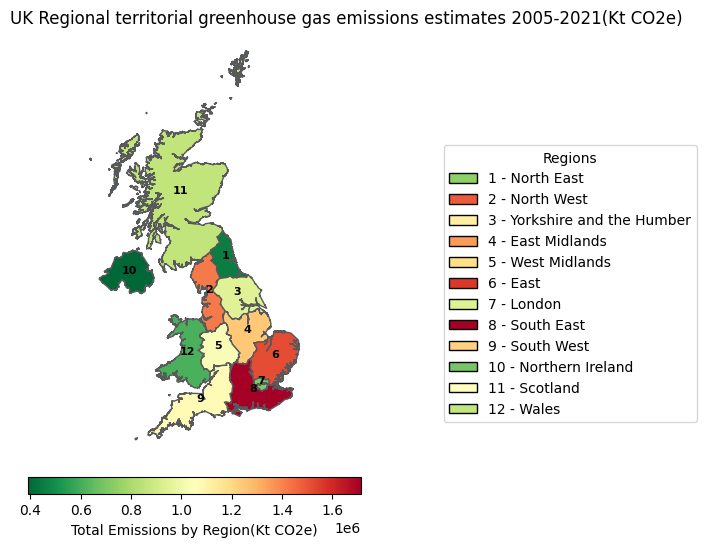

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'

uk_regions_gdf = gpd.read_file(file_path)

#emissions_data = {
#    "Region/Country": [
#        "East Midlands", "East of England", "London", "North East", "North West",
#        "Northern Ireland", "Scotland", "South East", "South West", "Wales",
#        "West Midlands", "Yorkshire and the Humber"
#    ],
#    "Grand Total": [
#        1.246579e+06, 1.518514e+06, 7.105470e+05, 4.513099e+05, 1.419484e+06,
#        3.910081e+05, 8.602071e+05, 1.713013e+06, 1.073928e+06, 6.104329e+05,
#        1.030287e+06, 9.443414e+05
#    ]
#}

emissions_df = regional_emissions.reset_index()
emissions_df.columns = ['Region/Country', 'Grand Total']

#emissions_df = pd.DataFrame(emissions_data)
emissions_df['Region/Country'] = emissions_df['Region/Country'].replace({'East of England': 'East'})

uk_regions_with_emissions = uk_regions_gdf.merge(emissions_df, left_on='rgn19nm', right_on='Region/Country', how='left')

uk_regions_with_emissions['Number'] = range(1, len(uk_regions_with_emissions) + 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
uk_regions_with_emissions.plot(column='Grand Total', ax=ax, cmap='RdYlGn_r', edgecolor='#58595B')

cmap = plt.cm.RdYlGn_r
norm = mcolors.Normalize(vmin=uk_regions_with_emissions['Grand Total'].min(), vmax=uk_regions_with_emissions['Grand Total'].max())

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Total Emissions by Region(Kt CO2e)')

for idx, row in uk_regions_with_emissions.iterrows():
    plt.annotate(text=str(row['Number']), xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight='bold', color='black', fontsize=8)

legend_elements = [Patch(facecolor=plt.cm.RdYlGn_r(emission / uk_regions_with_emissions['Grand Total'].max()), edgecolor='black',
                         label=f"{number} - {region}") for number, region, emission in zip(uk_regions_with_emissions['Number'],
                         uk_regions_with_emissions['rgn19nm'], uk_regions_with_emissions['Grand Total'])]

ax.legend(handles=legend_elements, title="Regions", bbox_to_anchor=(1.55, 0.75), loc='upper left')

ax.set_title('UK Regional territorial greenhouse gas emissions estimates 2005-2021(Kt CO2e)', loc='left', position=(-0.3, 1))
plt.axis('off')
plt.show()


The term "**UK Regional Territorial Greenhouse Gas Emissions Estimates 2005-2021 (Kt CO2e)**" refers to statistical data that quantifies the amount of greenhouse gases emitted within the territorial boundaries of the United Kingdom's regions from the years 2005 to 2021. The data is expressed in kilotonnes of carbon dioxide equivalent (Kt CO2e)

**UK Regional**: This specifies that the data is broken down by different regions within the United Kingdom, such as England, Scotland, Wales, and Northern Ireland etc.

**Greenhouse Gas Emissions**: Greenhouse gases include carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), and fluorinated gases, all of which trap heat in the Earth's atmosphere, leading to global warming and climate change. The data encompasses all these types of emissions.

**Kt CO2e**: Kilotonnes of carbon dioxide equivalent is a standard unit of measurement that equates the impact of different greenhouse gases to the equivalent amount of CO2, based on their global warming potential (GWP). This unit allows for the combination of different greenhouse gases into a single figure that represents their overall impact on global warming.

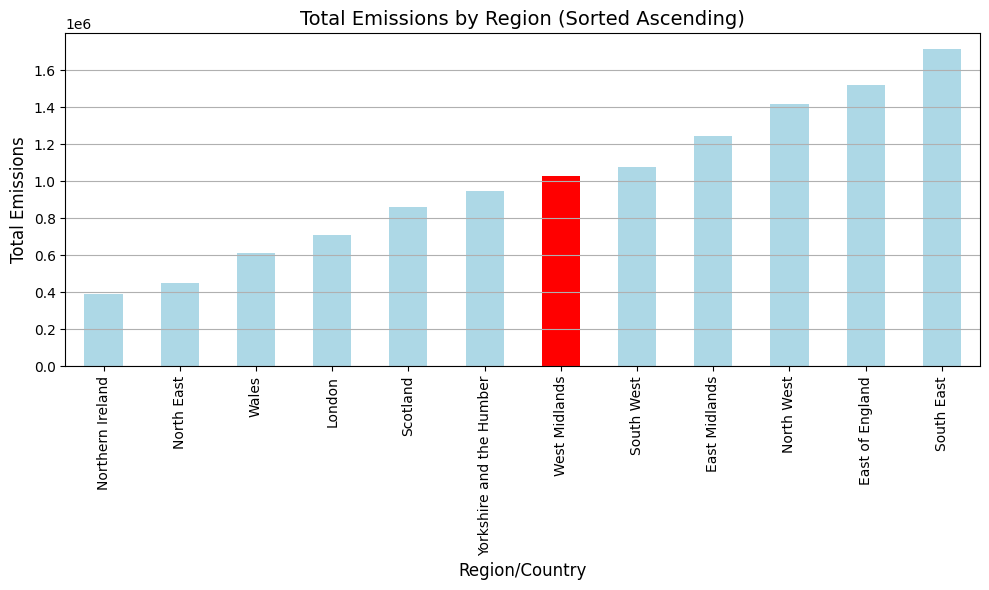

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the series in ascending order for the plot
sorted_emissions = regional_emissions.sort_values()

colors = ['red' if region == 'West Midlands' else 'lightblue' for region in sorted_emissions.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
sorted_emissions.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region (Sorted Ascending)', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Region/Country' and sum the 'Grand Total' column
regional_emissions_total = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Drop 'National Total' and 'Unallocated' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['National Total', 'Unallocated'])

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions_total.idxmax()
lowest_emission_region = regional_emissions_total.idxmin()

# Get the corresponding values for the highest and lowest emissions
highest_emission_value = regional_emissions_total[highest_emission_region]
lowest_emission_value = regional_emissions_total[lowest_emission_region]

# Output the results
(highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value)

('England Total', 6830837.969058414, 'Northern Ireland', 391008.14327239833)

In [23]:
# Convert 'Grand Total' to numeric, coercing errors to NaN
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Keep only rows where 'Region/Country' ends with 'total'
data_1_1_filtered = data_1_1_actual[
    data_1_1_actual['Region/Country'].str.lower().str.endswith('total')
]


# Group by 'Region/Country' and sum 'Grand Total' for remaining regions
regional_emissions_total = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Drop 'Unallocated' from the Series
#regional_emissions_total = regional_emissions_total.drop(labels=['Unallocated'])

# Drop 'National Total' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['National Total'])

# Drop 'England Total' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['England Total'])

# Identify the highest and lowest emission regions
highest_emission_region = regional_emissions_total.idxmax()
lowest_emission_region = regional_emissions_total.idxmin()

# Get the highest and lowest emission values
highest_emission_value = regional_emissions_total[highest_emission_region]
lowest_emission_value = regional_emissions_total[lowest_emission_region]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value

('South East Total',
 1001996.0574329,
 'Northern Ireland Total',
 391008.14327239833)

In [24]:
# Sort the regional emissions in descending order and get the name of the first region
highest_emission_region = regional_emissions.sort_values(ascending=False).index[0]
highest_emission_value = regional_emissions.sort_values(ascending=False).iloc[0]

# Sort the regional emissions in ascending order and get the name of the first region
lowest_emission_region = regional_emissions.sort_values(ascending=True).index[0]
lowest_emission_value = regional_emissions.sort_values(ascending=True).iloc[0]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value

('South East', 1713012.733123874, 'Northern Ireland', 391008.14327239833)

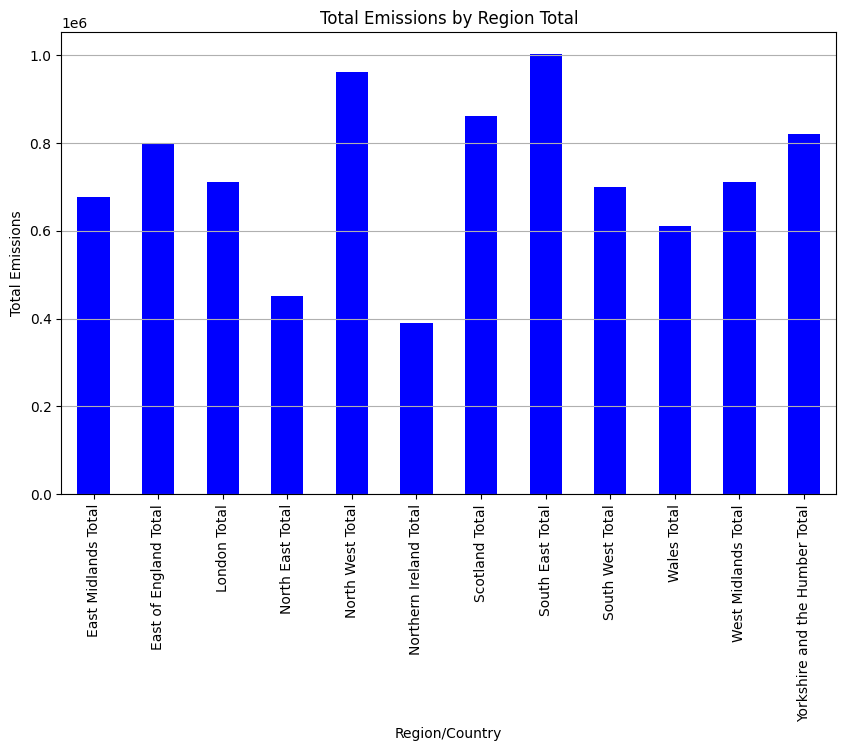

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
regional_emissions_total.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region Total')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [26]:
regional_emissions_total

Region/Country
East Midlands Total               6.759135e+05
East of England Total             7.986982e+05
London Total                      7.105470e+05
North East Total                  4.513099e+05
North West Total                  9.620017e+05
Northern Ireland Total            3.910081e+05
Scotland Total                    8.602071e+05
South East Total                  1.001996e+06
South West Total                  6.987242e+05
Wales Total                       6.104329e+05
West Midlands Total               7.107770e+05
Yorkshire and the Humber Total    8.208705e+05
Name: Grand Total, dtype: float64

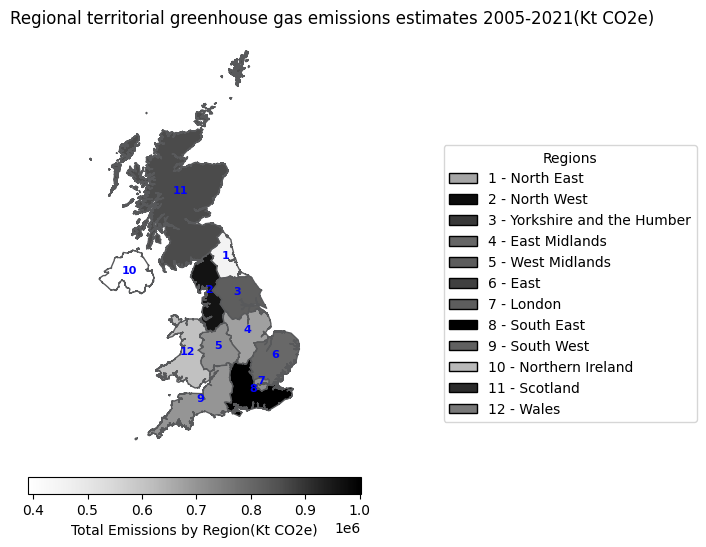

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'

uk_regions_gdf = gpd.read_file(file_path)

emissions_df = regional_emissions_total.reset_index()
emissions_df.columns = ['Region/Country', 'Grand Total']

#emissions_df['Region/Country'] = emissions_df['Region/Country'].replace({'East of England': 'East'})
replacements = {
    'East of England Total': 'East',
    'East Midlands Total': 'East Midlands',
    'London Total': 'London',
    'North East Total': 'North East',
    'North West Total': 'North West',
    'Northern Ireland Total': 'Northern Ireland',
    'Scotland Total': 'Scotland',
    'South East Total': 'South East',
    'South West Total': 'South West',
    'Wales Total': 'Wales',
    'West Midlands Total': 'West Midlands',
    'Yorkshire and the Humber Total': 'Yorkshire and the Humber'
}

emissions_df['Region/Country'] = emissions_df['Region/Country'].replace(replacements)



uk_regions_with_emissions = uk_regions_gdf.merge(emissions_df, left_on='rgn19nm', right_on='Region/Country', how='left')

uk_regions_with_emissions['Number'] = range(1, len(uk_regions_with_emissions) + 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
uk_regions_with_emissions.plot(column='Grand Total', ax=ax, cmap='Greys', edgecolor='#58595B')

cmap = plt.cm.Greys
norm = mcolors.Normalize(vmin=uk_regions_with_emissions['Grand Total'].min(), vmax=uk_regions_with_emissions['Grand Total'].max())

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Total Emissions by Region(Kt CO2e)')

for idx, row in uk_regions_with_emissions.iterrows():
    plt.annotate(text=str(row['Number']), xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight='bold', color='blue', fontsize=8)

legend_elements = [Patch(facecolor=plt.cm.Greys(emission / uk_regions_with_emissions['Grand Total'].max()), edgecolor='black',
                         label=f"{number} - {region}") for number, region, emission in zip(uk_regions_with_emissions['Number'],
                         uk_regions_with_emissions['rgn19nm'], uk_regions_with_emissions['Grand Total'])]

ax.legend(handles=legend_elements, title="Regions", bbox_to_anchor=(1.55, 0.75), loc='upper left')

ax.set_title('Regional territorial greenhouse gas emissions estimates 2005-2021(Kt CO2e)', loc='left', position=(-0.3, 1))
plt.axis('off')
plt.show()


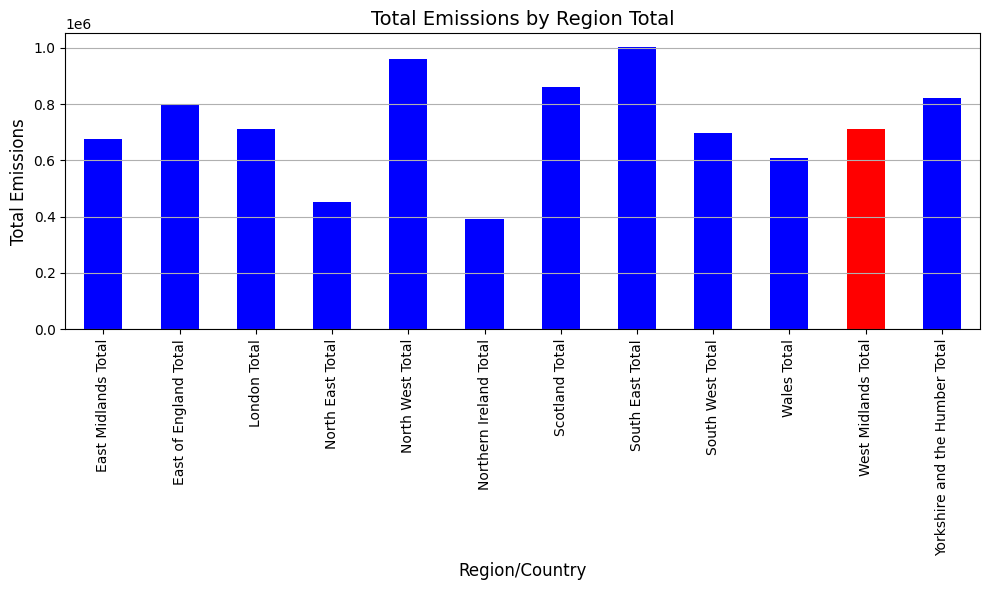

In [28]:
# Convert the dictionary to a pandas Series
emissions_series = pd.Series(regional_emissions_total)

colors = ['red' if region == 'West Midlands Total' else 'blue' for region in emissions_series.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
emissions_series.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region Total', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
# plt.savefig('emissions_by_region_total.png')

# Show the plot
plt.tight_layout()
plt.show()

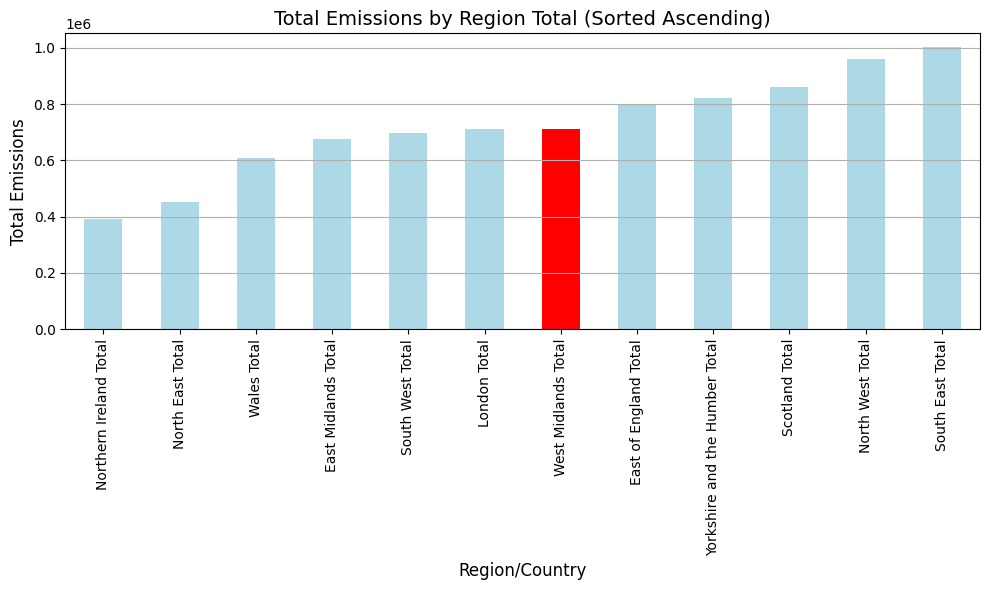

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the series in ascending order for the plot
sorted_emissions = regional_emissions_total.sort_values()

# Define the colors for the bars, 'red' for 'West Midlands Total', 'skyblue' for the rest
colors = ['red' if region == 'West Midlands Total' else 'lightblue' for region in sorted_emissions.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
sorted_emissions.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region Total (Sorted Ascending)', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<h1>WestMidlands</h1>

In [30]:
# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']
west_midlands_data

3    Region/Country Second Tier Authority       Local Authority  \
2040  West Midlands            Birmingham            Birmingham   
2041  West Midlands            Birmingham            Birmingham   
2042  West Midlands            Birmingham            Birmingham   
2043  West Midlands            Birmingham            Birmingham   
2044  West Midlands            Birmingham            Birmingham   
...             ...                   ...                   ...   
2596  West Midlands  Worcestershire Total  Worcestershire Total   
2597  West Midlands  Worcestershire Total  Worcestershire Total   
2598  West Midlands  Worcestershire Total  Worcestershire Total   
2599  West Midlands  Worcestershire Total  Worcestershire Total   
2600  West Midlands  Worcestershire Total  Worcestershire Total   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
2040            E08000025          2005           526.551509    366.037594   
2041            E08000025          2006            537.58464    325.085629   
2042            E08000025          2007           510.882763    311.246683   
2043            E08000025          2008           529.503396    305.588896   
2044            E08000025          2009           429.653608    281.346962   
...                   ...           ...                  ...           ...   
2596                  NaN          2017           152.467092    116.944652   
2597                  NaN          2018           172.838333    131.012733   
2598                  NaN          2019           146.809055    137.062654   
2599                  NaN          2020           121.875589    115.848439   
2600                  NaN          2021           141.541027    169.279094   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
2040                      61.953269       261.620286    1216.162658  ...   
2041                      82.275024       254.186129    1199.131422  ...   
2042                      94.635887        259.93259    1176.697923  ...   
2043                     133.077044       207.353832    1175.523168  ...   
2044                      44.531193       182.413125     937.944889  ...   
...                             ...              ...            ...  ...   
2596                      19.834311       217.425383     506.671438  ...   
2597                      21.624796       232.232283     557.708145  ...   
2598                      19.014284       197.144455     500.030448  ...   
2599                      15.014089       197.552499     450.290616  ...   
2600                      18.323263       205.906984     535.050368  ...   

3    Agriculture Soils Agriculture Total    Landfill Waste Management 'Other'  \
2040          2.318744         15.128539   11.122149                43.552592   
2041          2.519812         15.762343   10.324532                48.716274   
2042          2.361162         15.055982   36.275553                50.047079   
2043          2.487657         14.784999   30.037779                48.617361   
2044          2.289698         13.508004  159.413026                47.379221   
...                ...               ...         ...                      ...   
2596         68.894191        386.871084  216.880509                46.866939   
2597         69.275392        405.306105   194.41849                46.092127   
2598          72.29286        383.175445  194.909071                47.087417   
2599         60.056299        359.954182  193.621385                44.625131   
2600         68.156731        373.633695  201.635026                 46.49455   

3    Waste Management Total  Grand Total  \
2040              54.674741  7059.334372   
2041              59.040806  6952.112034   
2042              86.322633  6800.522322   
2043              78.655141  6744.677640   
2044             206.792247  6099.737055   
...                     ...          ...   
2596             263.747448  3987.637970   
2597             240

In [31]:
# Filter out rows where "Second Tier Authority" ends with "Total"
west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]
west_midlands_data_filtered


3    Region/Country Second Tier Authority Local Authority  \
2040  West Midlands            Birmingham      Birmingham   
2041  West Midlands            Birmingham      Birmingham   
2042  West Midlands            Birmingham      Birmingham   
2043  West Midlands            Birmingham      Birmingham   
2044  West Midlands            Birmingham      Birmingham   
...             ...                   ...             ...   
2579  West Midlands        Worcestershire     Wyre Forest   
2580  West Midlands        Worcestershire     Wyre Forest   
2581  West Midlands        Worcestershire     Wyre Forest   
2582  West Midlands        Worcestershire     Wyre Forest   
2583  West Midlands        Worcestershire     Wyre Forest   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
2040            E08000025          2005           526.551509    366.037594   
2041            E08000025          2006            537.58464    325.085629   
2042            E08000025          2007           510.882763    311.246683   
2043            E08000025          2008           529.503396    305.588896   
2044            E08000025          2009           429.653608    281.346962   
...                   ...           ...                  ...           ...   
2579            E07000239          2017            21.596821     10.207297   
2580            E07000239          2018            26.603644     13.005476   
2581            E07000239          2019            23.235559     17.494639   
2582            E07000239          2020            17.900403     11.514084   
2583            E07000239          2021            21.503682     14.971111   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
2040                      61.953269       261.620286    1216.162658  ...   
2041                      82.275024       254.186129    1199.131422  ...   
2042                      94.635887        259.93259    1176.697923  ...   
2043                     133.077044       207.353832    1175.523168  ...   
2044                      44.531193       182.413125     937.944889  ...   
...                             ...              ...            ...  ...   
2579                       1.131147        48.643531      81.578795  ...   
2580                       1.125587        59.088112       99.82282  ...   
2581                       1.147332        42.889724      84.767255  ...   
2582                       1.128091        44.760307      75.302885  ...   
2583                       1.077544         43.31466      80.866997  ...   

3    Agriculture Soils Agriculture Total    Landfill Waste Management 'Other'  \
2040          2.318744         15.128539   11.122149                43.552592   
2041          2.519812         15.762343   10.324532                48.716274   
2042          2.361162         15.055982   36.275553                50.047079   
2043          2.487657         14.784999   30.037779                48.617361   
2044          2.289698         13.508004  159.413026                47.379221   
...                ...               ...         ...                      ...   
2579          6.365818         33.125984   35.766842                 5.064742   
2580          6.132734         32.343872   32.129977                 5.063163   
2581          6.015508         31.772339   31.502365                 4.954569   
2582          5.358702         30.189129   31.393792                 4.728242   
2583          5.185539         30.605628   32.829161                  5.01005   

3    Waste Management Total  Grand Total  \
2040              54.674741  7059.334372   
2041              59.040806  6952.112034   
2042              86.322633  6800.522322   
2043              78.655141  6744.677640   
2044             206.792247  6099.737055   
...                     ...          ...   
2579              40.831584   499.390383   
2580               37.19314   489.710354   
2581              36.456934   458.909804   
2582

In [32]:
# Pivot table creation
pivot_table = pd.pivot_table(
    west_midlands_data_filtered,
    values=[
        'Commercial Total', 'Waste Management Total', 'Agriculture Total',
        'Transport Total', 'Domestic Total', 'Public Sector Total',
        'Industry Total', 'LULUCF Net Emissions','Emissions per km2 (kt CO2e)'
    ],
    index=['Calendar Year'],
    aggfunc=sum
)

# Transpose the pivot table to have categories as rows and years as columns
pivot_table_transposed = pivot_table.T

# Print the transposed pivot table
# print(pivot_table_transposed)
# pivot_table_transposed.to_csv('features_by_years.csv')

In [33]:
pivot_table

3              Agriculture Total  Commercial Total  Domestic Total  \
Calendar Year                                                        
2005                 4028.975542       5809.331253    13449.536094   
2006                 3977.611559       6076.632436    13583.317568   
2007                 3905.022430       5783.889127    13081.835599   
2008                 3896.858302       5577.457160    13033.414716   
2009                 3807.240767       4712.011264    11835.167963   
2010                 3840.081371       5001.267074    12685.403118   
2011                 3761.345066       4672.226863    11112.642004   
2012                 3809.765776       4997.596854    11868.951211   
2013                 3722.949528       4772.413248    11531.527193   
2014                 3809.989355       4075.739643     9798.620535   
2015                 3805.798780       3700.093353     9562.443689   
2016                 3692.000037       3288.671641     9036.525528   
2017                 3766.397313       2555.056076     8585.065579   
2018                 3806.417076       1707.805299     8419.354441   
2019                 3752.726686       1378.760231     8136.337663   
2020                 3573.008128       1094.025601     7960.604044   
2021                 3639.604571       1289.487328     8254.300582   

3              Emissions per km2 (kt CO2e)  Industry Total  \
Calendar Year                                                
2005                            289.942804    10110.465071   
2006                            288.863353    10197.714268   
2007                            286.449175    10138.235254   
2008                            274.077573     9265.801065   
2009                            252.942548     8063.486578   
2010                            265.708579     8605.356043   
2011                            244.269938     8053.840463   
2012                            250.674974     7934.255575   
2013                            245.219017     7930.368103   
2014                            226.299273     7683.166895   
2015                            221.343256     7258.445476   
2016                            211.633827     6871.729735   
2017                            205.073094     6795.989583   
2018                            199.917735     7338.841582   
2019                            189.296645     6823.598748   
2020                            169.355461     6329.377088   
2021                            181.918944     7025.526089   

3              LULUCF Net Emissions  Public Sector Total  Transport Total  \
Calendar Year                                                               
2005                    -317.593628          2157.052152     13501.323430   
2006                    -326.862871          2068.237300     13305.491246   
2007                    -364.168107          1940.546956     13427.290157   
2008                    -409.084036          1836.585244     12933.307202   
2009                    -410.381053          1569.812241     12494.989414   
2010                    -416.001919          1702.472983     12409.032802   
2011                    -437.639005          1543.437224     12275.012297   
2012                    -405.366106          1655.926145     12166.688081   
2013                    -444.516700          1632.970841     12070.626129   
2014                    -443.113774          1407.210297     12321.712167   
2015                    -467.135531          1343.820223     12586.051221   
2016                    -419.905408          1185.686926     12802.317734   
2017                    -447.164862          1247.662167     12775.515791   
2018                    -432.569368          1400.427797     12562.288533   
2019                    -457.906092          1289.674005     12222.766602   
2020                    -461.502795          1210.227228      9941.294068   
2021                    -458.060889          1333.317247     11009.606016   

3              Waste Manag

In [34]:
pivot_table_transposed

Calendar Year                        2005          2006          2007  \
3                                                                       
Agriculture Total             4028.975542   3977.611559   3905.022430   
Commercial Total              5809.331253   6076.632436   5783.889127   
Domestic Total               13449.536094  13583.317568  13081.835599   
Emissions per km2 (kt CO2e)    289.942804    288.863353    286.449175   
Industry Total               10110.465071  10197.714268  10138.235254   
LULUCF Net Emissions          -317.593628   -326.862871   -364.168107   
Public Sector Total           2157.052152   2068.237300   1940.546956   
Transport Total              13501.323430  13305.491246  13427.290157   
Waste Management Total         993.132504    982.898678   1704.174232   

Calendar Year                        2008          2009          2010  \
3                                                                       
Agriculture Total             3896.858302   3807.240767   3840.081371   
Commercial Total              5577.457160   4712.011264   5001.267074   
Domestic Total               13033.414716  11835.167963  12685.403118   
Emissions per km2 (kt CO2e)    274.077573    252.942548    265.708579   
Industry Total                9265.801065   8063.486578   8605.356043   
LULUCF Net Emissions          -409.084036   -410.381053   -416.001919   
Public Sector Total           1836.585244   1569.812241   1702.472983   
Transport Total              12933.307202  12494.989414  12409.032802   
Waste Management Total        1555.034766   2215.670625   2569.207488   

Calendar Year                        2011          2012          2013  \
3                                                                       
Agriculture Total             3761.345066   3809.765776   3722.949528   
Commercial Total              4672.226863   4997.596854   4772.413248   
Domestic Total               11112.642004  11868.951211  11531.527193   
Emissions per km2 (kt CO2e)    244.269938    250.674974    245.219017   
Industry Total                8053.840463   7934.255575   7930.368103   
LULUCF Net Emissions          -437.639005   -405.366106   -444.516700   
Public Sector Total           1543.437224   1655.926145   1632.970841   
Transport Total              12275.012297  12166.688081  12070.626129   
Waste Management Total        2099.168770   2004.062529   1965.555586   

Calendar Year                        2014          2015          2016  \
3                                                                       
Agriculture Total             3809.989355   3805.798780   3692.000037   
Commercial Total              4075.739643   3700.093353   3288.671641   
Domestic Total                9798.620535   9562.443689   9036.525528   
Emissions per km2 (kt CO2e)    226.299273    221.343256    211.633827   
Industry Total                7683.166895   7258.445476   6871.729735   
LULUCF Net Emissions          -443.113774   -467.135531   -419.905408   
Public Sector Total           1407.210297   1343.820223   1185.686926   
Transport Total              12321.712167  12586.051221  12802.317734   
Waste Management Total        1760.419340   1781.099069   1976.630326   

Calendar Year                        2017          2018          2019  \
3                                                                       
Agriculture Total             3766.397313   3806.417076   3752.726686   
Commercial Total              2555.056076   1707.805299   1378.760231   
Domestic Total                8585.065579   8419.354441   8136.337663   
Emissions per km2 (kt CO2e)    205.073094    199.917735    189.296645   
Industry Total                6795.989583   7338.841582   6823.598748   
LULUCF Net Emissions          -447.164862   -432.569368   -457.906092   
Public Sector Total           1247.662167   1400.427797   1289.674005   
Transport Total              12775.515791  12562.288533  12222.766602   
Waste Management Total        2203.734087   2002.43854

In [35]:
pivot_table_transposed.corr()

Calendar Year      2005      2006      2007      2008      2009      2010  \
Calendar Year                                                               
2005           1.000000  0.999707  0.998732  0.998613  0.991479  0.991547   
2006           0.999707  1.000000  0.998403  0.998334  0.989789  0.990788   
2007           0.998732  0.998403  1.000000  0.998963  0.994393  0.994761   
2008           0.998613  0.998334  0.998963  1.000000  0.996148  0.996680   
2009           0.991479  0.989789  0.994393  0.996148  1.000000  0.998480   
2010           0.991547  0.990788  0.994761  0.996680  0.998480  1.000000   
2011           0.991912  0.990035  0.995211  0.995657  0.999338  0.996746   
2012           0.993618  0.992557  0.995505  0.997844  0.999391  0.998603   
2013           0.993859  0.992489  0.996049  0.997708  0.999718  0.998446   
2014           0.983923  0.980433  0.987501  0.986340  0.993185  0.986271   
2015           0.975687  0.971191  0.979535  0.978960  0.989331  0.980466   
2016           0.961511  0.955886  0.966698  0.965865  0.980747  0.969608   
2017           0.946135  0.939172  0.952439  0.950809  0.969569  0.957166   
2018           0.939583  0.931815  0.945399  0.941955  0.959834  0.947864   
2019           0.932480  0.924216  0.938189  0.935568  0.955375  0.942720   
2020           0.947603  0.940674  0.951952  0.950719  0.966119  0.958749   
2021           0.948853  0.941725  0.953161  0.950351  0.964785  0.955883   

Calendar Year      2011      2012      2013      2014      2015      2016  \
Calendar Year                                                               
2005           0.991912  0.993618  0.993859  0.983923  0.975687  0.961511   
2006           0.990035  0.992557  0.992489  0.980433  0.971191  0.955886   
2007           0.995211  0.995505  0.996049  0.987501  0.979535  0.966698   
2008           0.995657  0.997844  0.997708  0.986340  0.978960  0.965865   
2009           0.999338  0.999391  0.999718  0.993185  0.989331  0.980747   
2010           0.996746  0.998603  0.998446  0.986271  0.980466  0.969608   
2011           1.000000  0.998421  0.999245  0.996167  0.992308  0.984251   
2012           0.998421  1.000000  0.999808  0.990443  0.985482  0.975169   
2013           0.999245  0.999808  1.000000  0.992578  0.987924  0.978229   
2014           0.996167  0.990443  0.992578  1.000000  0.998836  0.994492   
2015           0.992308  0.985482  0.987924  0.998836  1.000000  0.998237   
2016           0.984251  0.975169  0.978229  0.994492  0.998237  1.000000   
2017           0.973556  0.961938  0.965972  0.987349  0.993195  0.997802   
2018           0.964359  0.950899  0.956038  0.980165  0.985935  0.990656   
2019           0.959465  0.945959  0.951104  0.976078  0.983098  0.988950   
2020           0.967777  0.958274  0.962484  0.977006  0.980691  0.981532   
2021           0.967906  0.956731  0.961484  0.979746  0.983483  0.984991   

Calendar Year      2017      2018      2019      2020      2021  
Calendar Year                                                    
2005           0.946135  0.939583  0.932480  0.947603  0.948853  
2006           0.939172  0.931815  0.924216  0.940674  0.941725  
2007           0.952439  0.945399  0.938189  0.951952  0.953161  
2008           0.950809  0.941955  0.935568  0.950719  0.950351  
2009           0.969569  0.959834  0.955375  0.966119  0.964785  
2010           0.957166  0.947864  0.942720  0.958749  0.955883  
2011           0.973556  0.964359  0.959465  0.967777  0.967906  
2012           0.961938  0.950899  0.945959  0.958274  0.956731  
2013           0.965972  0.956038  0.951104  0.962484  0.961484  
2014           0.987349  0.980165  0.976078  0.977006  0.979746  
2015           0.993195  0.985935  0.983098  0.980691  0.983483  
2016           0.997802  0.990656  0.988950  0.981532  0.984991  
2017           1.000000  0.996425  0.995866  0.986805  0.990171  
2018           0.996425  1.000000  0.999545  0.993473  0.997028  
2019           0

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [36]:
pivot_table.corr()

3                            Agriculture Total  Commercial Total  \
3                                                                  
Agriculture Total                     1.000000          0.775494   
Commercial Total                      0.775494          1.000000   
Domestic Total                        0.793451          0.959494   
Emissions per km2 (kt CO2e)           0.860274          0.974504   
Industry Total                        0.880980          0.866052   
LULUCF Net Emissions                  0.833005          0.729578   
Public Sector Total                   0.861581          0.847188   
Transport Total                       0.852000          0.680485   
Waste Management Total               -0.477497         -0.267074   

3                            Domestic Total  Emissions per km2 (kt CO2e)  \
3                                                                          
Agriculture Total                  0.793451                     0.860274   
Commercial Total                   0.959494                     0.974504   
Domestic Total                     1.000000                     0.983375   
Emissions per km2 (kt CO2e)        0.983375                     1.000000   
Industry Total                     0.928145                     0.942496   
LULUCF Net Emissions               0.796254                     0.818817   
Public Sector Total                0.934487                     0.925586   
Transport Total                    0.608518                     0.732963   
Waste Management Total            -0.313520                    -0.321745   

3                            Industry Total  LULUCF Net Emissions  \
3                                                                   
Agriculture Total                  0.880980              0.833005   
Commercial Total                   0.866052              0.729578   
Domestic Total                     0.928145              0.796254   
Emissions per km2 (kt CO2e)        0.942496              0.818817   
Industry Total                     1.000000              0.889868   
LULUCF Net Emissions               0.889868              1.000000   
Public Sector Total                0.975990              0.887573   
Transport Total                    0.684668              0.665688   
Waste Management Total            -0.527468             -0.608115   

3                            Public Sector Total  Transport Total  \
3                                                                   
Agriculture Total                       0.861581         0.852000   
Commercial Total                        0.847188         0.680485   
Domestic Total                          0.934487         0.608518   
Emissions per km2 (kt CO2e)             0.925586         0.732963   
Industry Total                          0.975990         0.684668   
LULUCF Net Emissions                    0.887573         0.665688   
Public Sector Total                     1.000000         0.604193   
Transport Total                         0.604193         1.000000   
Waste Management Total                 -0.542619        -0.237519   

3                            Waste Management Total  
3                                                    
Agriculture Total                         -0.477497  
Commercial Total                          -0.267074  
Domestic Total                            -0.313520  
Emissions per km2 (kt CO2e)               -0.321745  
Industry Total                            -0.527468  
LULUCF Net Emissions                      -0.608115  
Public Sector Total                       -0.542619  
Transport Total                           -0.237519  
Waste Management Total                     1.000000

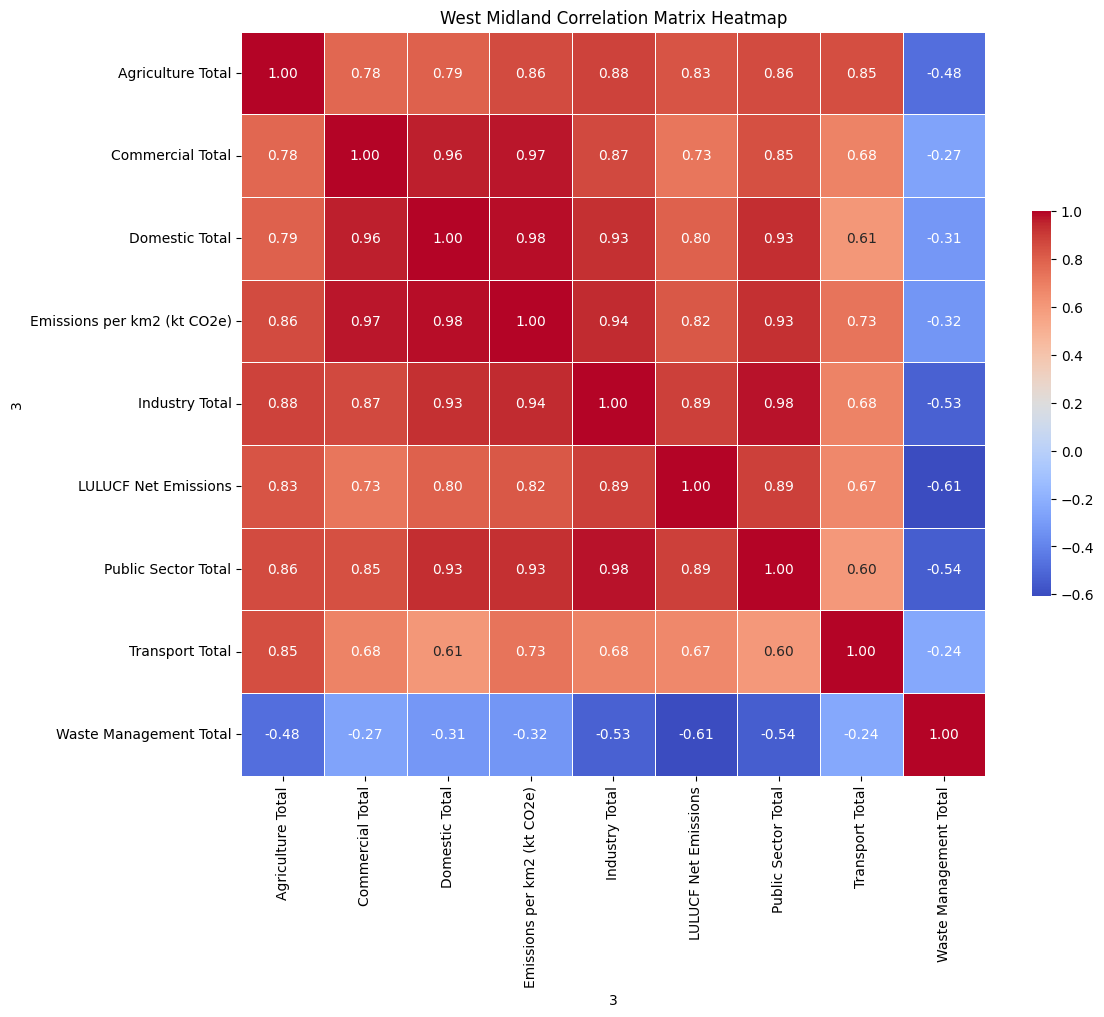

In [37]:
# Generate the correlation matrix
corr = pivot_table.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('West Midland Correlation Matrix Heatmap')

# Show the plot
plt.show()

Values close to 1 indicate a strong positive correlation, meaning that as one feature increases, the other tends to increase as well.

Values close to -1 indicate a strong negative correlation, meaning that as one feature increases, the other tends to decrease.

Values close to 0 indicate little to no linear relationship between the features.

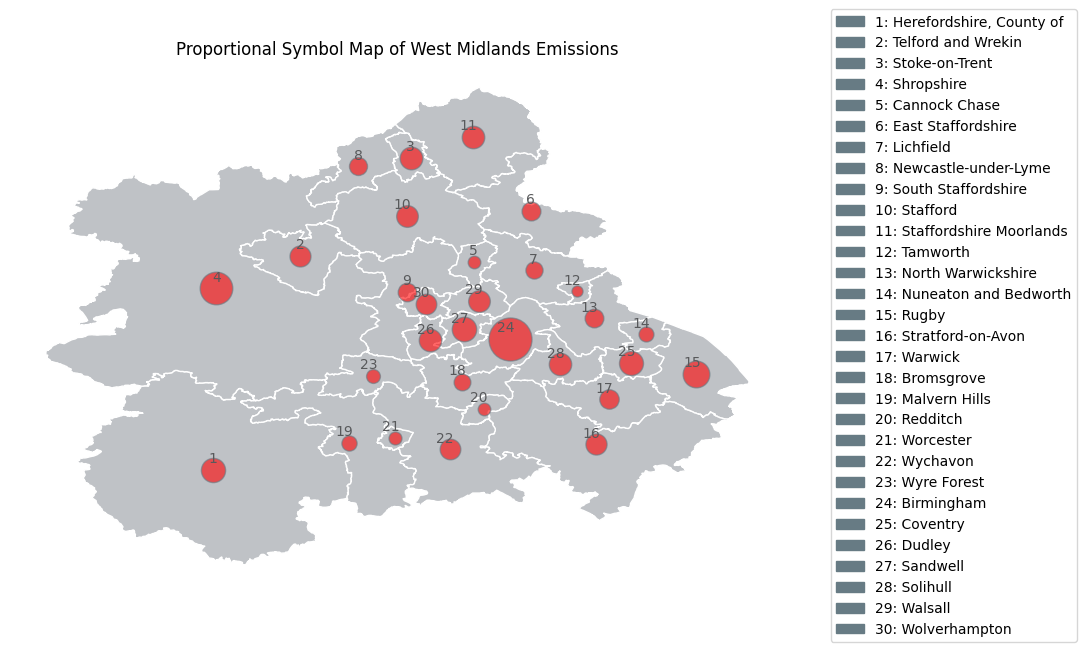

In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        96194.42, 14592.43, 8323.91, 29913.27, 26291.81,
        18530.12, 30369.14, 15314.26, 12044.33,
        16825.96, 18244.97, 11604.42, 8275.61,
        37092.39, 31099.31, 55209.7, 26119.39, 17940.00,
        24410.05, 26321.27, 26681.51, 23179.05,
        6411.41, 22889.89, 24428.08, 19614.43, 22070.84,
        8733.09, 22128.51, 9923.38
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 100, edgecolor='#677B84', color='red', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


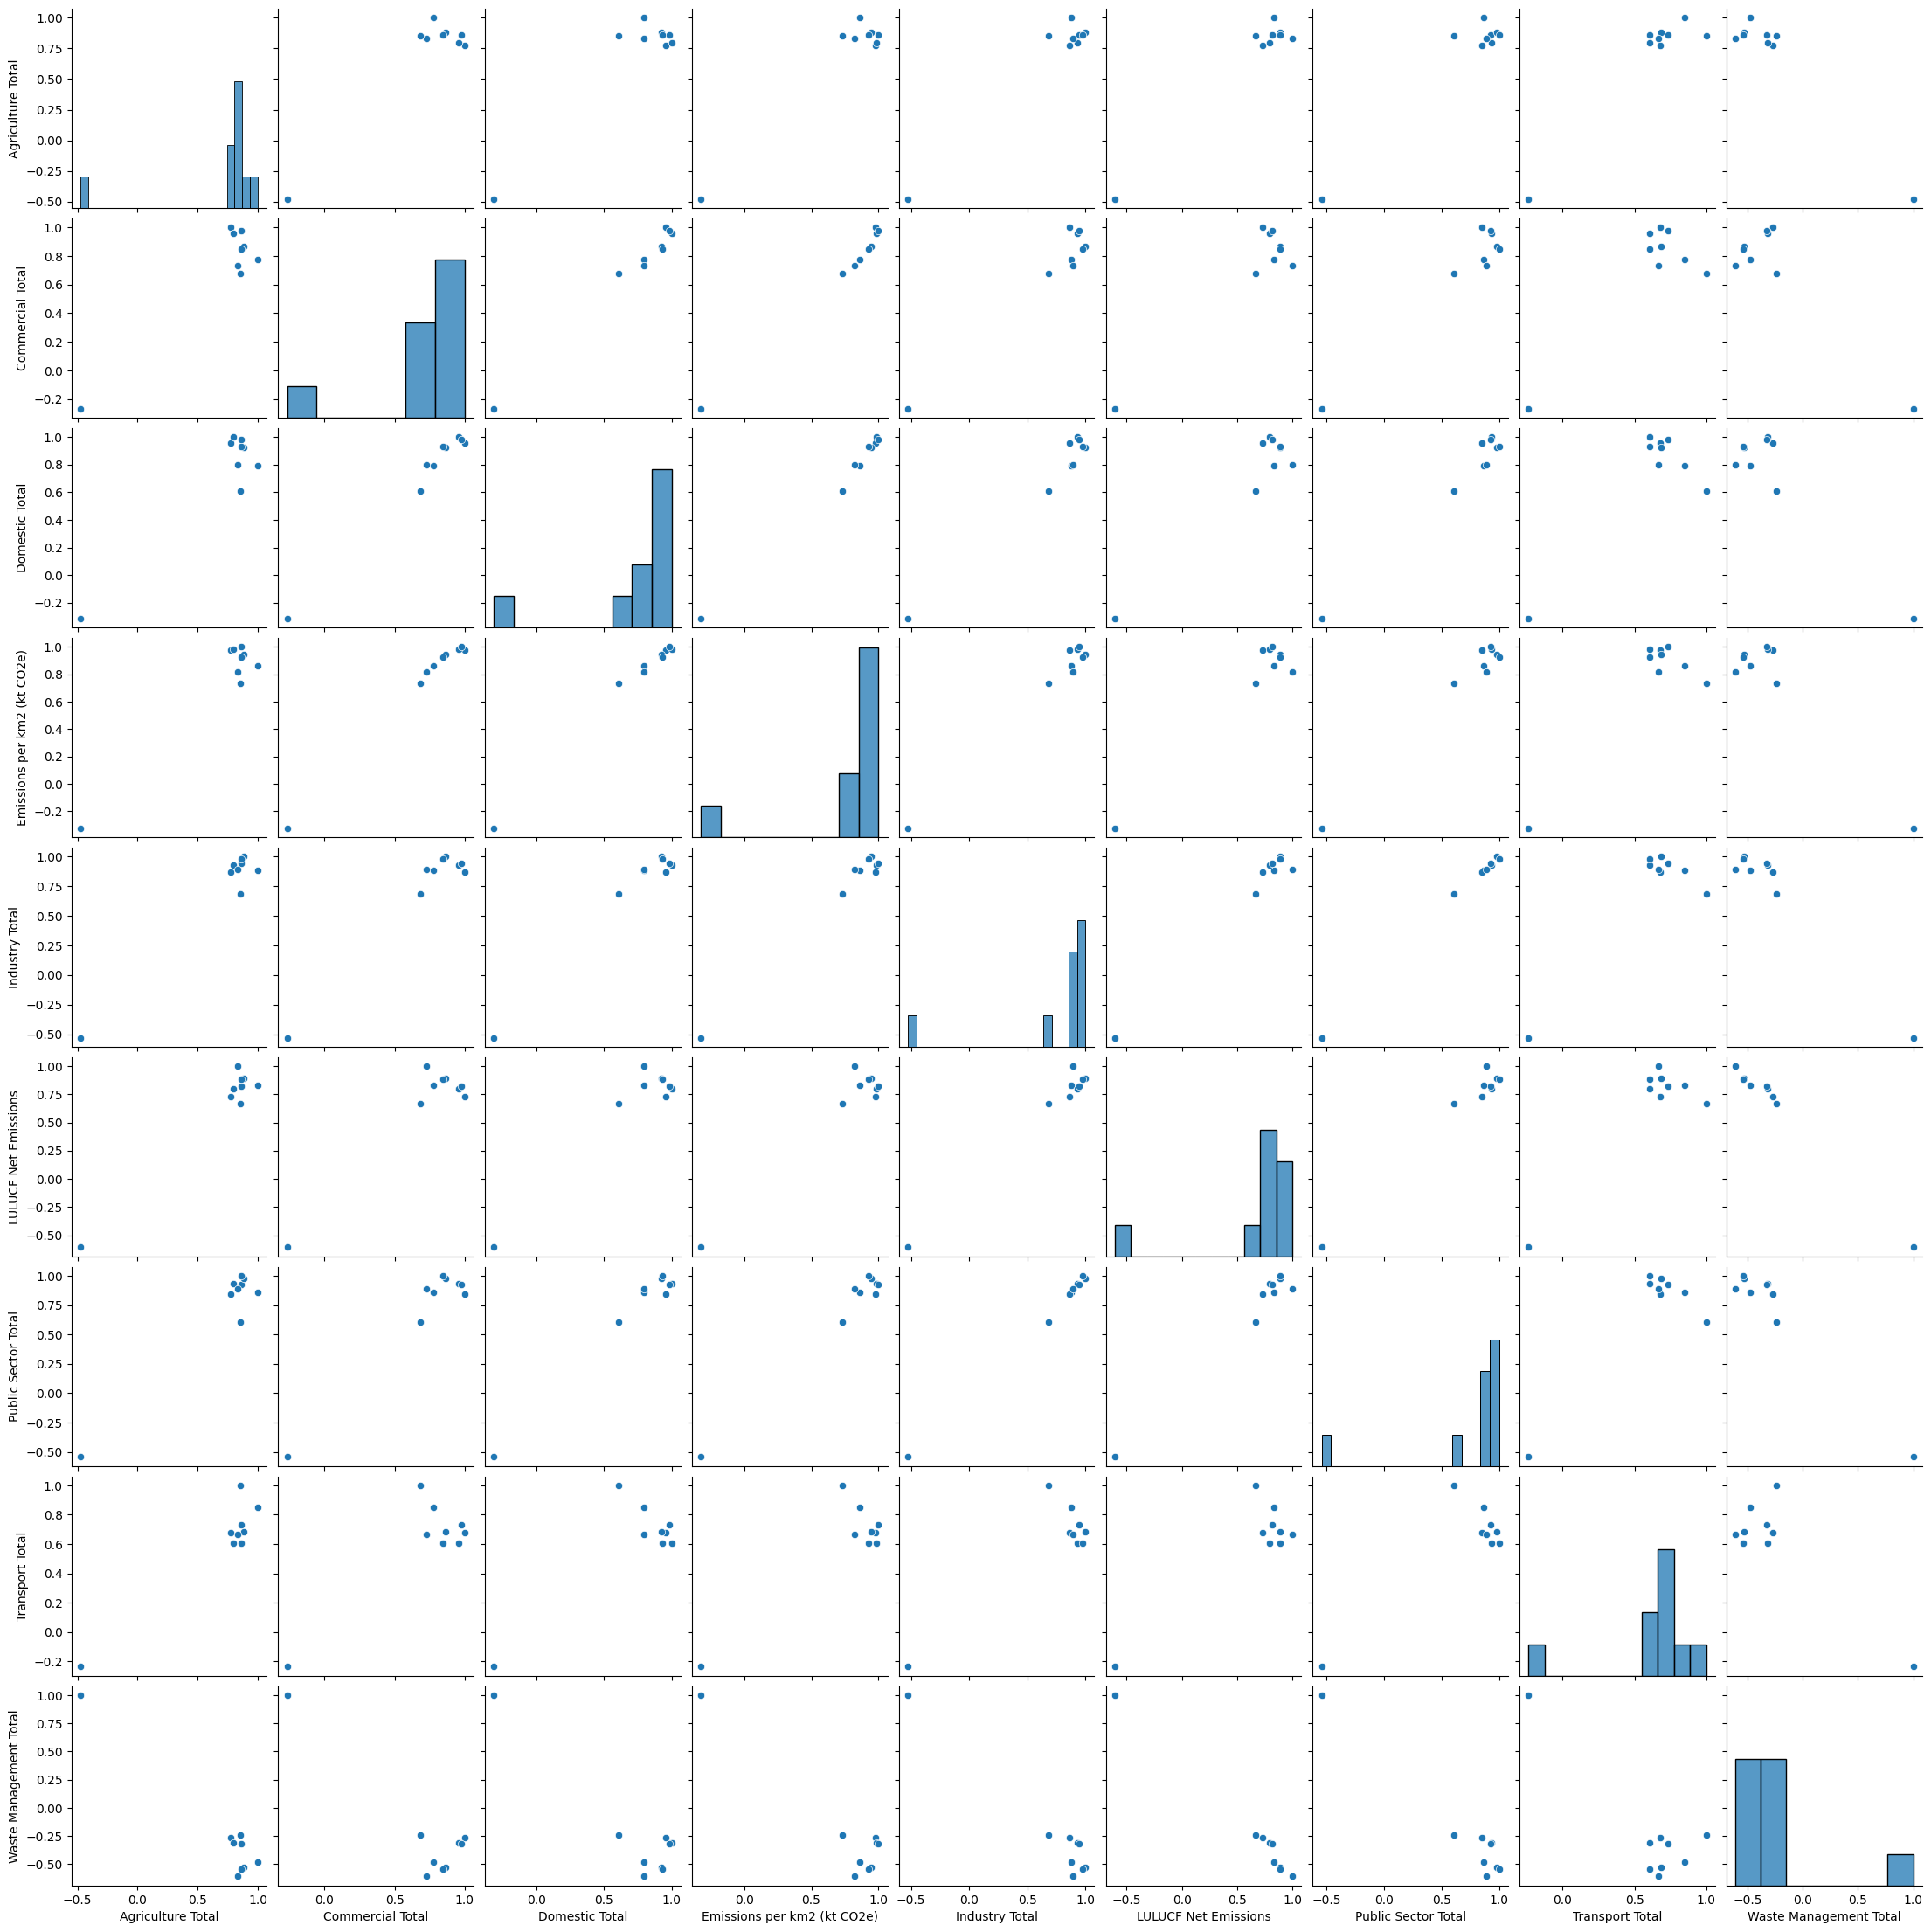

In [39]:
sns_plot = sns.pairplot(corr)
# Save the figure
sns_plot.savefig('pair_plot_features.png')

In [40]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']
# Add columns that end with "Total"
columns_to_keep.extend([col for col in west_midlands_data_filtered.columns if col.endswith("Total")])



In [41]:
west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

west_midlands_filtered_columns.to_csv('west_midlands_filtered_columns.csv')
west_midlands_filtered_columns

3    Region/Country Second Tier Authority Local Authority  \
2040  West Midlands            Birmingham      Birmingham   
2041  West Midlands            Birmingham      Birmingham   
2042  West Midlands            Birmingham      Birmingham   
2043  West Midlands            Birmingham      Birmingham   
2044  West Midlands            Birmingham      Birmingham   
...             ...                   ...             ...   
2579  West Midlands        Worcestershire     Wyre Forest   
2580  West Midlands        Worcestershire     Wyre Forest   
2581  West Midlands        Worcestershire     Wyre Forest   
2582  West Midlands        Worcestershire     Wyre Forest   
2583  West Midlands        Worcestershire     Wyre Forest   

3    Local Authority Code Calendar Year LULUCF Net Emissions Industry Total  \
2040            E08000025          2005            13.873543    1216.162658   
2041            E08000025          2006            13.855886    1199.131422   
2042            E08000025          2007            13.477209    1176.697923   
2043            E08000025          2008            12.998567    1175.523168   
2044            E08000025          2009            12.151837     937.944889   
...                   ...           ...                  ...            ...   
2579            E07000239          2017            -22.99366      81.578795   
2580            E07000239          2018           -22.677647       99.82282   
2581            E07000239          2019           -22.823968      84.767255   
2582            E07000239          2020           -23.150931      75.302885   
2583            E07000239          2021           -22.956472      80.866997   

3    Commercial Total Public Sector Total Domestic Total Transport Total  \
2040      1170.441473           558.70517    2359.376951     1670.971299   
2041      1168.499559          519.502282    2365.574895     1610.744841   
2042      1111.410745           492.80575     2283.42429      1621.32779   
2043      1143.259246          489.438236    2284.490311     1545.527971   
2044       945.363805          423.187511    2062.886425     1497.902337   
...               ...                 ...            ...             ...   
2579        39.204973            18.44841      154.11273      155.081565   
2580        23.783474           18.025695      149.76546      151.453539   
2581        22.492546           15.106118     144.241608      146.896973   
2582        16.067331           14.061786     141.095909      118.871468   
2583        17.888049            14.58203     144.139487      133.576301   

3    Agriculture Total Waste Management Total  Grand Total  
2040         15.128539              54.674741  7059.334372  
2041         15.762343              59.040806  6952.112034  
2042         15.055982              86.322633  6800.522322  
2043         14.784999              78.655141  6744.677640  
2044         13.508004             206.792247  6099.737055  
...                ...                    ...          ...  
2579         33.125984              40.831584   499.390383  
2580         32.343872               37.19314   489.710354  
2581         31.772339              36.456934   458.909804  
2582         30.189129              36.122034   408.559610  
2583         30.605628              37.839211   436.541231  

[510 rows x 14 columns]

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [42]:
# Create the pivot table of west_midlands local authorities emission
west_midlands_local_authority_emissions = pd.pivot_table(west_midlands_filtered_columns, values='Grand Total', index=['Local Authority'], columns=['Calendar Year'])

west_midlands_local_authority_emissions

Calendar Year                    2005         2006         2007         2008  \
Local Authority                                                                
Birmingham                7059.334372  6952.112034  6800.522322  6744.677640   
Bromsgrove                 956.642291   966.027098  1014.325992   966.508457   
Cannock Chase              588.979929   597.874966   584.212829   554.965633   
Coventry                  2285.257172  2244.459643  2109.501041  2028.053404   
Dudley                    1983.590348  1972.154700  1888.505634  1818.345968   
East Staffordshire        1287.270750  1298.775799  1260.546128  1245.328814   
Herefordshire, County of  2091.684474  2090.207781  2038.853224  1975.986634   
Lichfield                 1004.513597  1022.789515  1013.242837   993.374843   
Malvern Hills              772.773159   799.621230   848.442583   797.397569   
Newcastle-under-Lyme      1121.822896  1113.654899  1107.267011  1087.895669   
North Warwickshire        1147.478903  1203.041332  1226.193958  1194.492043   
Nuneaton and Bedworth      813.097075   815.719471   861.239859   828.813779   
Redditch                   585.906245   591.548822   632.697674   593.920918   
Rugby                     2330.213067  2373.288078  2651.893434  2411.372020   
Sandwell                  2289.664199  2311.288395  2271.410144  2149.609456   
Shropshire                3788.039158  3772.811560  3701.754274  3605.369762   
Solihull                  1735.803608  1801.630633  1757.701820  1667.849693   
South Staffordshire       1142.941882  1174.670664  1167.283617  1104.231784   
Stafford                  1593.609395  1616.541260  1569.472252  1566.564484   
Staffordshire Moorlands   1776.923545  1766.082186  1742.557987  1656.608649   
Stoke-on-Trent            2041.728131  2025.362057  1977.856972  1900.940420   
Stratford-on-Avon         1501.480094  1513.735452  1541.393414  1488.757386   
Tamworth                   475.068557   474.697517   448.760723   436.457918   
Telford and Wrekin        1659.122170  1685.979582  1682.256128  1530.383297   
Walsall                   1841.638129  1829.666727  1772.033335  1673.938533   
Warwick                   1391.720595  1400.843990  1409.130871  1362.768363   
Wolverhampton             1677.179103  1629.700831  1587.437458  1536.582527   
Worcester                  643.542399   616.473972   657.726991   608.166828   
Wychavon                  1447.518551  1504.532587  1542.140801  1467.778761   
Wyre Forest                697.678624   699.747403   750.464334   692.233167   

Calendar Year                    2009         2010         2011         2012  \
Local Authority                                                                
Birmingham                6099.737055  6412.804284  5805.907414  6094.847957   
Bromsgrove                 915.239428   943.043254   865.875640   885.439318   
Cannock Chase              534.431424   565.871617   516.643905   523.651492   
Coventry                  1835.162506  1962.611578  1766.002096  1881.254900   
Dudley                    1657.763334  1778.665829  1603.028674  1645.915361   
East Staffordshire        1170.588639  1228.732489  1160.773439  1165.877455   
Herefordshire, County of  1872.500149  1994.484316  1849.438619  1892.331768   
Lichfield                  955.231477   981.016859   931.692962   938.137617   
Malvern Hills              757.938462   782.645008   723.285139   726.094378   
Newcastle-under-Lyme      1042.573930  1083.119199  1024.749999  1024.635624   
North Warwickshire        1121.940224  1191.290419  1085.180037  1110.955808   
Nuneaton and Bedworth      772.443801   765.017013   677.858160   704.027486   
Redditch                   533.689582   577.553981   522.724477   528.282173   
Rugby                     2278.320929  2283.729045  2334.076177  2124.141199   
Sandwell                  1915.683984  2035.995284  1862.670040  1942.089900   
Shropshire                3330.136985  3537.762726  3277.426402  3379.256702   

In [43]:
import pandas as pd

# Calculate the yearly total emissions for each year
yearly_totals = west_midlands_local_authority_emissions.sum()

# Append the totals as a new row to the DataFrame
west_midlands_local_authority_emissions.loc['Total'] = yearly_totals

west_midlands_local_authority_emissions

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [44]:
#sns.pairplot(west_midlands_local_authority_emissions)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
data_transposed = west_midlands_local_authority_emissions

data_transposed

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [46]:
X = data_transposed.loc[:, 2005:2020]
y = data_transposed[2021]

In [47]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)


In [48]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

# Predicting
y_pred = regressor.predict(X_test)

# Printing shapes of predictions and test labels
print(y_pred.shape, y_test.shape)

Intercept: 6.358880146775391
Coefficients: [-0.46276701  0.67328558  0.02979568 -0.1036658   0.22833449 -0.08693259
  0.27250066 -0.04820699 -0.75399125  0.09281595 -0.12834322  0.4178228
  0.71459305 -0.42653192 -0.53009634  1.15639934]
(7,) (7,)


In [49]:
X

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [50]:
y

Local Authority
Birmingham                   4480.654084
Bromsgrove                    711.760256
Cannock Chase                 364.042820
Coventry                     1344.000349
Dudley                       1163.033149
East Staffordshire            853.521292
Herefordshire, County of     1472.865799
Lichfield                     754.890754
Malvern Hills                 601.444378
Newcastle-under-Lyme          844.190037
North Warwickshire            919.630410
Nuneaton and Bedworth         540.854821
Redditch                      357.787785
Rugby                        2026.454350
Sandwell                     1401.088684
Shropshire                   2773.370585
Solihull                     1226.181599
South Staffordshire           954.939263
Stafford                     1166.734395
Staffordshire Moorlands      1332.991944
Stoke-on-Trent               1127.356084
Stratford-on-Avon            1120.139928
Tamworth                      268.838288
Telford and Wrekin           1002.876199


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

west_midlands_local_authority_emissions

X = west_midlands_local_authority_emissions.loc[:, 2005:2020]
y = west_midlands_local_authority_emissions[2021]

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

#predicting the test set result
y_pred = regressor.predict(X_test)
print(y_pred.shape,y_test.shape)
y_pred,y_test

Intercept: 6.358880146775391
Coefficients: [-0.46276701  0.67328558  0.02979568 -0.1036658   0.22833449 -0.08693259
  0.27250066 -0.04820699 -0.75399125  0.09281595 -0.12834322  0.4178228
  0.71459305 -0.42653192 -0.53009634  1.15639934]
(7,) (7,)


(array([1232.85624046,  738.78645797,  880.00216811,  393.21771001,
        1375.03203259, 1101.11372555, 2054.79029596]),
 Local Authority
 Stoke-on-Trent        1127.356084
 Lichfield              754.890754
 East Staffordshire     853.521292
 Cannock Chase          364.042820
 Coventry              1344.000349
 Stratford-on-Avon     1120.139928
 Rugby                 2026.454350
 Name: 2021, dtype: float64)

Based on the output from the linear regression model, an approximate prediction equation for the emissions in 2021 is formed. The equation is structured as follows, where  Xi
  represents the emissions in year  2005+i
  (for  i=0,1,2,…,15
 ):

Emissions2021=Intercept+c1⋅X0+c2⋅X1+⋯+c16⋅X15

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)

# Calculating the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 36.52200721575982
Mean Squared Error: 2152.847138464159
R-squared Score: 0.9908041610887399
Root Mean Squared Error: 46.39878380371795


In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error

n = len(y_train)  # number of observations
k = regressor.coef_.shape[0] + 1  # number of parameters (including the intercept)
mse = mean_squared_error(y_test, y_pred)
residuals = y_test - y_pred
sse = np.sum(residuals**2)

# Log-likelihood
sigma_squared = mse
log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(sigma_squared) - (1 / (2 * sigma_squared)) * sse

# AIC and BIC
aic = 2 * k - 2 * log_likelihood
bic = np.log(n) * k - 2 * log_likelihood

print(f"Log-likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

Log-likelihood: -117.6490827431983
AIC: 269.2981654863966
BIC: 289.3250806023117


In [54]:
from joblib import dump, load

# Save the model to a file
dump(regressor, 'regression_model.joblib')

['regression_model.joblib']

In [55]:
# Load the model from the file
model = load('regression_model.joblib')

#using model to make predictions
predictions = model.predict(X_test)
predictions

array([1232.85624046,  738.78645797,  880.00216811,  393.21771001,
       1375.03203259, 1101.11372555, 2054.79029596])

<h1>Regularization</h1>

In [56]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

# Evaluate the model
print("Ridge Intercept:", ridge_regressor.intercept_)
print("Ridge Coefficients:", ridge_regressor.coef_)

Ridge Intercept: 6.3307664699927955
Ridge Coefficients: [-0.46163039  0.67037142  0.03020056 -0.1029915   0.227319   -0.08501577
  0.27113205 -0.04987767 -0.7495865   0.0921018  -0.12857463  0.41587872
  0.71317622 -0.42469931 -0.52754111  1.1546043 ]


In [57]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength
ridge_regressor = Ridge(alpha=100.0)
ridge_regressor.fit(X_train, y_train)

# Evaluate the model
print("Ridge Intercept:", ridge_regressor.intercept_)
print("Ridge Coefficients:", ridge_regressor.coef_)

Ridge Intercept: 4.481125697583138
Ridge Coefficients: [-0.38037044  0.47012366  0.05645802 -0.05364498  0.15741921  0.03862311
  0.17829713 -0.15852069 -0.45722296  0.04778057 -0.14460857  0.28552221
  0.62054214 -0.29976001 -0.35579393  1.03004119]


In [58]:
from sklearn.linear_model import Lasso

# alpha is the regularization strength
# LASSO - least Absolute shrinkage and selection operator
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)

# Evaluate the model
print("Lasso Intercept:", lasso_regressor.intercept_)
print("Lasso Coefficients:", lasso_regressor.coef_)

Lasso Intercept: -1.4061609092946128
Lasso Coefficients: [ 0.45178845  0.02498617  0.02119755 -0.01147759  0.05330843 -0.01046445
  0.03259591 -0.03411763  0.01705936  0.09285746  0.00864468  0.04476419
 -0.01143675  0.05593699  0.01605408 -0.03222047]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+05, tolerance: 1.036e+05
  model = cd_fast.enet_coordinate_descent(


In [59]:
from sklearn.linear_model import ElasticNet

# alpha is the regularization strength and l1_ratio controls the ratio of L1 to L2 penalty
elasticnet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_regressor.fit(X_train, y_train)

# Evaluate the model
print("ElasticNet Intercept:", elasticnet_regressor.intercept_)
print("ElasticNet Coefficients:", elasticnet_regressor.coef_)

ElasticNet Intercept: -1.4061474442137296
ElasticNet Coefficients: [ 0.45178939  0.02498646  0.02119755 -0.01147869  0.0533097  -0.01046568
  0.03259726 -0.03411897  0.01706075  0.0928575   0.00864475  0.04476423
 -0.01143857  0.05593888  0.01605418 -0.03222293]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+05, tolerance: 1.036e+05
  model = cd_fast.enet_coordinate_descent(


In [60]:
from sklearn.linear_model import RidgeCV

# Define a set of alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0]

# Create the RidgeCV regressor
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Retrieve the best alpha and coefficients
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)
print("RidgeCV Intercept:", ridge_cv.intercept_)
print("RidgeCV Coefficients:", ridge_cv.coef_)

#Inspecting the mean squared errors for each alpha
cv_mse = np.mean(ridge_cv.cv_values_, axis=0)
print("Mean Squared Errors for each alpha:", cv_mse)

Best Alpha: 0.1
RidgeCV Intercept: 6.485720935332665
RidgeCV Coefficients: [-0.46265593  0.67299     0.02983337 -0.10360101  0.22822987 -0.0867428
  0.27236064 -0.04837748 -0.75355143  0.09274174 -0.12836883  0.41762525
  0.71444846 -0.42635013 -0.52984182  1.15621724]
Mean Squared Errors for each alpha: [23895.77934164 23904.96437214 23987.0162261  24016.52621662]


In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_test_pred = ridge_cv.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R-squared Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared Score: 0.9907998002711973
Mean Squared Error: 2153.8680538649833
Root Mean Squared Error: 46.409784031656336


In [62]:
# Define a set of alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0]

# Create the RidgeCV regressor
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_absolute_error', store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Retrieve the best alpha and coefficients
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)

Best Alpha: 100.0


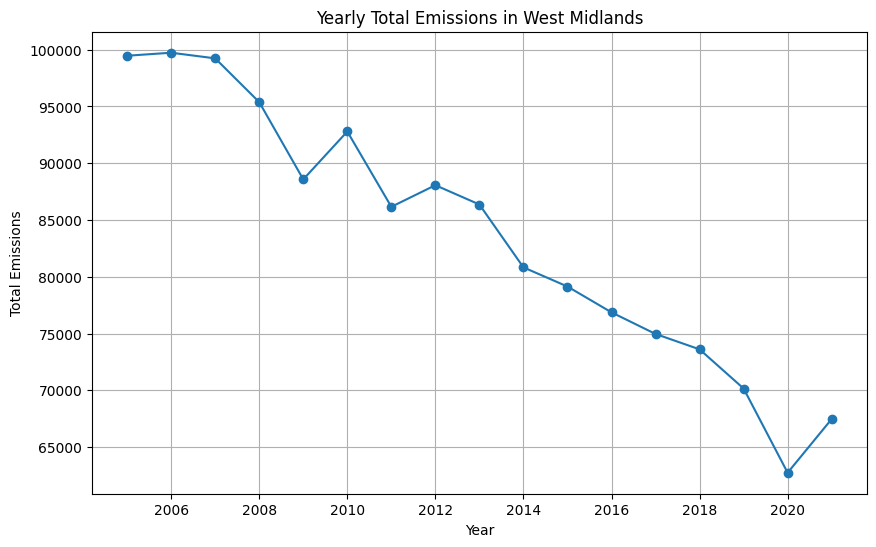

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

yearly_totals = west_midlands_local_authority_emissions.sum()

plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='line', marker='o')

plt.title('Yearly Total Emissions in West Midlands')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)

plt.show()

<h1>London</h1>

In [64]:
# Filter the data for the "london" Region/Country
London_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'London']
London_data

3    Region/Country Second Tier Authority       Local Authority  \
3502         London  Barking and Dagenham  Barking and Dagenham   
3503         London  Barking and Dagenham  Barking and Dagenham   
3504         London  Barking and Dagenham  Barking and Dagenham   
3505         London  Barking and Dagenham  Barking and Dagenham   
3506         London  Barking and Dagenham  Barking and Dagenham   
...             ...                   ...                   ...   
4058         London           Westminster           Westminster   
4059         London           Westminster           Westminster   
4060         London           Westminster           Westminster   
4061         London           Westminster           Westminster   
4062         London           Westminster           Westminster   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
3502            E09000002          2005           131.684063     17.459426   
3503            E09000002          2006           139.895257      13.63688   
3504            E09000002          2007           140.487938     12.727459   
3505            E09000002          2008           135.419965     12.319912   
3506            E09000002          2009           115.972501      12.15477   
...                   ...           ...                  ...           ...   
4058            E09000033          2017            47.698762     23.283152   
4059            E09000033          2018           131.422791      59.29191   
4060            E09000033          2019           106.191379     57.354249   
4061            E09000033          2020            69.206872     52.611429   
4062            E09000033          2021            94.854934     69.663544   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
3502                      66.870493        28.426324     244.440306  ...   
3503                      66.154453        28.690501     248.377092  ...   
3504                      69.810178        30.324736     253.350311  ...   
3505                      68.498117         25.60148     241.839473  ...   
3506                      59.188809         21.28696     208.603041  ...   
...                             ...              ...            ...  ...   
4058                       0.085511        95.767013     166.834438  ...   
4059                       1.014299        94.752952     286.481952  ...   
4060                       0.268476        84.414842     248.228947  ...   
4061                       0.188609         87.61706      209.62397  ...   
4062                       0.186295       107.401328     272.106101  ...   

3    Agriculture Soils Agriculture Total    Landfill Waste Management 'Other'  \
3502          0.211348          1.239115  161.428095                 7.486672   
3503          0.396191          1.344134  149.864148                 8.481513   
3504           0.25175          1.199139  155.877849                  8.75395   
3505          0.151626          0.907199  128.605453                 8.869047   
3506          0.129006          0.841917  178.517672                 8.801381   
...                ...               ...         ...                      ...   
4058          0.017115          4.485572    9.338904                  7.83116   
4059          0.019147         15.027827   11.016105                 7.773276   
4060          0.021237         14.091068    9.521645                 7.656918   
4061          0.009882         14.423154   14.093663                 7.487961   
4062          0.040033         21.398514    4.464876                 7.905342   

3    Waste Management Total  Grand Total  \
3502             168.914767  1143.769451   
3503             158.345662  1137.669474   
3504             164.631799  1129.493177   
3505               137.4745  1059.170470   
3506             187.319052  1027.842511   
...                     ...          ...   
4058              17.170064  2062.990819   
4059              18

In [65]:
# Filter out rows where "Second Tier Authority" ends with "Total"
London_data_filtered = London_data[~London_data['Second Tier Authority'].str.endswith("Total")]


In [66]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']
# Add columns that end with "Total"
columns_to_keep.extend([col for col in London_data_filtered.columns if col.endswith("Total")])


In [67]:
London_filtered_columns = London_data_filtered[columns_to_keep]

London_filtered_columns.to_csv('London_filtered_columns.csv')
London_filtered_columns

3    Region/Country Second Tier Authority       Local Authority  \
3502         London  Barking and Dagenham  Barking and Dagenham   
3503         London  Barking and Dagenham  Barking and Dagenham   
3504         London  Barking and Dagenham  Barking and Dagenham   
3505         London  Barking and Dagenham  Barking and Dagenham   
3506         London  Barking and Dagenham  Barking and Dagenham   
...             ...                   ...                   ...   
4058         London           Westminster           Westminster   
4059         London           Westminster           Westminster   
4060         London           Westminster           Westminster   
4061         London           Westminster           Westminster   
4062         London           Westminster           Westminster   

3    Local Authority Code Calendar Year LULUCF Net Emissions Industry Total  \
3502            E09000002          2005              3.00106     244.440306   
3503            E09000002          2006              2.99693     248.377092   
3504            E09000002          2007             2.915637     253.350311   
3505            E09000002          2008             2.821984     241.839473   
3506            E09000002          2009              2.73088     208.603041   
...                   ...           ...                  ...            ...   
4058            E09000033          2017             1.201102     166.834438   
4059            E09000033          2018             1.205057     286.481952   
4060            E09000033          2019             1.167881     248.228947   
4061            E09000033          2020             1.178764      209.62397   
4062            E09000033          2021              1.15641     272.106101   

3    Commercial Total Public Sector Total Domestic Total Transport Total  \
3502       137.676935            35.95596     355.209148       197.33216   
3503       137.705936           33.476519     353.608435      201.814766   
3504       136.537811           32.622496     342.227095       196.00889   
3505       131.803592           31.038871     339.158195      174.126655   
3506       115.528181            27.75836     305.796533      179.264547   
...               ...                 ...            ...             ...   
4058      1015.272687          247.337188     317.290917       293.39885   
4059       680.109173          392.924316     308.350644      282.767489   
4060       614.555353          326.036055      291.00727      256.091137   
4061       441.270459          279.303695     275.398011      202.168898   
4062       547.174354          312.312078     292.224507      213.189986   

3    Agriculture Total Waste Management Total  Grand Total  
3502          1.239115             168.914767  1143.769451  
3503          1.344134             158.345662  1137.669474  
3504          1.199139             164.631799  1129.493177  
3505          0.907199               137.4745  1059.170470  
3506          0.841917             187.319052  1027.842511  
...                ...                    ...          ...  
4058          4.485572              17.170064  2062.990819  
4059         15.027827              18.789381  1985.655839  
4060         14.091068              17.178562  1768.356274  
4061         14.423154              21.581624  1444.948575  
4062         21.398514              12.370218  1671.932170  

[561 rows x 14 columns]

In [68]:
# Create the pivot table of west_midlands local authorities emission
London_local_authority_emissions = pd.pivot_table(London_filtered_columns, values='Grand Total', index=['Local Authority'], columns=['Calendar Year'])

London_local_authority_emissions

Calendar Year                  2005         2006         2007         2008  \
Local Authority                                                              
Barking and Dagenham    1143.769451  1137.669474  1129.493177  1059.170470   
Barnet                  1935.738379  1936.108212  1881.730350  1895.947916   
Bexley                  1401.965109  1375.118185  1317.338848  1290.522468   
Brent                   1658.208154  1610.531981  1612.339933  1676.850623   
Bromley                 1721.234100  1744.069163  1655.604912  1618.384935   
Camden                  1877.355270  1980.016766  1922.148658  1883.867937   
City of London          1729.953162  1856.477516  1746.600671  1759.470248   
Croydon                 1931.756219  1885.574789  1797.101804  1750.064513   
Ealing                  1951.198985  1960.648553  1935.712137  1950.860111   
Enfield                 1748.232280  1879.598351  1880.963693  1709.688882   
Greenwich               1416.217430  1399.930012  1352.399745  1358.336912   
Hackney                 1015.090396  1019.945637   997.809376  1001.874644   
Hammersmith and Fulham  1164.287846  1182.120138  1150.898762  1136.048815   
Haringey                1150.764337  1151.937818  1100.946609  1132.659709   
Harrow                  1157.228225  1134.624330  1106.392111  1137.399568   
Havering                1601.459562  1598.010172  1544.703518  1483.401713   
Hillingdon              2548.840600  2525.184957  2415.811059  2560.369310   
Hounslow                1772.855740  1797.537911  1746.773293  1711.494746   
Islington               1299.180237  1332.113342  1299.171071  1325.751925   
Kensington and Chelsea  1460.147803  1491.438543  1430.694540  1437.673702   
Kingston upon Thames     954.370986   937.979827   911.299808   883.782973   
Lambeth                 1591.531704  1589.885272  1533.699620  1525.115866   
Lewisham                1312.216548  1288.290759  1246.585915  1185.595845   
Merton                  1007.609326   988.472542   940.719068  1015.357564   
Newham                  1744.630226  1830.620132  1818.882395  1768.959537   
Redbridge               1432.459955  1405.229768  1383.728645  1311.253544   
Richmond upon Thames    1201.782909  1187.601188  1141.738613  1136.712776   
Southwark               1924.908302  1921.816540  1867.658966  1837.044751   
Sutton                   968.323516   964.991571   931.097147   911.486700   
Tower Hamlets           2158.423511  2503.448121  2468.663440  2508.170331   
Waltham Forest          1099.928040  1102.047793  1061.292407  1086.986978   
Wandsworth              1628.392425  1583.779240  1505.198016  1400.135772   
Westminster             3666.384755  3821.036803  3655.377778  3683.201324   

Calendar Year                  2009         2010         2011         2012  \
Local Authority                                                              
Barking and Dagenham    1027.842511  1074.458911  1063.789683   989.485100   
Barnet                  1930.874717  1991.839989  1803.398317  1885.286564   
Bexley                  1202.145062  1308.786002  1135.618513  1201.956255   
Brent                   1706.601914  1656.682391  1461.257729  1682.292163   
Bromley                 1558.309805  1658.285845  1446.404601  1515.517494   
Camden                  1702.861352  1755.224626  1608.445972  1707.674042   
City of London          1551.279506  1711.862311  1482.148882  1681.313826   
Croydon                 1660.492021  1799.915324  1568.043628  1674.327417   
Ealing                  1701.818270  1717.703808  1614.173621  1726.009810   
Enfield                 1611.718264  1675.202836  1494.829223  1603.918468   
Greenwich               1286.963813  1367.163039  1248.558247  1229.056708   
Hackney                  933.836421   951.613807   865.224889   955.281777   
Hammersmith and Fulham  1097.033177  1126.681085  1022.357948  1066.910579   
Haringey                1023.782785  1032.509481   935.203949   982.412092   
Harrow               

In [69]:
import pandas as pd

# Calculate the yearly total emissions for each year
yearly_totals = London_local_authority_emissions.sum()

# Append the totals as a new row to the DataFrame
London_local_authority_emissions.loc['Total'] = yearly_totals

London_local_authority_emissions

Calendar Year                   2005          2006          2007  \
Local Authority                                                    
Barking and Dagenham     1143.769451   1137.669474   1129.493177   
Barnet                   1935.738379   1936.108212   1881.730350   
Bexley                   1401.965109   1375.118185   1317.338848   
Brent                    1658.208154   1610.531981   1612.339933   
Bromley                  1721.234100   1744.069163   1655.604912   
Camden                   1877.355270   1980.016766   1922.148658   
City of London           1729.953162   1856.477516   1746.600671   
Croydon                  1931.756219   1885.574789   1797.101804   
Ealing                   1951.198985   1960.648553   1935.712137   
Enfield                  1748.232280   1879.598351   1880.963693   
Greenwich                1416.217430   1399.930012   1352.399745   
Hackney                  1015.090396   1019.945637    997.809376   
Hammersmith and Fulham   1164.287846   1182.120138   1150.898762   
Haringey                 1150.764337   1151.937818   1100.946609   
Harrow                   1157.228225   1134.624330   1106.392111   
Havering                 1601.459562   1598.010172   1544.703518   
Hillingdon               2548.840600   2525.184957   2415.811059   
Hounslow                 1772.855740   1797.537911   1746.773293   
Islington                1299.180237   1332.113342   1299.171071   
Kensington and Chelsea   1460.147803   1491.438543   1430.694540   
Kingston upon Thames      954.370986    937.979827    911.299808   
Lambeth                  1591.531704   1589.885272   1533.699620   
Lewisham                 1312.216548   1288.290759   1246.585915   
Merton                   1007.609326    988.472542    940.719068   
Newham                   1744.630226   1830.620132   1818.882395   
Redbridge                1432.459955   1405.229768   1383.728645   
Richmond upon Thames     1201.782909   1187.601188   1141.738613   
Southwark                1924.908302   1921.816540   1867.658966   
Sutton                    968.323516    964.991571    931.097147   
Tower Hamlets            2158.423511   2503.448121   2468.663440   
Waltham Forest           1099.928040   1102.047793   1061.292407   
Wandsworth               1628.392425   1583.779240   1505.198016   
Westminster              3666.384755   3821.036803   3655.377778   
Total                   52376.445488  53123.855407  51490.576089   

Calendar Year                   2008          2009          2010  \
Local Authority                                                    
Barking and Dagenham     1059.170470   1027.842511   1074.458911   
Barnet                   1895.947916   1930.874717   1991.839989   
Bexley                   1290.522468   1202.145062   1308.786002   
Brent                    1676.850623   1706.601914   1656.682391   
Bromley                  1618.384935   1558.309805   1658.285845   
Camden                   1883.867937   1702.861352   1755.224626   
City of London           1759.470248   1551.279506   1711.862311   
Croydon                  1750.064513   1660.492021   1799.915324   
Ealing                   1950.860111   1701.818270   1717.703808   
Enfield                  1709.688882   1611.718264   1675.202836   
Greenwich                1358.336912   1286.963813   1367.163039   
Hackney                  1001.874644    933.836421    951.613807   
Hammersmith and Fulham   1136.048815   1097.033177   1126.681085   
Haringey                 1132.659709   1023.782785   1032.509481   
Harrow                   1137.399568    959.983249   1007.040283   
Havering                 1483.401713   1382.402894   1416.720720   
Hillingdon               2560.369310   2437.150973   2382.919921   
Hounslow                 1711.494746   1603.351410   1663.511505   
Islington                1325.751925   1206.337606   1236.015406   
Kensington and Chelsea   1437.673702   1359.951614   1481.545658   
Kingston upon Thames      883.782973    845.347212    9

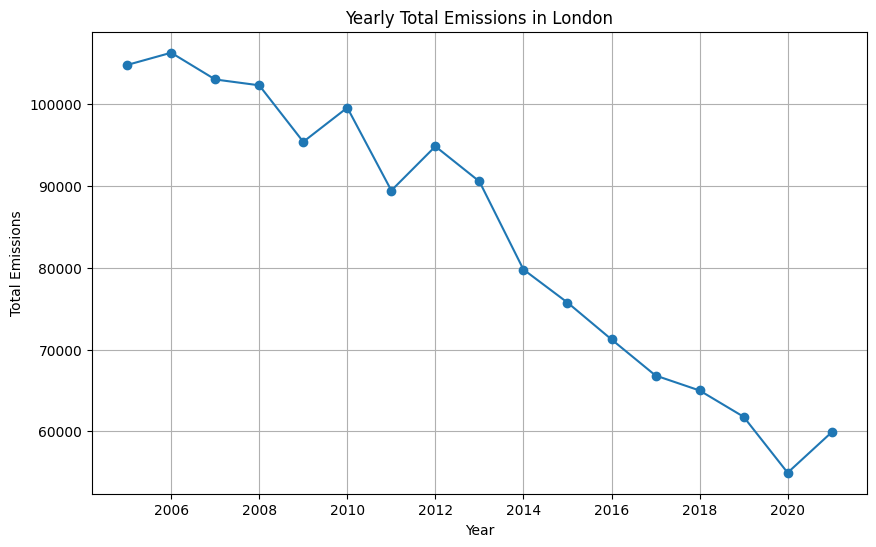

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

yearly_totals = London_local_authority_emissions.sum()

plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='line', marker='o')

plt.title('Yearly Total Emissions in London')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)

plt.show()

<h1>Wales</h1>

In [71]:
# Filter the data for the "Wales" Region/Country
Wales_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'Wales']
Wales_data

3    Region/Country Second Tier Authority Local Authority  \
5899          Wales                 Wales   Blaenau Gwent   
5900          Wales                 Wales   Blaenau Gwent   
5901          Wales                 Wales   Blaenau Gwent   
5902          Wales                 Wales   Blaenau Gwent   
5903          Wales                 Wales   Blaenau Gwent   
...             ...                   ...             ...   
6268          Wales                 Wales         Wrexham   
6269          Wales                 Wales         Wrexham   
6270          Wales                 Wales         Wrexham   
6271          Wales                 Wales         Wrexham   
6272          Wales                 Wales         Wrexham   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
5899            W06000019          2005             65.59808     30.923927   
5900            W06000019          2006            68.297658     37.994917   
5901            W06000019          2007              62.6949     35.219753   
5902            W06000019          2008            66.289964     35.527274   
5903            W06000019          2009            54.565764     24.645645   
...                   ...           ...                  ...           ...   
6268            W06000006          2017           138.291306    215.451935   
6269            W06000006          2018           124.951001    262.003868   
6270            W06000006          2019           114.083503    227.250945   
6271            W06000006          2020              87.7227    220.889613   
6272            W06000006          2021            95.762223     296.66666   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
5899                       0.910503        31.863069     129.295578  ...   
5900                       0.882636        33.684962     140.860173  ...   
5901                       0.895169        32.121519     130.931341  ...   
5902                       0.850555         30.52934     133.197132  ...   
5903                       0.868735        30.739822     110.819967  ...   
...                             ...              ...            ...  ...   
6268                       6.162685        58.279959     418.185885  ...   
6269                       6.784681        60.623925     454.363475  ...   
6270                      10.291972        58.155464     409.781884  ...   
6271                       8.987525         57.01724     374.617077  ...   
6272                         9.2927         60.24056     461.962144  ...   

3    Agriculture Soils Agriculture Total   Landfill Waste Management 'Other'  \
5899          1.393334          9.764239  101.06659                 3.698073   
5900          1.312323          9.408435  94.259989                 4.270126   
5901          1.306047          9.717945  99.165453                 4.397067   
5902          1.132106          9.145378  75.383486                 4.401133   
5903          1.198329          8.843912  66.026656                 4.155314   
...                ...               ...        ...                      ...   
6268         24.874715        226.456449   38.64809                13.623222   
6269         24.210341         219.62436  31.887202                14.560996   
6270         23.919956        209.605174  36.983958                17.280628   
6271         22.221266        229.931955    20.0322                16.058294   
6272          23.31838        216.993751  20.752061                13.022652   

3    Waste Management Total  Grand Total  \
5899             104.764663   590.397163   
5900              98.530116   594.764649   
5901              103.56252   576.227727   
5902              79.784619   559.320474   
5903               70.18197   494.419940   
...                     ...          ...   
6268              52.271312  1296.506128   
6269              46.448198  1269.213023   
6270              54.264586  1206.602551   
6271            

In [72]:
# Filter out rows where "Second Tier Authority" ends with "Total"
Wales_data_filtered = Wales_data[~Wales_data['Second Tier Authority'].str.endswith("Total")]


In [73]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']
# Add columns that end with "Total"
columns_to_keep.extend([col for col in Wales_data_filtered.columns if col.endswith("Total")])


In [74]:
Wales_filtered_columns = Wales_data_filtered[columns_to_keep]

Wales_filtered_columns.to_csv('Wales_filtered_columns.csv')
Wales_filtered_columns

3    Region/Country Second Tier Authority Local Authority  \
5899          Wales                 Wales   Blaenau Gwent   
5900          Wales                 Wales   Blaenau Gwent   
5901          Wales                 Wales   Blaenau Gwent   
5902          Wales                 Wales   Blaenau Gwent   
5903          Wales                 Wales   Blaenau Gwent   
...             ...                   ...             ...   
6268          Wales                 Wales         Wrexham   
6269          Wales                 Wales         Wrexham   
6270          Wales                 Wales         Wrexham   
6271          Wales                 Wales         Wrexham   
6272          Wales                 Wales         Wrexham   

3    Local Authority Code Calendar Year LULUCF Net Emissions Industry Total  \
5899            W06000019          2005            -0.327826     129.295578   
5900            W06000019          2006            -0.808447     140.860173   
5901            W06000019          2007            -0.645698     130.931341   
5902            W06000019          2008             -0.80085     133.197132   
5903            W06000019          2009            -1.145458     110.819967   
...                   ...           ...                  ...            ...   
6268            W06000006          2017            30.759367     418.185885   
6269            W06000006          2018              29.9354     454.363475   
6270            W06000006          2019            29.062392     409.781884   
6271            W06000006          2020             27.78471     374.617077   
6272            W06000006          2021            26.685561     461.962144   

3    Commercial Total Public Sector Total Domestic Total Transport Total  \
5899        32.730794           18.562459     195.049517       100.55774   
5900        35.206249           20.236768     193.346979       97.984376   
5901        32.374593           18.622168      181.66203      100.002829   
5902        33.935402           18.892512     186.674254       98.492027   
5903         27.19311           14.499577     167.845082        96.18178   
...               ...                 ...            ...             ...   
6268        72.175017           25.829278      213.93879       256.89003   
6269         25.79469            23.23909     211.829126      257.978684   
6270        22.563667           22.568689     203.705944      255.050215   
6271        18.213058           19.070547     196.043477      201.145887   
6272         21.63301           20.777525     201.075478      224.600499   

3    Agriculture Total Waste Management Total  Grand Total  
5899          9.764239             104.764663   590.397163  
5900          9.408435              98.530116   594.764649  
5901          9.717945              103.56252   576.227727  
5902          9.145378              79.784619   559.320474  
5903          8.843912               70.18197   494.419940  
...                ...                    ...          ...  
6268        226.456449              52.271312  1296.506128  
6269         219.62436              46.448198  1269.213023  
6270        209.605174              54.264586  1206.602551  
6271        229.931955              36.090495  1102.897206  
6272        216.993751              33.774714  1207.502681  

[374 rows x 14 columns]

In [75]:
# Create the pivot table of west_midlands local authorities emission
Wales_local_authority_emissions = pd.pivot_table(Wales_filtered_columns, values='Grand Total', index=['Local Authority'], columns=['Calendar Year'])

Wales_local_authority_emissions

Calendar Year             2005         2006         2007         2008  \
Local Authority                                                         
Blaenau Gwent       590.397163   594.764649   576.227727   559.320474   
Bridgend           1359.583320  1328.278136  1283.493003  1263.946946   
Caerphilly         1491.891676  1466.628930  1403.504827  1330.582166   
Cardiff            3698.847519  3411.240239  3306.860621  3193.118687   
Carmarthenshire    2602.104764  2570.189236  2518.959135  2471.906750   
Ceredigion         1126.256377  1101.837573  1058.937582  1040.970718   
Conwy              1235.264422  1213.764301  1125.155795  1089.955240   
Denbighshire       1037.682654  1043.320125   974.457215   958.170492   
Flintshire         2605.371511  2986.886044  2860.705377  2645.697658   
Gwynedd            1624.592759  1600.077478  1499.865799  1387.189173   
Isle of Anglesey   1117.058819  1108.004301  1040.619441   988.607137   
Merthyr Tydfil      515.601440   513.300545   487.687265   471.836465   
Monmouthshire      1215.100255  1153.962300  1138.193734  1141.699561   
Neath Port Talbot  8397.242394  8675.849163  9185.078825  8658.722681   
Newport            2548.432964  2594.748311  2362.596643  2198.052882   
Pembrokeshire      2156.112223  2156.710859  2116.327429  2053.474018   
Powys              2391.303577  2367.657499  2251.807570  2143.534926   
Rhondda Cynon Taf  2052.789179  2026.559884  1959.689670  1775.125008   
Swansea            2214.178239  2206.585074  2042.155416  1994.768164   
Torfaen             757.604676   754.329911   708.394730   730.888745   
Vale of Glamorgan  1806.882158  1744.202955  1754.105112  1665.188694   
Wrexham            2003.171855  2026.335823  1915.584024  1867.223062   

Calendar Year             2009         2010         2011         2012  \
Local Authority                                                         
Blaenau Gwent       494.419940   506.901265   428.349653   450.003214   
Bridgend           1173.890622  1176.357606  1095.250276  1113.884061   
Caerphilly         1221.059679  1253.815468  1065.323173  1126.135522   
Cardiff            2969.365021  2913.888084  2445.316260  2624.123187   
Carmarthenshire    2266.983363  2353.432116  2106.291325  2160.298425   
Ceredigion          997.238606  1037.376865   979.918183  1028.805758   
Conwy              1027.964417  1054.812419   937.861289   982.688234   
Denbighshire        896.630095   911.909382   828.091079   855.911724   
Flintshire         2212.047012  2138.727258  1963.600766  2230.682165   
Gwynedd            1337.827245  1365.531674  1234.055245  1301.921387   
Isle of Anglesey    885.864240   779.281527   704.367157   719.616464   
Merthyr Tydfil      424.200746   428.794167   365.600909   381.307059   
Monmouthshire      1074.428002  1108.142833  1039.640713  1045.764186   
Neath Port Talbot  6612.024925  8956.374552  7962.577083  6302.730722   
Newport            1843.604930  1951.700363  1677.179751  1594.614057   
Pembrokeshire      2050.219527  2034.014478  1900.570278  1905.002553   
Powys              2055.430330  2138.586231  1996.586736  2075.615066   
Rhondda Cynon Taf  1675.182762  1753.329228  1511.262605  1558.142019   
Swansea            1804.555497  1856.536451  1575.467083  1626.219109   
Torfaen             677.235185   689.494187   624.886068   652.483152   
Vale of Glamorgan  1485.307101  1532.067292  1482.858073  1476.054129   
Wrexham            1741.254914  1809.813490  1575.432300  1625.809205   

Calendar Year             2013         2014         2015         2016  \
Local Authority                                                         
Blaenau Gwent       451.114407   389.828472   534.622710   390.962484   
Bridgend           1103.423135  1031.194944   984.409370   958.793719   
Caerphilly         1120.623853  1014.975553   953.279500   926.438348   
Cardiff            2519.808130  2228.403312  2107.776243  2042.344438   
Carmarthenshire    2173.361058  2119.475047  2010.904061

In [76]:
# Calculate the yearly total emissions for each year
yearly_totals = Wales_local_authority_emissions.sum()

# Append the totals as a new row to the DataFrame
Wales_local_authority_emissions.loc['Total'] = yearly_totals

Wales_local_authority_emissions

Calendar Year              2005          2006          2007          2008  \
Local Authority                                                             
Blaenau Gwent        590.397163    594.764649    576.227727    559.320474   
Bridgend            1359.583320   1328.278136   1283.493003   1263.946946   
Caerphilly          1491.891676   1466.628930   1403.504827   1330.582166   
Cardiff             3698.847519   3411.240239   3306.860621   3193.118687   
Carmarthenshire     2602.104764   2570.189236   2518.959135   2471.906750   
Ceredigion          1126.256377   1101.837573   1058.937582   1040.970718   
Conwy               1235.264422   1213.764301   1125.155795   1089.955240   
Denbighshire        1037.682654   1043.320125    974.457215    958.170492   
Flintshire          2605.371511   2986.886044   2860.705377   2645.697658   
Gwynedd             1624.592759   1600.077478   1499.865799   1387.189173   
Isle of Anglesey    1117.058819   1108.004301   1040.619441    988.607137   
Merthyr Tydfil       515.601440    513.300545    487.687265    471.836465   
Monmouthshire       1215.100255   1153.962300   1138.193734   1141.699561   
Neath Port Talbot   8397.242394   8675.849163   9185.078825   8658.722681   
Newport             2548.432964   2594.748311   2362.596643   2198.052882   
Pembrokeshire       2156.112223   2156.710859   2116.327429   2053.474018   
Powys               2391.303577   2367.657499   2251.807570   2143.534926   
Rhondda Cynon Taf   2052.789179   2026.559884   1959.689670   1775.125008   
Swansea             2214.178239   2206.585074   2042.155416   1994.768164   
Torfaen              757.604676    754.329911    708.394730    730.888745   
Vale of Glamorgan   1806.882158   1744.202955   1754.105112   1665.188694   
Wrexham             2003.171855   2026.335823   1915.584024   1867.223062   
Total              44547.469945  44645.233337  43570.406943  41629.979644   

Calendar Year              2009          2010          2011          2012  \
Local Authority                                                             
Blaenau Gwent        494.419940    506.901265    428.349653    450.003214   
Bridgend            1173.890622   1176.357606   1095.250276   1113.884061   
Caerphilly          1221.059679   1253.815468   1065.323173   1126.135522   
Cardiff             2969.365021   2913.888084   2445.316260   2624.123187   
Carmarthenshire     2266.983363   2353.432116   2106.291325   2160.298425   
Ceredigion           997.238606   1037.376865    979.918183   1028.805758   
Conwy               1027.964417   1054.812419    937.861289    982.688234   
Denbighshire         896.630095    911.909382    828.091079    855.911724   
Flintshire          2212.047012   2138.727258   1963.600766   2230.682165   
Gwynedd             1337.827245   1365.531674   1234.055245   1301.921387   
Isle of Anglesey     885.864240    779.281527    704.367157    719.616464   
Merthyr Tydfil       424.200746    428.794167    365.600909    381.307059   
Monmouthshire       1074.428002   1108.142833   1039.640713   1045.764186   
Neath Port Talbot   6612.024925   8956.374552   7962.577083   6302.730722   
Newport             1843.604930   1951.700363   1677.179751   1594.614057   
Pembrokeshire       2050.219527   2034.014478   1900.570278   1905.002553   
Powys               2055.430330   2138.586231   1996.586736   2075.615066   
Rhondda Cynon Taf   1675.182762   1753.329228   1511.262605   1558.142019   
Swansea             1804.555497   1856.536451   1575.467083   1626.219109   
Torfaen              677.235185    689.494187    624.886068    652.483152   
Vale of Glamorgan   1485.307101   1532.067292   1482.858073   1476.054129   
Wrexham             1741.254914   1809.813490   1575.432300   1625.809205   
Total              36926.734158  39750.886937  35500.486005  34837.811399   

Calendar Year              2013          2014          2015          2016  \
Local Authority                                                        

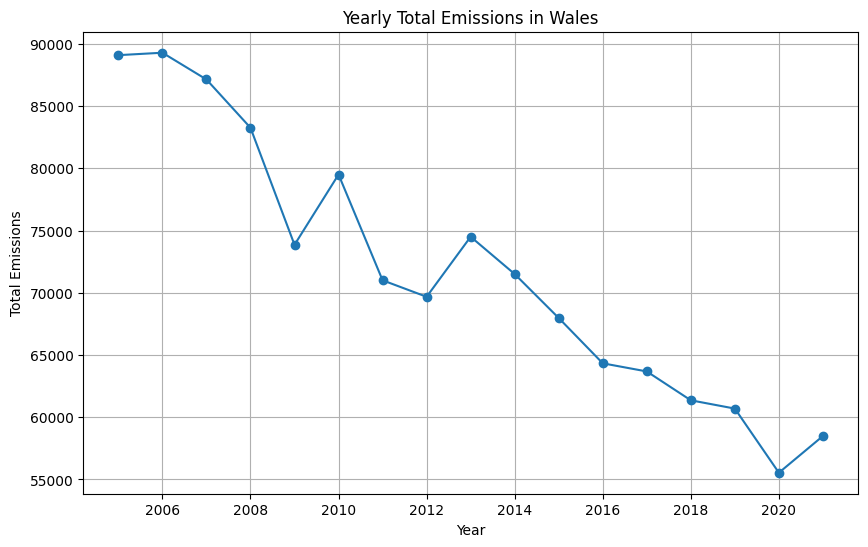

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

yearly_totals = Wales_local_authority_emissions.sum()

plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='line', marker='o')

plt.title('Yearly Total Emissions in Wales')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)

plt.show()

In [78]:
yearly_totals

Calendar Year
2005    89094.939890
2006    89290.466673
2007    87140.813886
2008    83259.959289
2009    73853.468315
2010    79501.773874
2011    71000.972010
2012    69675.622798
2013    74501.047094
2014    71501.660855
2015    67969.985863
2016    64329.383852
2017    63675.637671
2018    61356.652486
2019    60690.289653
2020    55536.540557
2021    58486.651947
dtype: float64

<h1>Population ('000s, mid-year estimate)</h1>

 Population ('000s, mid-year estimate) refers to the estimated population of a region in the middle of a given year, expressed in thousands. For instance, if the mid-year population estimate for a region is 1,200 '000s, it means the estimated population is 1.2 million individuals. These estimates are used for calculating per capita metrics and understanding demographic changes over time. In this case the United Kingdoms demograhic changes between 2005 to 2021

<h1>Per Capita Emissions</h1>

Per capita emissions refer to the average release of emissions (carbon dioxide, CO2) attributed to each individual within a certain united kingdon's population between the year 2005 and 2021

<h1>Average Emissions per km² by Region </h1>

Average Emissions per km² by Region refers to a measure used to understand the density of emissions in a given area. This metric provides an average value of emissions (carbon dioxide, CO2) distributed over the total land area of a region in the United Kingdom, expressed in square kilometers (km²)

In [79]:

data_1_1_actual['Per Capita Emissions'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce') / \
                                          pd.to_numeric(data_1_1_actual["Per Capita Emissions (tCO2e)"], errors='coerce')


data_1_1_actual['Emissions per km^2'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce') / \
                                        pd.to_numeric(data_1_1_actual['Emissions per km2 (kt CO2e)'], errors='coerce')


# Group by 'Region/Country' to get average per capita emissions and emissions per km^2 for each region
average_emissions = data_1_1_actual.groupby('Region/Country')[['Per Capita Emissions', 'Emissions per km^2']].mean()

average_emissions

3                               Per Capita Emissions  Emissions per km^2
Region/Country                                                          
East Midlands                             207.488221          775.042820
East Midlands Total                      4616.416898        15810.724100
East of England                           219.709033          755.488316
East of England Total                    5971.139613        19584.438300
England Total                           53808.864075       132929.086100
London                                    250.849430           48.324148
London Total                             8278.031179         1594.696900
National Total                          64016.313391       248717.570600
North East                                216.943797          722.891083
North East Total                         2603.325564         8674.693000
North West                                227.190716          649.704917
North West Total                         7138.480282        14914.430300
Northern Ireland                          166.084941         1302.705827
Northern Ireland Total                   1826.934347        14329.764100
Scotland                                  166.123185         2507.276138
Scotland Total                           5315.941925        80232.836400
South East                                211.009610          497.128019
South East Total                         8775.463731        19400.106000
South West                                237.498894         1174.519568
South West Total                         5403.079014        24385.758100
Unallocated                                      NaN                 NaN
Wales                                     139.298775          964.812909
Wales Total                              3064.573044        21225.884000
West Midlands                             232.673347          586.214827
West Midlands Total                      5688.894694        13003.738100
Yorkshire and the Humber                  269.901112         1073.304277
Yorkshire and the Humber Total           5334.033099        15560.501300

In [80]:
data_1_1_actual.head()

3 Region/Country Second Tier Authority Local Authority Local Authority Code  \
0     North East            Darlington      Darlington            E06000005   
1     North East            Darlington      Darlington            E06000005   
2     North East            Darlington      Darlington            E06000005   
3     North East            Darlington      Darlington            E06000005   
4     North East            Darlington      Darlington            E06000005   

3 Calendar Year Industry Electricity Industry Gas   \
0          2005             51.87311    114.701874   
1          2006            55.398988     97.614091   
2          2007            52.249398     95.167732   
3          2008            51.651166     95.266031   
4          2009            45.607413     82.045964   

3 Large Industrial Installations Industry 'Other' Industry Total  ...  \
0                       0.045681        43.073543     209.694209  ...   
1                       0.065836        42.086928     195.165842  ...   
2                       0.074503         43.79521     191.286843  ...   
3                       0.055964        35.982972     182.956132  ...   
4                       1.061014        26.863721     155.578112  ...   

3   Landfill Waste Management 'Other' Waste Management Total Grand Total  \
0  34.256022                 5.613394              39.869415  968.661604   
1  31.802024                  6.57408              38.376104  943.627506   
2  37.048534                  6.81813              43.866664  925.275164   
3   7.662955                 6.771385               14.43434  876.045542   
4  16.001037                 6.053694              22.054731  805.592471   

3 Population ('000s, mid-year estimate) Per Capita Emissions (tCO2e)  \
0                               100.287                     9.658895   
1                               101.509                     9.295998   
2                               102.632                     9.015465   
3                               103.694                     8.448373   
4                               104.355                      7.71973   

3 Area (km2) Emissions per km2 (kt CO2e) Per Capita Emissions  \
0   197.4758                    4.905217              100.287   
1   197.4758                    4.778446              101.509   
2   197.4758                    4.685512              102.632   
3   197.4758                    4.436217              103.694   
4   197.4758                    4.079449              104.355   

3 Emissions per km^2  
0           197.4758  
1           197.4758  
2           197.4758  
3           197.4758  
4           197.4758  

[5 rows x 52 columns]

In [81]:

#population = data_1_1_actual["Population ('000s, mid-year estimate)"].sum()

#per_capita_emissions = data_1_1_actual['Per Capita Emissions (tCO2e)'].sum()

#area = data_1_1_actual['Area (km2)'].sum()

#emissions_per_km2 = data_1_1_actual['Emissions per km2 (kt CO2e)'].sum()

grouped_data = data_1_1_actual.groupby('Region/Country').agg({
    'Per Capita Emissions (tCO2e)': 'sum',
    'Emissions per km2 (kt CO2e)': 'sum'
}).reset_index()

#print(f"Population: {population}")
#print(f"Per Capita Emissions: {per_capita_emissions}")
#print(f"Area: {area}")
#print(f"Emissions per km^2: {emissions_per_km2}")

grouped_data

3                   Region/Country Per Capita Emissions (tCO2e)  \
0                    East Midlands                  6603.376367   
1              East Midlands Total                   147.366412   
2                  East of England                   7015.06806   
3            East of England Total                   134.801621   
4                    England Total                   127.891663   
5                           London                  5788.435727   
6                     London Total                    86.933115   
7                   National Total                   137.833562   
8                       North East                  2325.728502   
9                 North East Total                   174.093046   
10                      North West                  6612.332127   
11                North West Total                   135.408564   
12                Northern Ireland                  2539.955682   
13          Northern Ireland Total                   214.783706   
14                        Scotland                  6408.276482   
15                  Scotland Total                   162.410739   
16                      South East                  8096.855571   
17                South East Total                   115.186742   
18                      South West                  4748.447115   
19                South West Total                   130.293184   
20                     Unallocated                            0   
21                           Wales                   4501.98646   
22                     Wales Total                   199.643258   
23                   West Midlands                  4837.519675   
24             West Midlands Total                   125.654421   
25        Yorkshire and the Humber                  4254.796535   
26  Yorkshire and the Humber Total                   154.565811   

3  Emissions per km2 (kt CO2e)  
0                  3616.540705  
1                    42.750318  
2                  5002.183019  
3                    40.782288  
4                    51.387083  
5                 26454.077988  
6                    445.56866  
7                    35.234679  
8                  2289.486191  
9                    52.026034  
10                 5502.381851  
11                   64.501407  
12                  578.895313  
13                   27.286433  
14                 1863.816717  
15                   10.721385  
16                 7480.481869  
17                   51.648999  
18                 2243.044636  
19                   28.652961  
20                           0  
21                 1518.659434  
22                   28.758893  
23                 4153.078636  
24                   54.659434  
25                 1882.391728  
26                   52.753475

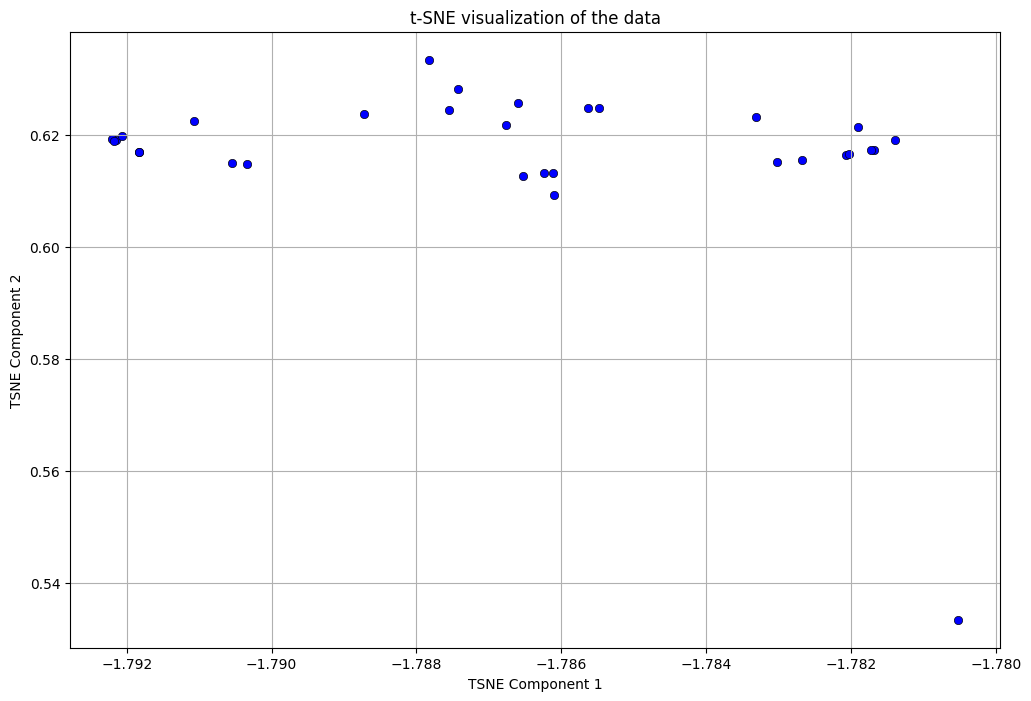

In [82]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

data_transposed = west_midlands_local_authority_emissions

numerical_data = data_transposed.select_dtypes(include=[np.number])

numerical_data_filled = numerical_data.fillna(numerical_data.mean())

sampled_data = numerical_data_filled.sample(frac=1.0, random_state=0)

# t-SNE transformation
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(sampled_data)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results[:, 0],
    'TSNE2': tsne_results[:, 1]
})

# Plotting the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', color='blue', edgecolor='black', data=tsne_df)
plt.title('t-SNE visualization of the data')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()

In [83]:
tsne_df

TSNE1     TSNE2
0  -1.785631  0.624841
1  -1.788719  0.623817
2  -1.787833  0.633427
3  -1.792142  0.619114
4  -1.787550  0.624467
5  -1.781393  0.619026
6  -1.786603  0.625624
7  -1.783308  0.623274
8  -1.792199  0.619256
9  -1.781684  0.617315
10 -1.792177  0.618870
11 -1.790549  0.614944
12 -1.791073  0.622495
13 -1.786527  0.612612
14 -1.782063  0.616407
15 -1.783022  0.615099
16 -1.786767  0.621690
17 -1.780526  0.533433
18 -1.786115  0.613159
19 -1.790346  0.614757
20 -1.782031  0.616524
21 -1.791830  0.617017
22 -1.782677  0.615504
23 -1.792072  0.619835
24 -1.781903  0.621478
25 -1.791833  0.616874
26 -1.786235  0.613235
27 -1.786099  0.609192
28 -1.781730  0.617273
29 -1.787425  0.628141
30 -1.785473  0.624867

In [84]:
data_transposed

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [85]:
data_transposed.dtypes

Calendar Year
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
dtype: object

In [86]:
numerical_data

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [87]:
tsne_df

TSNE1     TSNE2
0  -1.785631  0.624841
1  -1.788719  0.623817
2  -1.787833  0.633427
3  -1.792142  0.619114
4  -1.787550  0.624467
5  -1.781393  0.619026
6  -1.786603  0.625624
7  -1.783308  0.623274
8  -1.792199  0.619256
9  -1.781684  0.617315
10 -1.792177  0.618870
11 -1.790549  0.614944
12 -1.791073  0.622495
13 -1.786527  0.612612
14 -1.782063  0.616407
15 -1.783022  0.615099
16 -1.786767  0.621690
17 -1.780526  0.533433
18 -1.786115  0.613159
19 -1.790346  0.614757
20 -1.782031  0.616524
21 -1.791830  0.617017
22 -1.782677  0.615504
23 -1.792072  0.619835
24 -1.781903  0.621478
25 -1.791833  0.616874
26 -1.786235  0.613235
27 -1.786099  0.609192
28 -1.781730  0.617273
29 -1.787425  0.628141
30 -1.785473  0.624867

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


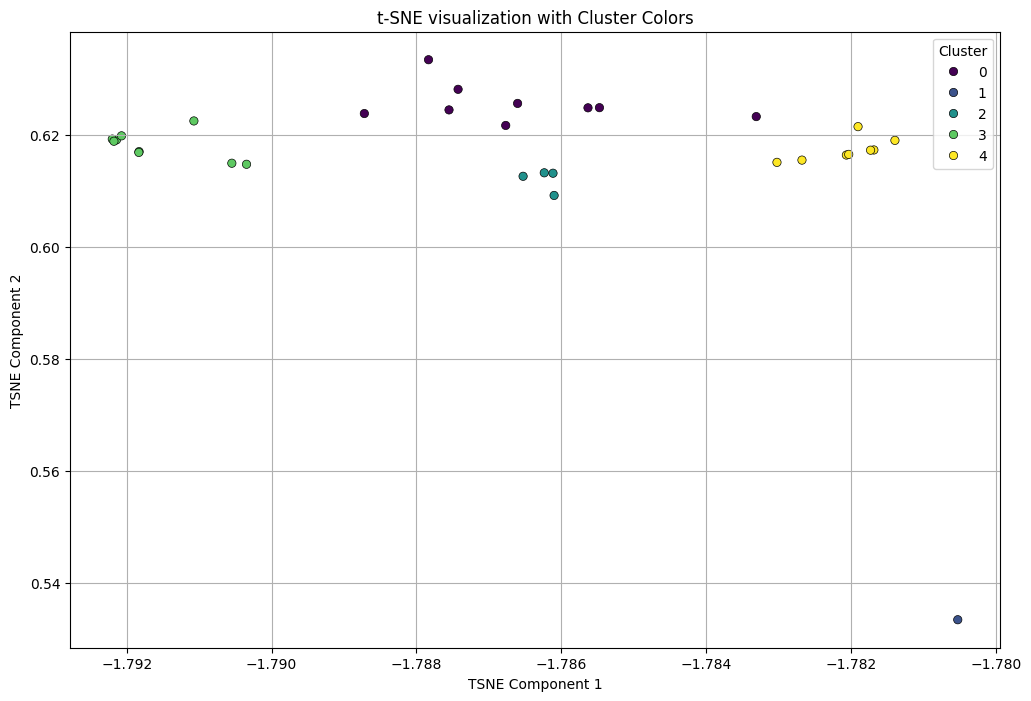

In [88]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


tsne_results = tsne_df

tsne_component_1 = tsne_results['TSNE1']
tsne_component_2 = tsne_results['TSNE2']

kmeans = KMeans(n_clusters=5, random_state=0)
tsne_results['Cluster'] = kmeans.fit_predict(tsne_results[['TSNE1', 'TSNE2']])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', edgecolor='black', data=tsne_results, legend='full')

plt.title('t-SNE visualization with Cluster Colors')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [89]:
tsne_df

TSNE1     TSNE2  Cluster
0  -1.785631  0.624841        0
1  -1.788719  0.623817        0
2  -1.787833  0.633427        0
3  -1.792142  0.619114        3
4  -1.787550  0.624467        0
5  -1.781393  0.619026        4
6  -1.786603  0.625624        0
7  -1.783308  0.623274        0
8  -1.792199  0.619256        3
9  -1.781684  0.617315        4
10 -1.792177  0.618870        3
11 -1.790549  0.614944        3
12 -1.791073  0.622495        3
13 -1.786527  0.612612        2
14 -1.782063  0.616407        4
15 -1.783022  0.615099        4
16 -1.786767  0.621690        0
17 -1.780526  0.533433        1
18 -1.786115  0.613159        2
19 -1.790346  0.614757        3
20 -1.782031  0.616524        4
21 -1.791830  0.617017        3
22 -1.782677  0.615504        4
23 -1.792072  0.619835        3
24 -1.781903  0.621478        4
25 -1.791833  0.616874        3
26 -1.786235  0.613235        2
27 -1.786099  0.609192        2
28 -1.781730  0.617273        4
29 -1.787425  0.628141        0
30 -1.785473  0.624867        0

In [90]:
tsne_df.to_csv('tsne.csv', index=False)

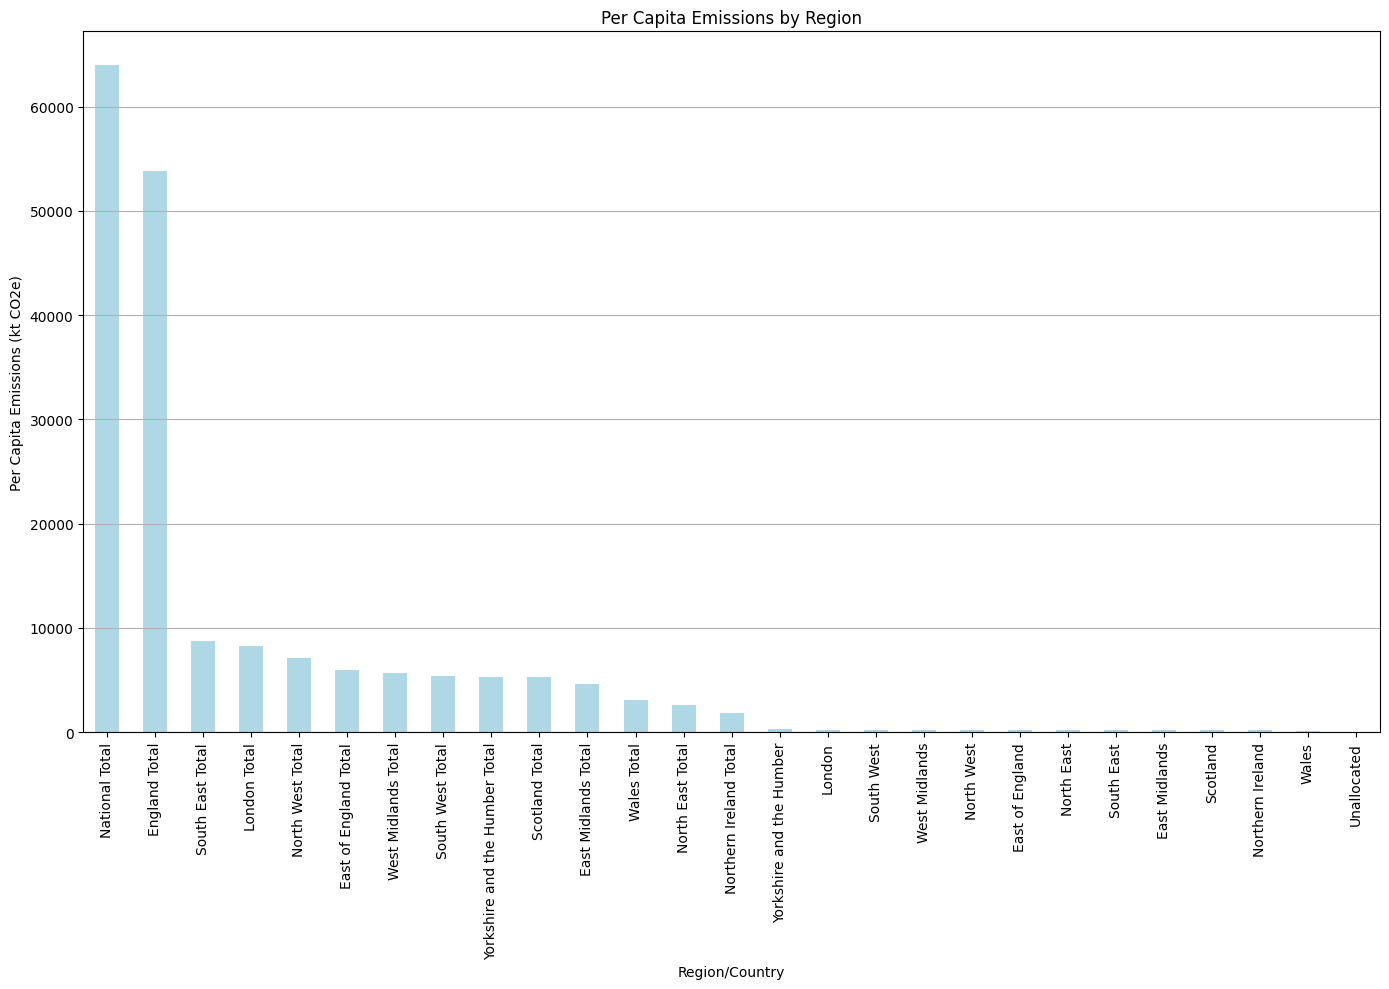

In [91]:
# Sort the regions based on average per capita emissions
sorted_per_capita = average_emissions['Per Capita Emissions'].sort_values(ascending=False)

# Plotting average per capita emissions for each region
plt.figure(figsize=(14, 10))
sorted_per_capita.plot(kind='bar', color='lightblue')
plt.title('Per Capita Emissions by Region')
plt.ylabel('Per Capita Emissions (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [92]:

average_emissions

3                               Per Capita Emissions  Emissions per km^2
Region/Country                                                          
East Midlands                             207.488221          775.042820
East Midlands Total                      4616.416898        15810.724100
East of England                           219.709033          755.488316
East of England Total                    5971.139613        19584.438300
England Total                           53808.864075       132929.086100
London                                    250.849430           48.324148
London Total                             8278.031179         1594.696900
National Total                          64016.313391       248717.570600
North East                                216.943797          722.891083
North East Total                         2603.325564         8674.693000
North West                                227.190716          649.704917
North West Total                         7138.480282        14914.430300
Northern Ireland                          166.084941         1302.705827
Northern Ireland Total                   1826.934347        14329.764100
Scotland                                  166.123185         2507.276138
Scotland Total                           5315.941925        80232.836400
South East                                211.009610          497.128019
South East Total                         8775.463731        19400.106000
South West                                237.498894         1174.519568
South West Total                         5403.079014        24385.758100
Unallocated                                      NaN                 NaN
Wales                                     139.298775          964.812909
Wales Total                              3064.573044        21225.884000
West Midlands                             232.673347          586.214827
West Midlands Total                      5688.894694        13003.738100
Yorkshire and the Humber                  269.901112         1073.304277
Yorkshire and the Humber Total           5334.033099        15560.501300

In [93]:
print(average_emissions.columns)

Index(['Per Capita Emissions', 'Emissions per km^2'], dtype='object', name=3)


In [94]:
print(average_emissions.index)

Index(['East Midlands', 'East Midlands Total', 'East of England',
       'East of England Total', 'England Total', 'London', 'London Total',
       'National Total', 'North East', 'North East Total', 'North West',
       'North West Total', 'Northern Ireland', 'Northern Ireland Total',
       'Scotland', 'Scotland Total', 'South East', 'South East Total',
       'South West', 'South West Total', 'Unallocated', 'Wales', 'Wales Total',
       'West Midlands', 'West Midlands Total', 'Yorkshire and the Humber',
       'Yorkshire and the Humber Total'],
      dtype='object', name='Region/Country')


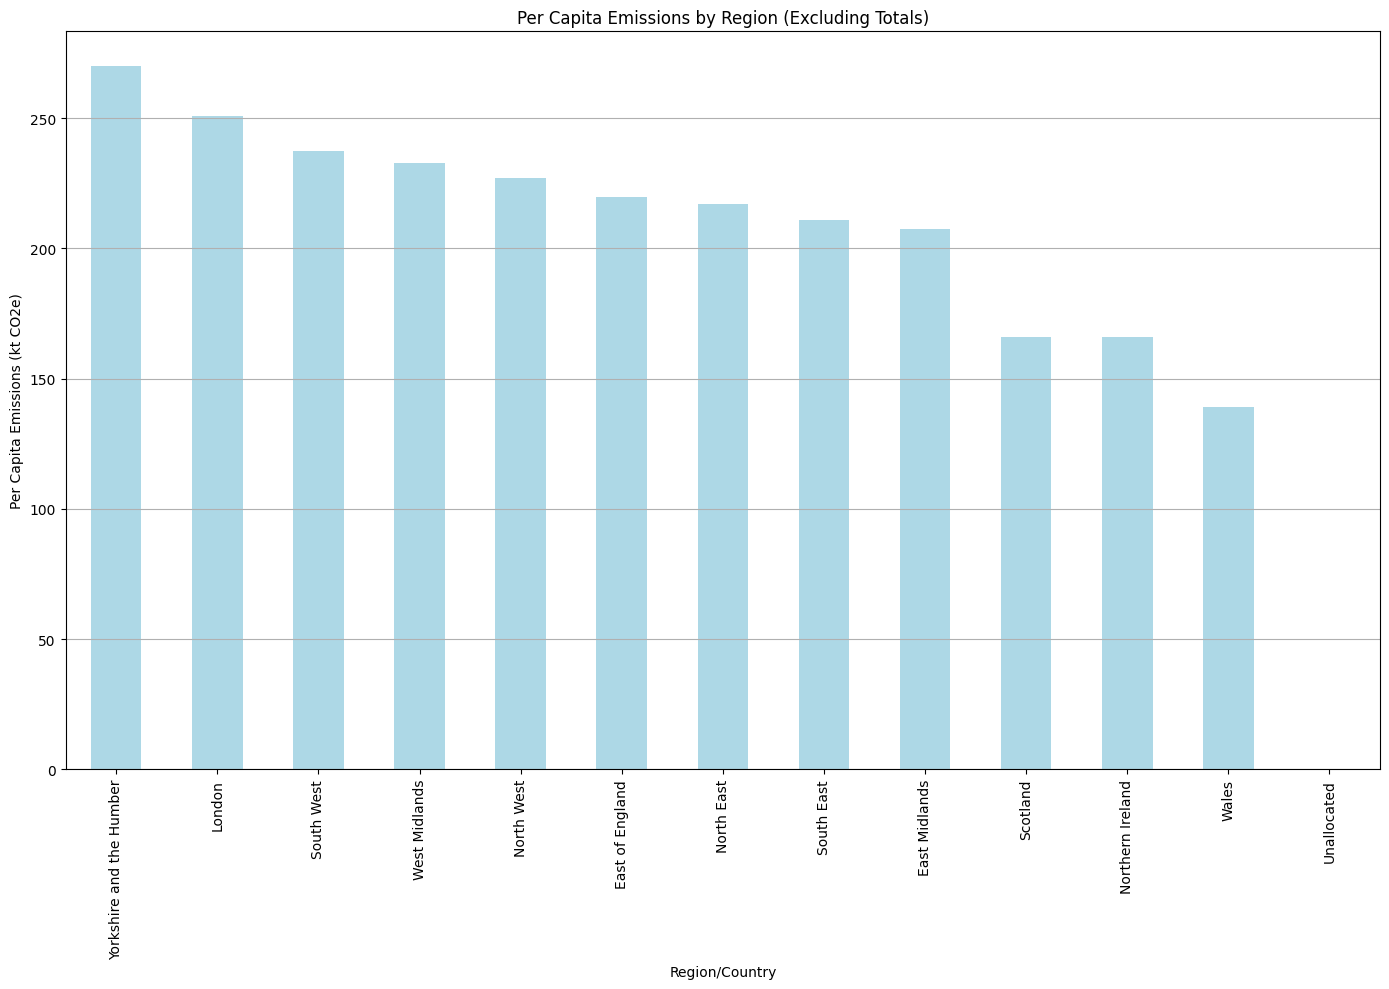

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows where 'Region/Country' ends with 'Total'
filtered_average_emissions = average_emissions[~average_emissions.index.str.endswith('Total')]

# Sort the regions based on average per capita emissions
sorted_per_capita = filtered_average_emissions['Per Capita Emissions'].sort_values(ascending=False)

# Plotting average per capita emissions for each region
plt.figure(figsize=(14, 10))
sorted_per_capita.plot(kind='bar', color='lightblue')
plt.title('Per Capita Emissions by Region (Excluding Totals)')
plt.ylabel('Per Capita Emissions (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

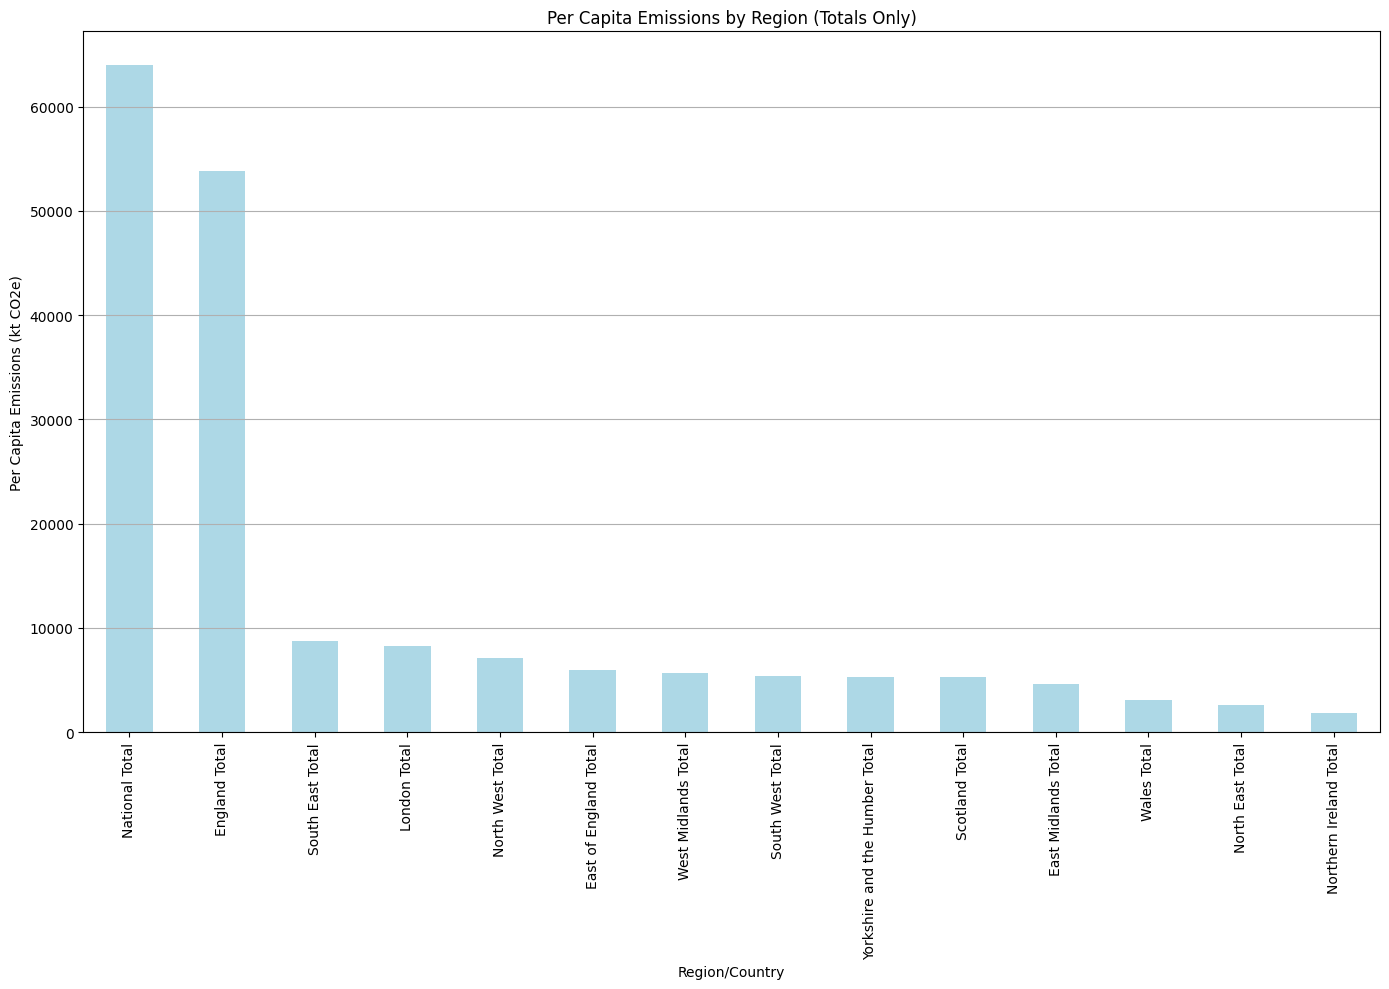

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for only rows where 'Region/Country' ends with 'Total'
filtered_average_emissions = average_emissions[average_emissions.index.str.endswith('Total')]

# Sort the regions based on average per capita emissions
sorted_per_capita = filtered_average_emissions['Per Capita Emissions'].sort_values(ascending=False)

# Plotting average per capita emissions for each region
plt.figure(figsize=(14, 10))
sorted_per_capita.plot(kind='bar', color='lightblue')
plt.title('Per Capita Emissions by Region (Totals Only)')
plt.ylabel('Per Capita Emissions (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

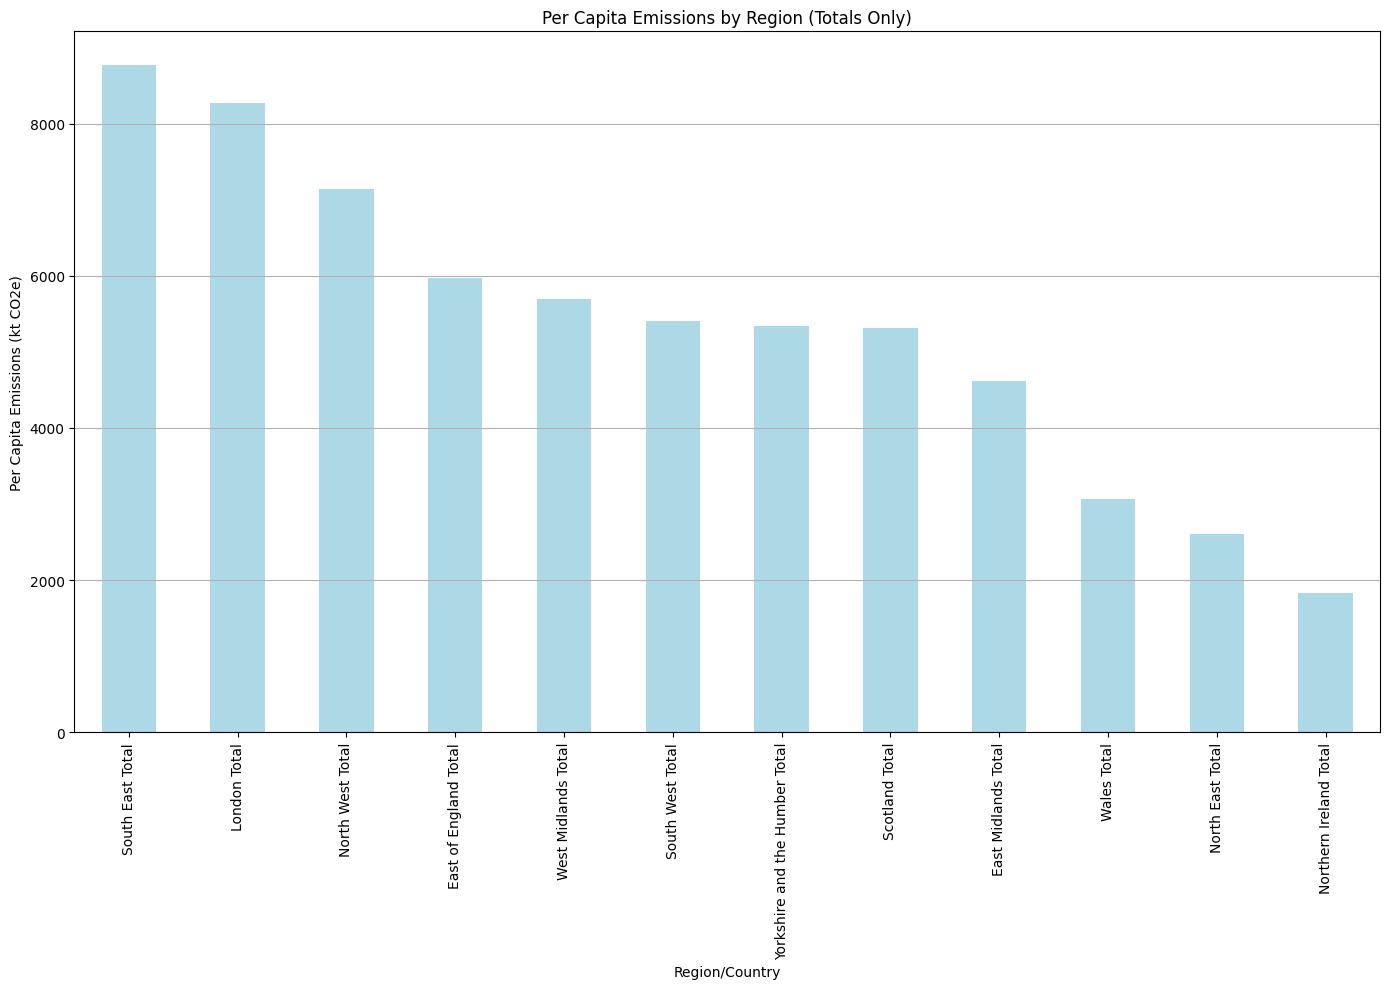

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for only rows where 'Region/Country' ends with 'Total' also without 'National Total' and 'England Total'
# filtered_average_emissions = average_emissions[average_emissions.index.str.endswith('Total')]
filtered_average_emissions = average_emissions[average_emissions.index.str.endswith('Total') & ~(average_emissions.index.isin(['National Total', 'England Total']))]


# Sort the regions based on average per capita emissions
sorted_per_capita = filtered_average_emissions['Per Capita Emissions'].sort_values(ascending=False)

# Plotting average per capita emissions for each region
plt.figure(figsize=(14, 10))
sorted_per_capita.plot(kind='bar', color='lightblue')
plt.title('Per Capita Emissions by Region (Totals Only)')
plt.ylabel('Per Capita Emissions (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h1>Per capita emissions refer to the average release of emissions (carbon dioxide, CO2) attributed to each individual within a certain population.</h1>

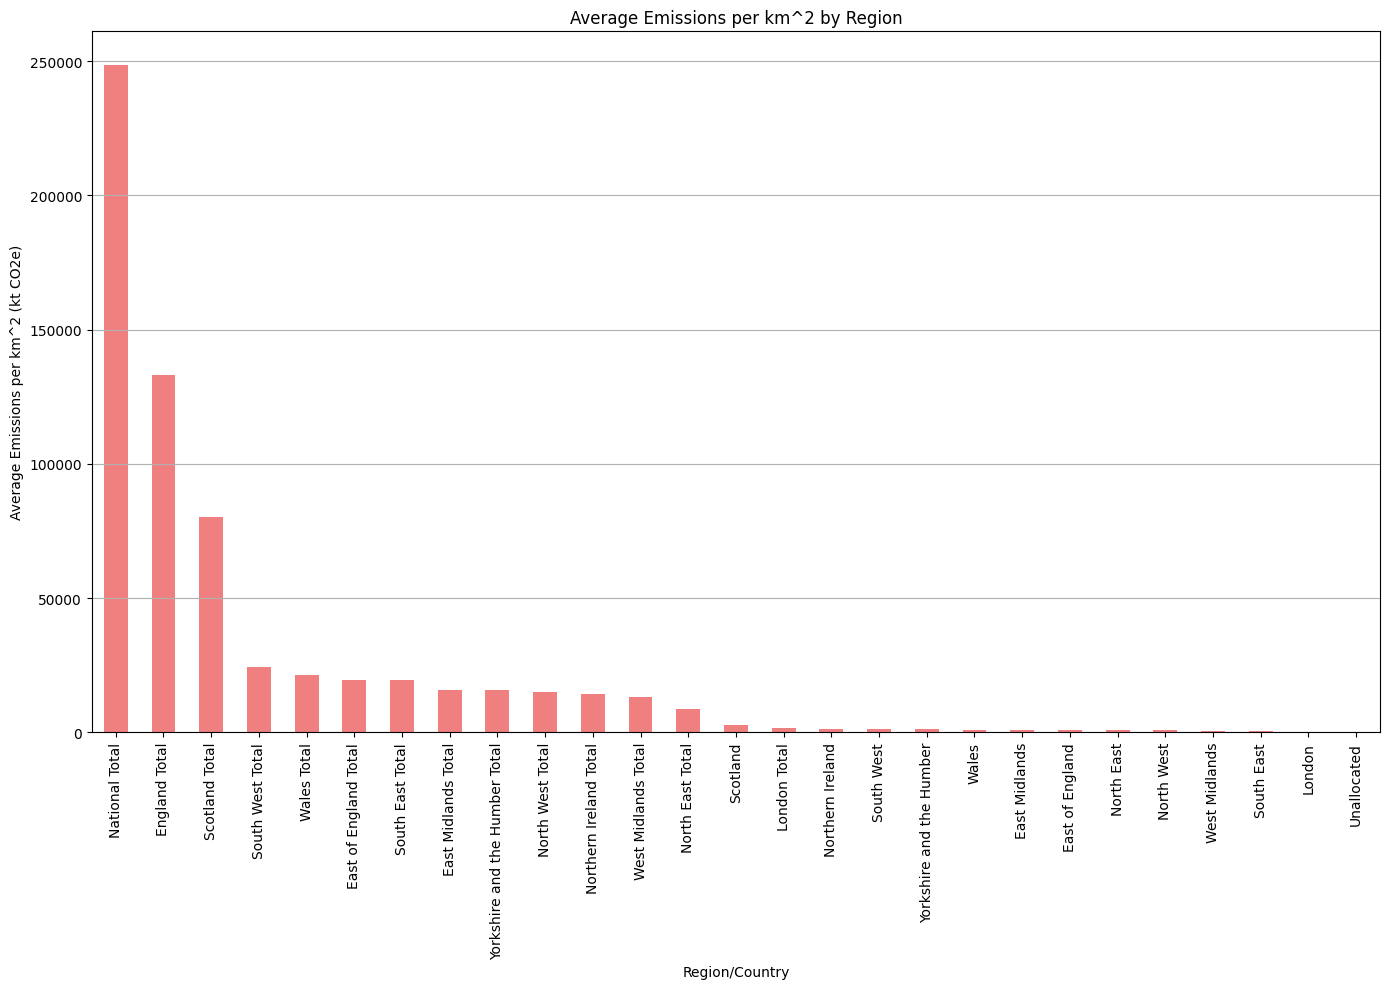

In [98]:
# Sort the regions based on average emissions per km^2
sorted_per_km2 = average_emissions['Emissions per km^2'].sort_values(ascending=False)

# Plotting average emissions per km^2 for each region
plt.figure(figsize=(14, 10))
sorted_per_km2.plot(kind='bar', color='lightcoral')
plt.title('Average Emissions per km^2 by Region')
plt.ylabel('Average Emissions per km^2 (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [99]:
sorted_per_km2



Region/Country
National Total                    248717.570600
England Total                     132929.086100
Scotland Total                     80232.836400
South West Total                   24385.758100
Wales Total                        21225.884000
East of England Total              19584.438300
South East Total                   19400.106000
East Midlands Total                15810.724100
Yorkshire and the Humber Total     15560.501300
North West Total                   14914.430300
Northern Ireland Total             14329.764100
West Midlands Total                13003.738100
North East Total                    8674.693000
Scotland                            2507.276138
London Total                        1594.696900
Northern Ireland                    1302.705827
South West                          1174.519568
Yorkshire and the Humber            1073.304277
Wales                                964.812909
East Midlands                        775.042820
East of England          

In [100]:
sorted_per_km2.values

array([2.48717571e+05, 1.32929086e+05, 8.02328364e+04, 2.43857581e+04,
       2.12258840e+04, 1.95844383e+04, 1.94001060e+04, 1.58107241e+04,
       1.55605013e+04, 1.49144303e+04, 1.43297641e+04, 1.30037381e+04,
       8.67469300e+03, 2.50727614e+03, 1.59469690e+03, 1.30270583e+03,
       1.17451957e+03, 1.07330428e+03, 9.64812909e+02, 7.75042820e+02,
       7.55488316e+02, 7.22891083e+02, 6.49704917e+02, 5.86214827e+02,
       4.97128019e+02, 4.83241485e+01,            nan])

In [101]:

print(sorted_per_km2.index)

Index(['National Total', 'England Total', 'Scotland Total', 'South West Total',
       'Wales Total', 'East of England Total', 'South East Total',
       'East Midlands Total', 'Yorkshire and the Humber Total',
       'North West Total', 'Northern Ireland Total', 'West Midlands Total',
       'North East Total', 'Scotland', 'London Total', 'Northern Ireland',
       'South West', 'Yorkshire and the Humber', 'Wales', 'East Midlands',
       'East of England', 'North East', 'North West', 'West Midlands',
       'South East', 'London', 'Unallocated'],
      dtype='object', name='Region/Country')


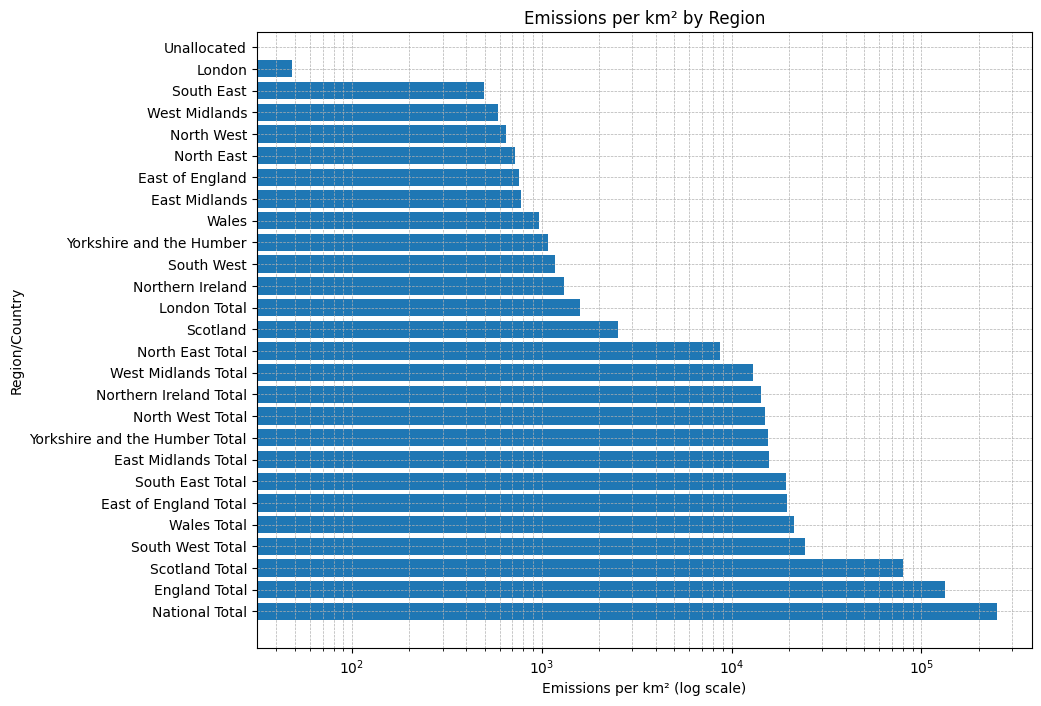

In [102]:
plt.figure(figsize=(10, 8))
plt.barh(sorted_per_km2.index, sorted_per_km2.values)
plt.xscale('log')  # Using logarithmic scale due to wide range of values
plt.xlabel('Emissions per km² (log scale)')
plt.ylabel('Region/Country')
plt.title('Emissions per km² by Region')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [103]:
individual_regions = sorted_per_km2[~sorted_per_km2.index.str.contains('Total') & ~(sorted_per_km2.index.isin(['Unallocated']))]


In [104]:
individual_regions

Region/Country
Scotland                    2507.276138
Northern Ireland            1302.705827
South West                  1174.519568
Yorkshire and the Humber    1073.304277
Wales                        964.812909
East Midlands                775.042820
East of England              755.488316
North East                   722.891083
North West                   649.704917
West Midlands                586.214827
South East                   497.128019
London                        48.324148
Name: Emissions per km^2, dtype: float64

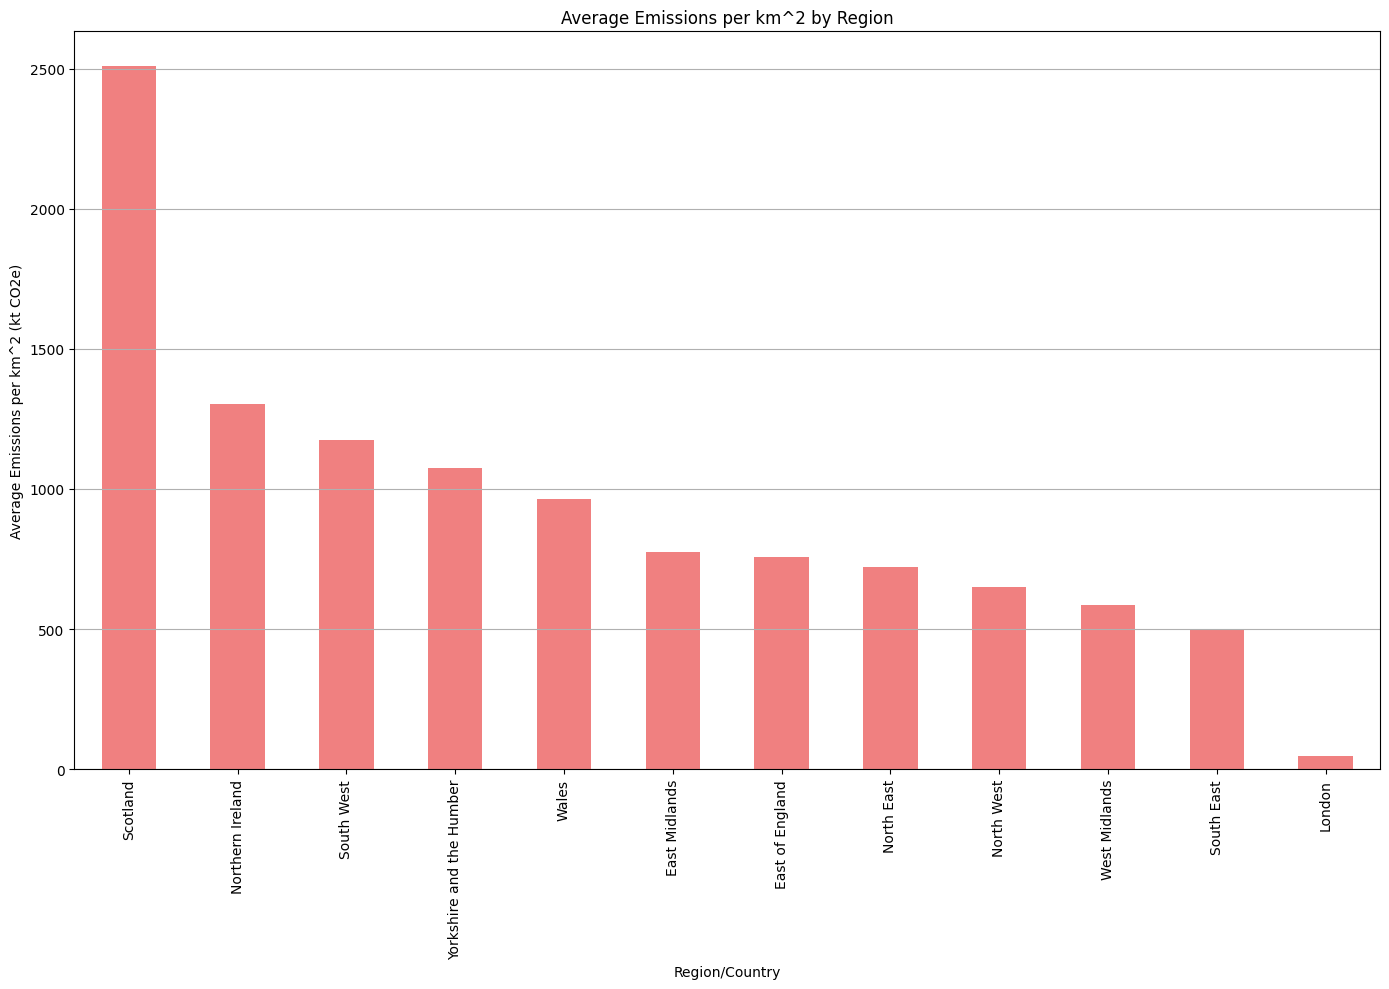

In [105]:
plt.figure(figsize=(14, 10))
individual_regions.plot(kind='bar', color='lightcoral')
plt.title('Average Emissions per km^2 by Region')
plt.ylabel('Average Emissions per km^2 (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Average Emissions per km² by Region refers to a measure used to understand the density of emissions in a given area. This metric provides an average value of emissions (carbon dioxide, CO2) distributed over the total land area of a region, expressed in square kilometers (km²)

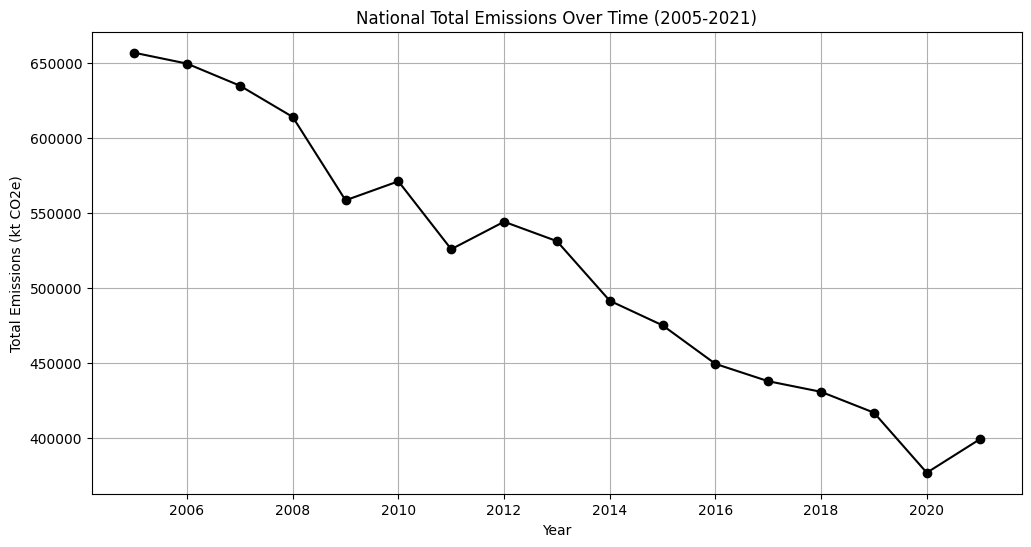

In [106]:
# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-', color='black')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()

In [107]:
# Assuming data_1_1_actual is a pandas DataFrame with the relevant data
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']

# Group by 'Calendar Year' and sum the 'Grand Total'
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Convert the Series back to a DataFrame and reset the index
national_time_series_table = national_time_series.reset_index()

# Display the DataFrame as a table
national_time_series_table

Calendar Year    Grand Total
0            2005  656867.315366
1            2006  649603.223057
2            2007  634904.263654
3            2008  614046.665833
4            2009  558455.613837
5            2010  571129.481835
6            2011  525842.800141
7            2012  544172.639988
8            2013  531229.165974
9            2014  491490.767041
10           2015  475077.919255
11           2016  449383.499987
12           2017  437824.383087
13           2018  430745.509283
14           2019  416856.663324
15           2020  376807.810496
16           2021  399046.140782

In [108]:
national_time_series_table['Grand Total'].mean()

515499.05076104676

<Axes: xlabel='Grand Total', ylabel='Count'>

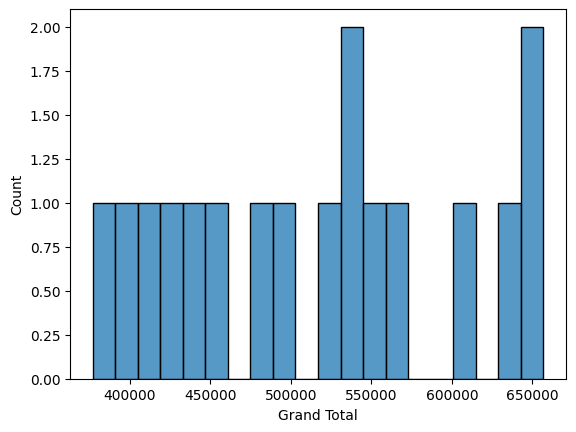

In [109]:
sns.histplot(data=national_time_series_table,x='Grand Total',bins=20)

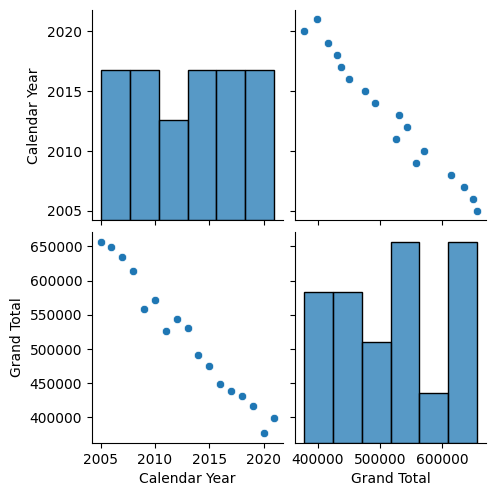

In [110]:
#sns.histplot(data=national_time_series_table,x='Grand Total',bins=20)
sns.pairplot(national_time_series_table)

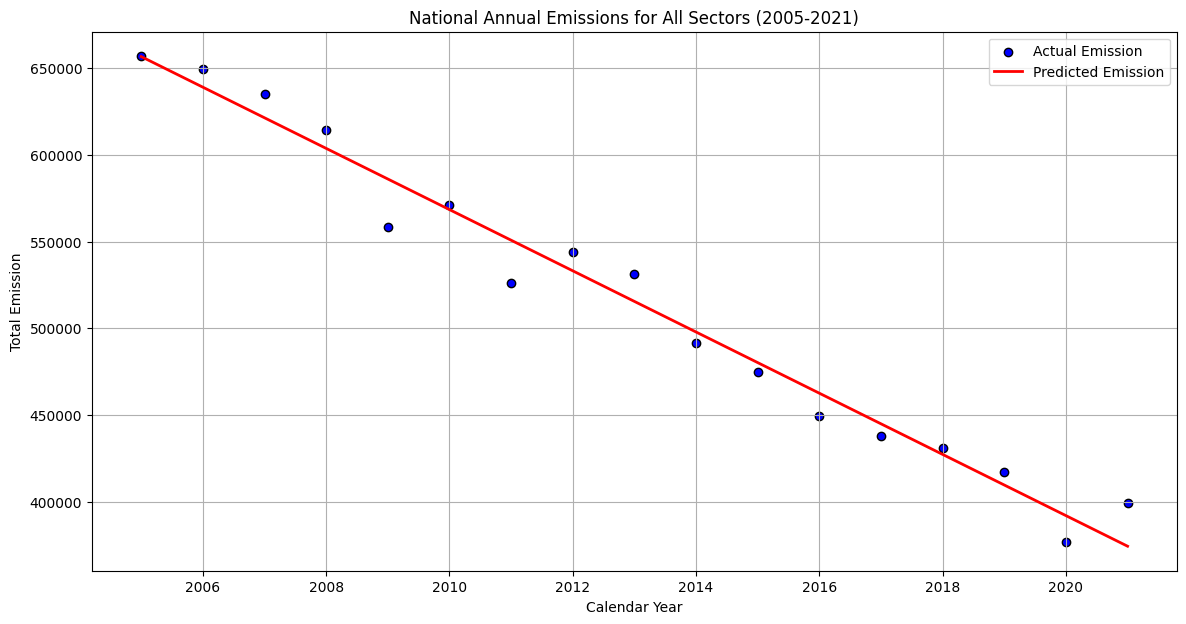

In [111]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize the linear regression model
model = LinearRegression()

# Reshape the data and fit the model
X = national_time_series_table['Calendar Year'].values.reshape(-1, 1)  # Independent variable
y = national_time_series_table['Grand Total'].values  # Dependent variable
model.fit(X, y)

# Make predictions
national_time_series_table['Predicted Emission'] = model.predict(X)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# R^2 score
r_squared = model.score(X, y)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', edgecolors='black', label='Actual Emission')
plt.plot(X, national_time_series_table['Predicted Emission'], color='red', linewidth=2, label='Predicted Emission')
plt.title('National Annual Emissions for All Sectors (2005-2021)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.legend()
plt.show()

In [112]:
(slope, intercept, r_squared)

(-17644.370521085082, 36033616.90970531, 0.9742324674401649)

In [113]:
import numpy as np

# Predicting the emissions for the year 2024
year_2024 = np.array([[2024]])
emissions_2024 = model.predict(year_2024)
emissions_2024[0]

321410.97502910346

In [114]:
# Predicting the emissions for the year 2022
year_2022 = np.array([[2022]])
emissions_forecast_2022 = model.predict(year_2022)

emissions_forecast_2022[0]

356699.71607127786

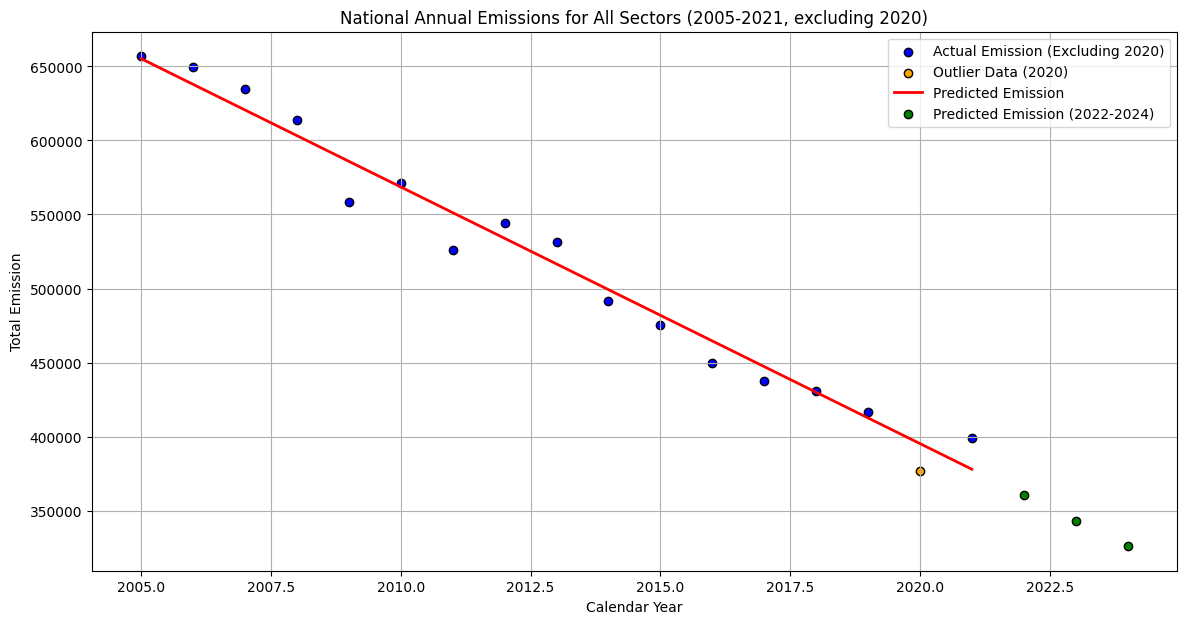

In [115]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Exclude the year 2020 from the dataset for training
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Initialize the linear regression model
model = LinearRegression()

# Reshape the data and fit the model
X_train = training_data['Calendar Year'].values.reshape(-1, 1)  # Independent variable (excluding 2020)
y_train = training_data['Grand Total'].values  # Dependent variable (excluding 2020)
model.fit(X_train, y_train)

# Make predictions for the entire dataset including 2020
X_full = national_time_series_table['Calendar Year'].values.reshape(-1, 1)
national_time_series_table['Predicted Emission'] = model.predict(X_full)

# Predictions for 2022 to 2024
future_years = np.array([[2022], [2023], [2024]])
future_predictions = model.predict(future_years)

# Coefficients and R^2 score
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X_train, y_train)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', edgecolors='black', label='Actual Emission (Excluding 2020)')
plt.scatter([2020], national_time_series_table[national_time_series_table['Calendar Year'] == 2020]['Grand Total'], color='orange', edgecolors='black', label='Outlier Data (2020)')
plt.plot(X_full, national_time_series_table['Predicted Emission'], color='red', linewidth=2, label='Predicted Emission')
plt.scatter(future_years, future_predictions, color='green', edgecolors='black', label='Predicted Emission (2022-2024)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.legend()
plt.show()

In [116]:
# Extracting the predicted emissions for 2022, 2023, and 2024
predicted_2022 = future_predictions[0]
predicted_2023 = future_predictions[1]
predicted_2024 = future_predictions[2]

# Printing the predicted emissions
print(f"Predicted Emissions for 2022: {predicted_2022}")
print(f"Predicted Emissions for 2023: {predicted_2023}")
print(f"Predicted Emissions for 2024: {predicted_2024}")

Predicted Emissions for 2022: 360642.15265548974
Predicted Emissions for 2023: 343314.9896756634
Predicted Emissions for 2024: 325987.82669582963


In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating MSE, MAE, and R^2 score using the training data (excluding 2020)
mse = mean_squared_error(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")

Mean Squared Error (MSE): 192430790.51199067
Mean Absolute Error (MAE): 11517.010197188152
R-squared (R²) Score: 0.9719953551351923


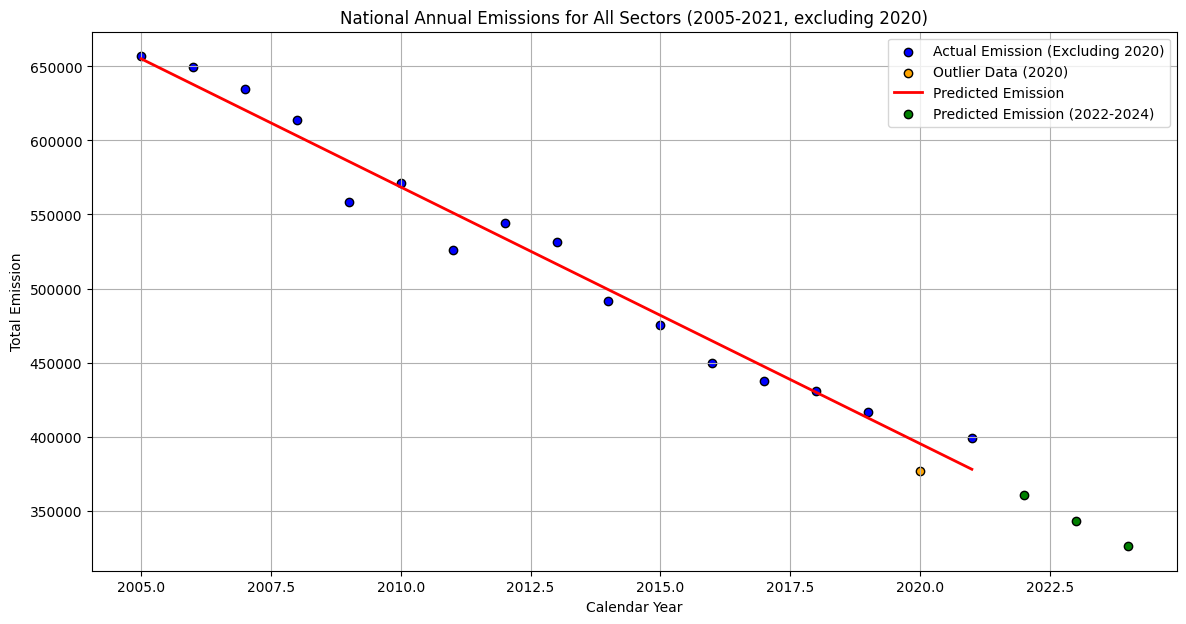

In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Exclude the year 2020 from the dataset for training
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Reshape the data
X_train = training_data['Calendar Year'].values.reshape(-1, 1)  # Independent variable (excluding 2020)
y_train = training_data['Grand Total'].values  # Dependent variable (excluding 2020)

# It's important to scale features when using SGD
pipeline = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Train the SGD model
sgd_model = pipeline.fit(X_train, y_train)

# Make predictions for the entire dataset including 2020
X_full = national_time_series_table['Calendar Year'].values.reshape(-1, 1)
national_time_series_table['Predicted Emission'] = sgd_model.predict(X_full)

# Predictions for 2022 to 2024
future_years = np.array([[2022], [2023], [2024]])
future_predictions = sgd_model.predict(future_years)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', edgecolors='black', label='Actual Emission (Excluding 2020)')
plt.scatter([2020], national_time_series_table[national_time_series_table['Calendar Year'] == 2020]['Grand Total'], color='orange', edgecolors='black', label='Outlier Data (2020)')
plt.plot(X_full, national_time_series_table['Predicted Emission'], color='red', linewidth=2, label='Predicted Emission')
plt.scatter(future_years, future_predictions, color='green', edgecolors='black', label='Predicted Emission (2022-2024)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating the metrics
mse = mean_squared_error(y_train, sgd_model.predict(X_train))
mae = mean_absolute_error(y_train, sgd_model.predict(X_train))
r2 = r2_score(y_train, sgd_model.predict(X_train))

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")

Mean Squared Error (MSE): 192433591.45364097
Mean Absolute Error (MAE): 11532.656708044713
R-squared (R²) Score: 0.9719949475113604


In [120]:
pip install statsmodels

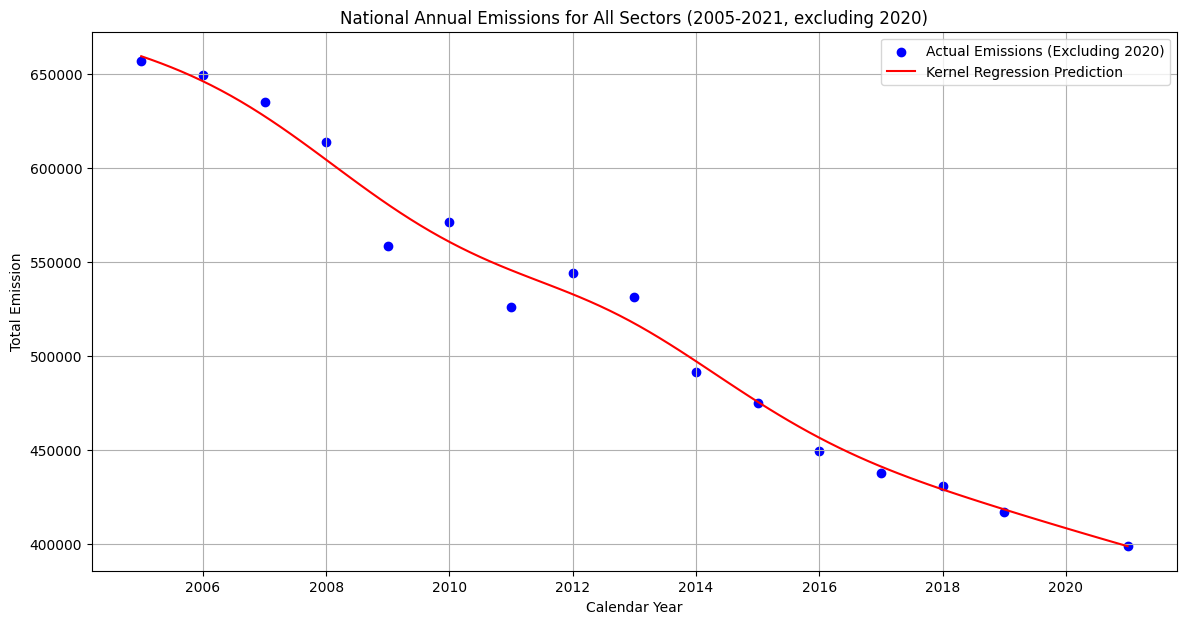

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg


# considering using the data excluding the outlier year 2020
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Prepare the data
X_train = training_data['Calendar Year'].values
y_train = training_data['Grand Total'].values

# Kernel Regression
kr = KernelReg(endog=y_train, exog=X_train, var_type='c')  # 'c' for continuous
X_predict = np.linspace(X_train.min(), X_train.max(), 100)  # Range of years for prediction
y_kr, y_std = kr.fit(X_predict)

# Plotting the actual data and the kernel regression prediction
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_predict, y_kr, color='red', label='Kernel Regression Prediction')
#plt.fill_between(X_predict, y_kr - y_std, y_kr + y_std, color='red', alpha=0.2, label='Prediction Standard Error')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()

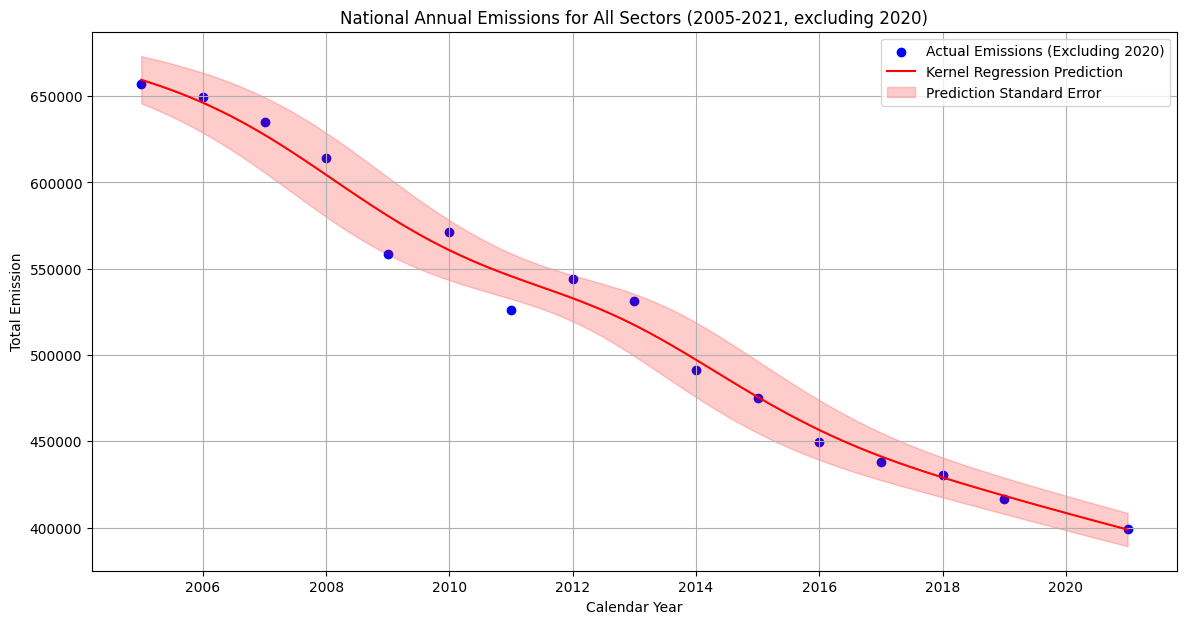

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg

# Considering using the data excluding the outlier year 2020
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Prepare the data
X_train = training_data['Calendar Year'].values
y_train = training_data['Grand Total'].values

# Kernel Regression
kr = KernelReg(endog=y_train, exog=X_train, var_type='c')  # 'c' for continuous
X_predict = np.linspace(X_train.min(), X_train.max(), 100)  # Range of years for prediction
y_kr, y_std = kr.fit(X_predict)

# Ensure y_kr and y_std are 1-dimensional
y_kr = np.squeeze(y_kr)
y_std = np.squeeze(y_std)

# Plotting the actual data and the kernel regression prediction
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_predict, y_kr, color='red', label='Kernel Regression Prediction')
plt.fill_between(X_predict, y_kr - y_std, y_kr + y_std, color='red', alpha=0.2, label='Prediction Standard Error')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on the training data
y_pred_train, _ = kr.fit(X_train)

# Calculating MSE and MAE
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 98854665.3250708
Mean Absolute Error (MAE): 7560.483432559919


In [124]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a range of bandwidths to test
bandwidths = np.linspace(0.1, 2, 20)

# Best bandwidth and score initialization
best_bandwidth = None
best_score = float('inf')

# K-Fold for cross-validation
kf = KFold(n_splits=5)

for bandwidth in bandwidths:
    mse_scores = []
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

        # Kernel Regression with the current bandwidth
        kr = KernelReg(endog=y_train_kf, exog=X_train_kf, var_type='c', bw=[bandwidth])
        y_pred_kf, _ = kr.fit(X_test_kf)

        # Calculate MSE for this fold
        mse = mean_squared_error(y_test_kf, y_pred_kf)
        mse_scores.append(mse)

    # Average MSE score for this bandwidth
    avg_mse = np.mean(mse_scores)
    if avg_mse < best_score:
        best_score = avg_mse
        best_bandwidth = bandwidth

# Best bandwidth
print(f"Best Bandwidth: {best_bandwidth}")

Best Bandwidth: 2.0


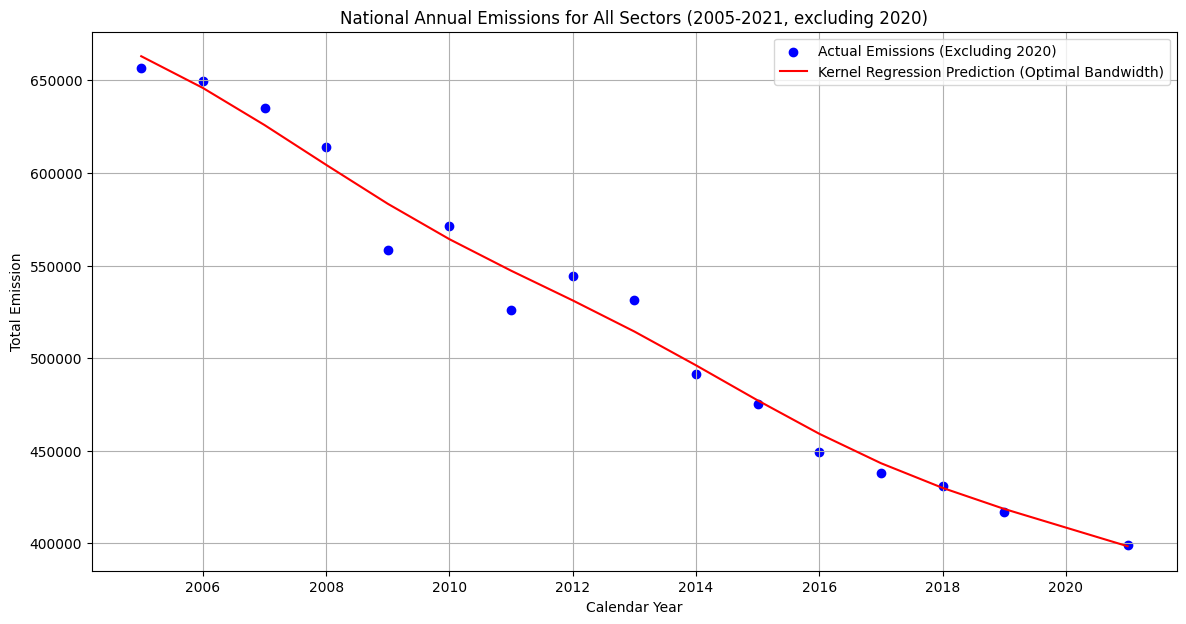

In [125]:
# Fitting the Kernel Regression model with the best bandwidth
kr_optimal = KernelReg(endog=y_train, exog=X_train, var_type='c', bw=[best_bandwidth])
y_pred_optimal, _ = kr_optimal.fit(X_train)

# Plotting
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_train, y_pred_optimal, color='red', label='Kernel Regression Prediction (Optimal Bandwidth)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Making predictions on the training data using the optimal bandwidth model
y_pred_optimal, _ = kr_optimal.fit(X_train)

# Calculating MSE and MAE
mse_optimal = mean_squared_error(y_train, y_pred_optimal)
mae_optimal = mean_absolute_error(y_train, y_pred_optimal)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_optimal}")
print(f"Mean Absolute Error (MAE): {mae_optimal}")

Mean Squared Error (MSE): 122452257.76925173
Mean Absolute Error (MAE): 8541.347118299647


Mean Squared Error (MSE): 122454007.79715747
Mean Absolute Error (MAE): 8541.433550188427


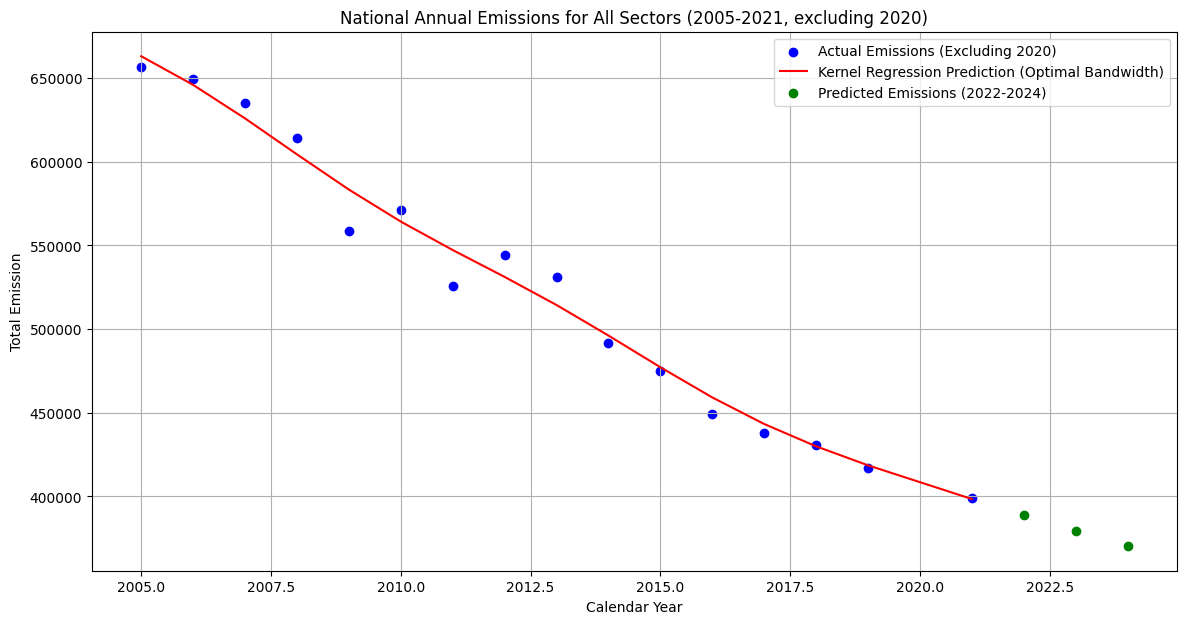

Predicted Emissions for 2022: 388856.1049887401
Predicted Emissions for 2023: 379455.74041452317
Predicted Emissions for 2024: 370225.2050343967


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Creating a sample DataFrame based on the data
data = {
    'Calendar Year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021],
    'Grand Total': [
        656867, 649603, 634904, 614046, 558455, 571129, 525842, 544172, 531229, 491490, 475077, 449383, 437824, 430745, 416856, 399046
    ]
}
national_time_series_table = pd.DataFrame(data)

# Exclude the year 2020 from the dataset for training
training_data = national_time_series_table

# Prepare the data
X_train = training_data['Calendar Year'].values
y_train = training_data['Grand Total'].values

# Best bandwidth (as obtained from previous grid search)
best_bandwidth = 2.0

# Kernel Regression with the optimal bandwidth
kr_optimal = KernelReg(endog=y_train, exog=X_train, var_type='c', bw=[best_bandwidth])
y_pred_optimal, _ = kr_optimal.fit(X_train)

# Calculating MSE and MAE
mse_optimal = mean_squared_error(y_train, y_pred_optimal)
mae_optimal = mean_absolute_error(y_train, y_pred_optimal)

# Predicting emissions for 2022, 2023, and 2024
future_years = np.array([2022, 2023, 2024]).reshape(-1, 1)
future_predictions, _ = kr_optimal.fit(future_years)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_optimal}")
print(f"Mean Absolute Error (MAE): {mae_optimal}")

# Plotting the actual data, kernel regression prediction, and future predictions
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_train, y_pred_optimal, color='red', label='Kernel Regression Prediction (Optimal Bandwidth)')
plt.scatter(future_years, future_predictions, color='green', marker='o', label='Predicted Emissions (2022-2024)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()

# Print predicted emissions for 2022, 2023, and 2024
for year, prediction in zip(range(2022, 2025), future_predictions):
    print(f"Predicted Emissions for {year}: {prediction}")

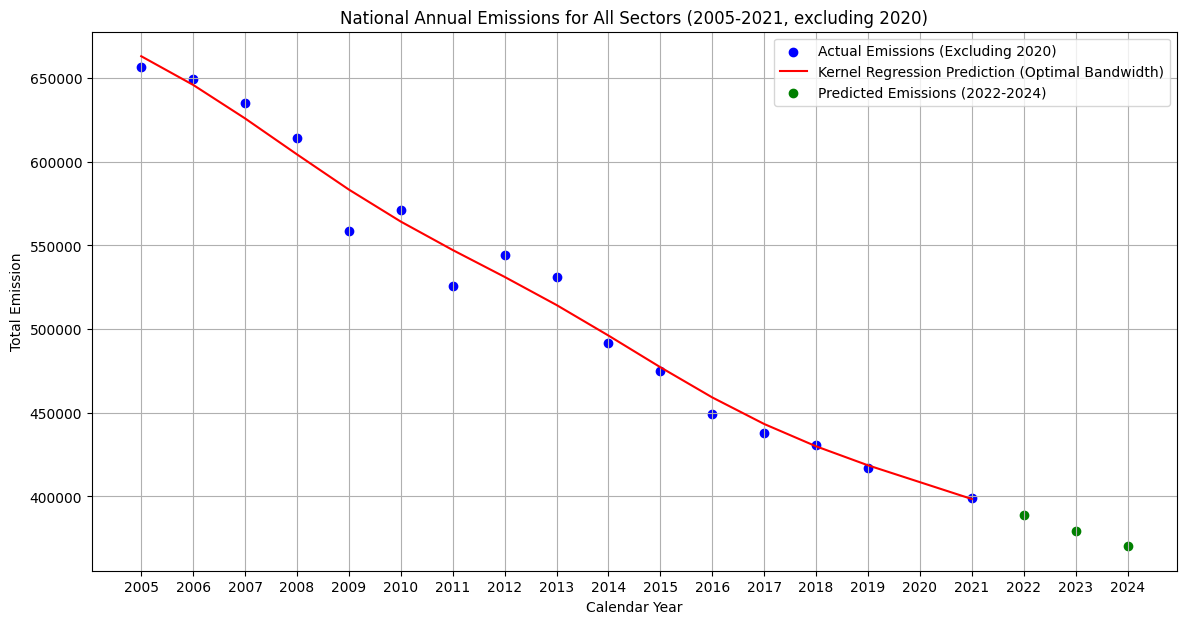

Predicted Emissions for 2022: 388856.1049887401
Predicted Emissions for 2023: 379455.74041452317
Predicted Emissions for 2024: 370225.2050343967


In [128]:
# Plotting the actual data, kernel regression prediction, and future predictions
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_train, y_pred_optimal, color='red', label='Kernel Regression Prediction (Optimal Bandwidth)')
plt.scatter(future_years, future_predictions, color='green', marker='o', label='Predicted Emissions (2022-2024)')

# Adjust x-axis to show each year
plt.xticks(np.arange(min(X_train), max(future_years) + 1, 1.0))

plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()

# Print predicted emissions for 2022, 2023, and 2024
for year, prediction in zip(range(2022, 2025), future_predictions):
    print(f"Predicted Emissions for {year}: {prediction}")

<h1>ARIMA</h1>

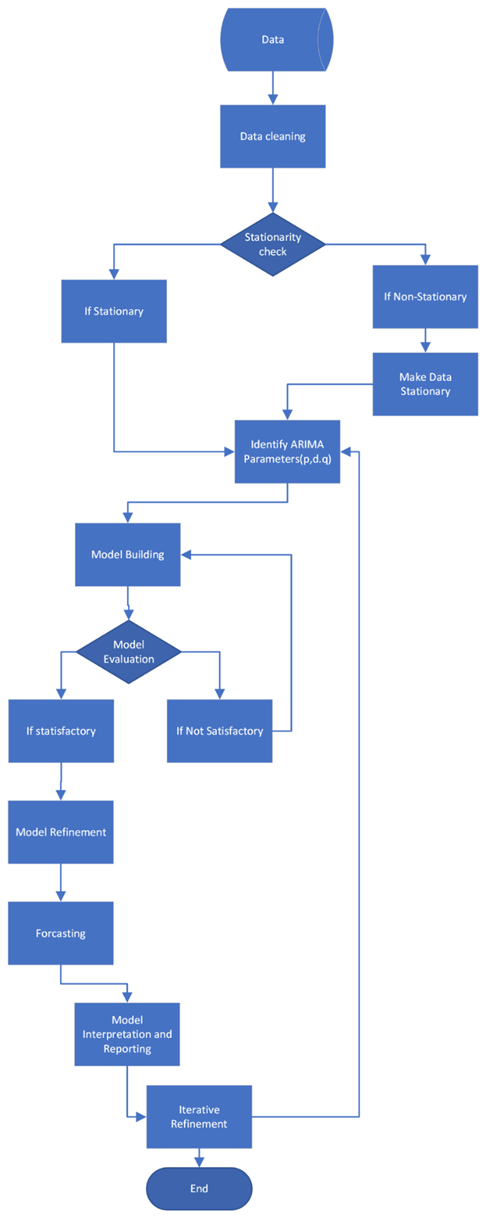

In [129]:
# 1. Data Preparation
import pandas as pd

url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
data_1_1_cleaned = pd.read_excel(url, sheet_name='1_1', skiprows=4)


In [130]:
# Filter the data for the "West Midlands" Region/Country
data_1_1_cleaned = data_1_1_cleaned[data_1_1_cleaned['Region/Country'] == 'West Midlands']
# Filter out rows where "Second Tier Authority" ends with "Total"
data_1_1_cleaned = data_1_1_cleaned[~data_1_1_cleaned['Second Tier Authority'].str.endswith("Total")]

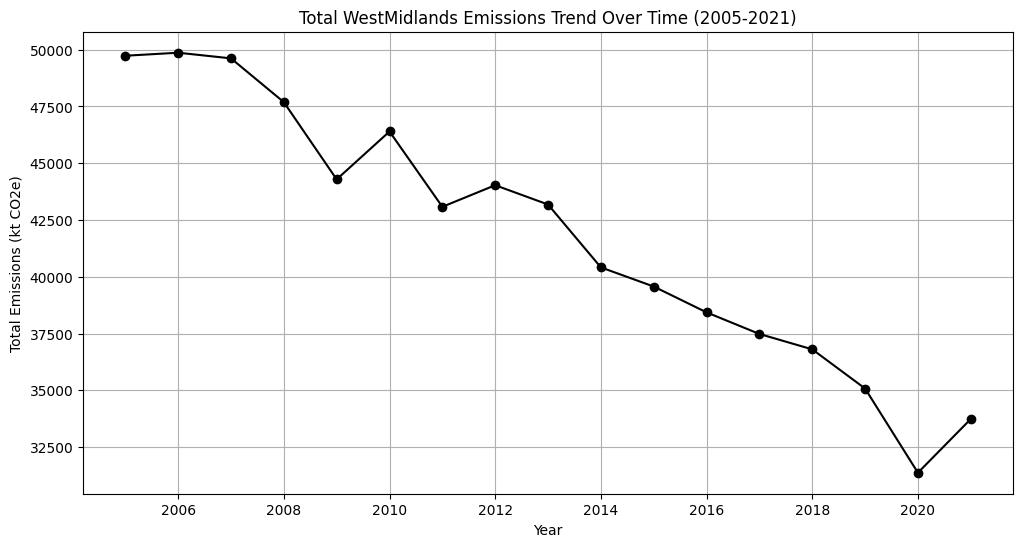

Calendar Year
2005    49732.222417
2006    49865.040184
2007    49616.825647
2008    47689.374420
2009    44287.997799
2010    46396.818960
2011    43080.033683
2012    44031.880064
2013    43181.893928
2014    40413.744458
2015    39570.616279
2016    38433.656517
2017    37482.255734
2018    36805.003905
2019    35080.103036
2020    31372.640144
2021    33736.855308
Name: Grand Total, dtype: float64

In [131]:
import matplotlib.pyplot as plt

# Group by 'Calendar Year' and sum the 'Grand Total' column to get total emissions for each year
yearly_emissions = data_1_1_cleaned.groupby('Calendar Year')['Grand Total'].sum()

yearly_emissions_ = pd.DataFrame(yearly_emissions)

# Plotting the trend over time
plt.figure(figsize=(12, 6))
yearly_emissions.plot(marker='o', linestyle='-', color='black')
plt.title('Total WestMidlands Emissions Trend Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()
yearly_emissions

In [132]:
from statsmodels.tsa.stattools import adfuller

#Augmented Dickey-Fuller test is used to test for the stationarity of a time series
adf_test = adfuller(yearly_emissions_['Grand Total'])
adf_test_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [133]:
# Adding critical values
for key, value in adf_test[4].items():
    adf_test_output[f'Critical Value ({key})'] = value

In [134]:
adf_test_output

Test Statistic                  1.644176
p-value                         0.997984
#Lags Used                      6.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64

p-value = 0.997984
Given the p-value is larger than 0.05, it suggest non-stationary data hence an attempt to difference the data

because p-value is greater than 0.05 this indicated that its non-stationary hence differencing is required

In [135]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Differencing the data to make it stationary
df_diff = yearly_emissions_['Grand Total'].diff().dropna()

adf_test_diff = adfuller(df_diff)
adf_test_diff_output = pd.Series(adf_test_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

adf_test_diff_output

Test Statistic                 -5.102136
p-value                         0.000014
#Lags Used                      1.000000
Number of Observations Used    14.000000
dtype: float64

Now p-value 0.000014 is acceptable.
That suggest (d=1)

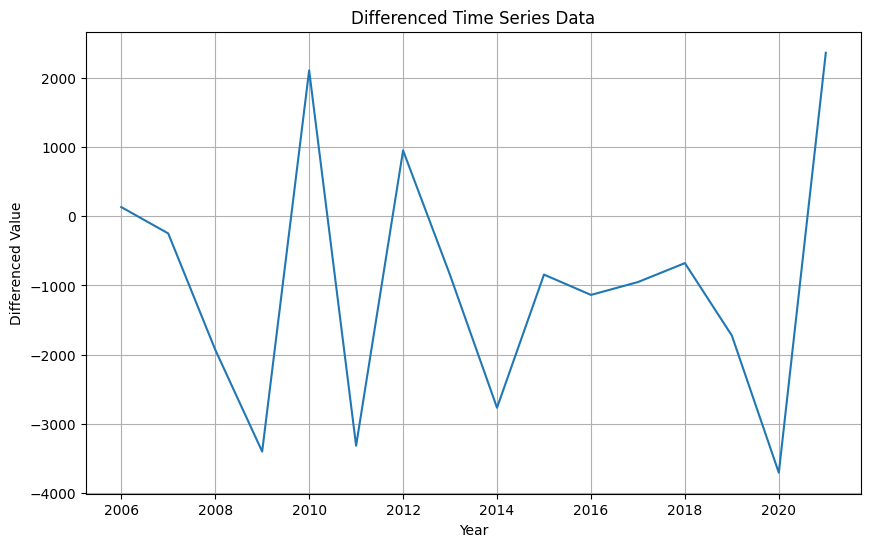

In [136]:
# Plotting the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df_diff)
plt.title('Differenced Time Series Data')
plt.xlabel('Year')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.show()

For the AR and MA(p and q)

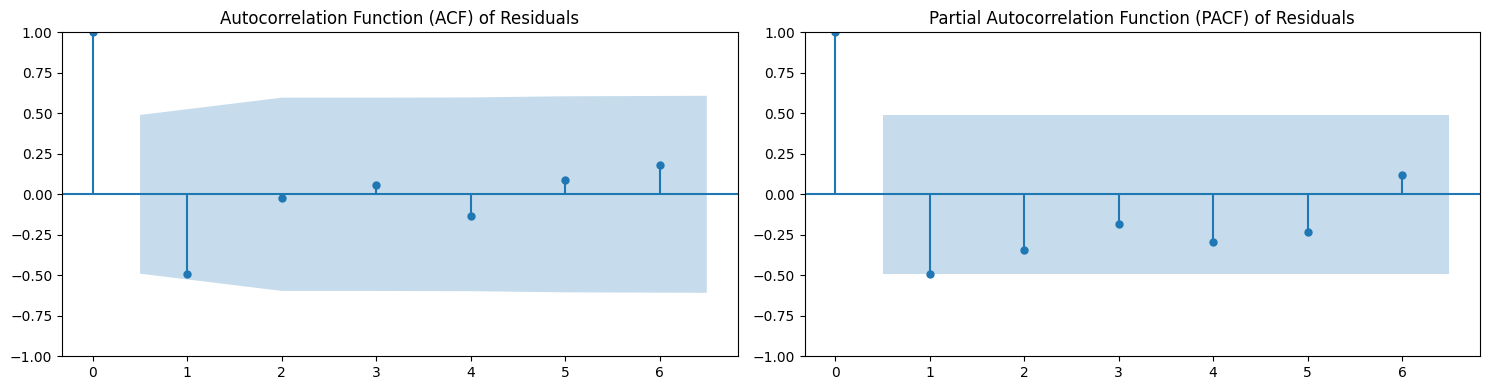

In [137]:
 #ACF and PACF of residuals with fewer lags
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ACF plot
plot_acf(df_diff, ax=ax[0], lags=6)
ax[0].set_title('Autocorrelation Function (ACF) of Residuals')

# PACF plot
plot_pacf(df_diff, ax=ax[1], lags=6)
ax[1].set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()

Differencing happen once (d=1), Picking p = 1 and q = 1 from the above plot

In [138]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Filter out the specific warning message
warnings.simplefilter("ignore", category=Warning)


# Fitting the ARIMA model with the determined parameters (p=1, d=1, q=1)
model = ARIMA(yearly_emissions_['Grand Total'], order=(1, 1, 1))
model_fit = model.fit()

# Summarizing the model output
model_summary = model_fit.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Grand Total   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -142.429
Date:                Tue, 06 Feb 2024   AIC                            290.858
Time:                        22:03:27   BIC                            293.175
Sample:                             0   HQIC                           290.976
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9270      0.047     19.674      0.000       0.835       1.019
ma.L1         -0.9999      0.460     -2.174      0.030      -1.902      -0.098
sigma2      3.132e+06   1.47e-07   2.14e+13      0.000    3.13e+06    3.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.08   Prob(JB):                         0.79
Heteroskedasticity (H):               1.06   Skew:                             0.15
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.19e+28. Standard errors may be unstable.
"""

In [139]:
# Forecasting future values using the ARIMA(1,1,1) model
forecast_periods = 5  # forecasting for next 5 years

# Forecasting future values
forecast = model_fit.forecast(steps=forecast_periods)
print(forecast)

17    33459.620002
18    33202.613189
19    32964.358894
20    32743.488839
21    32538.734582
Name: predicted_mean, dtype: float64


In [140]:
# iterating over the ARIMA model
fitted_values = model_fit.predict(start=1, end=len(yearly_emissions_['Grand Total']))

# Printing the fitted values
print(fitted_values)

1     48344.756406
2     48521.854537
3     48329.290745
4     46521.264575
5     43296.417748
6     45347.749297
7     42204.603475
8     43140.477064
9     42353.687898
10    39733.880016
11    38947.878181
12    37880.404265
13    36988.257415
14    36355.859160
15    34725.826942
16    31209.360027
17    33459.620002
Name: predicted_mean, dtype: float64


In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Actual values from 2006 to 2021
actual_values = [49865.040184, 49616.825647, 47689.374420, 44287.997799, 46396.818960,
                 43080.033683, 44031.880064, 43181.893928, 40413.744458, 39570.616279,
                 38433.656517, 37482.255734, 36805.003905, 35080.103036, 31372.640144,
                 33736.855308]

# Fitted values from your model for the same years
fitted_values = [48344.756378, 48521.854516, 48329.290731, 46521.264576, 43296.417769,
                 45347.749311, 42204.603509, 43140.477094, 42353.687935, 39733.880070,
                 38947.878241, 37880.404331, 36988.257487, 36355.859235, 34725.827027,
                 31209.360134]

mse = mean_squared_error(actual_values, fitted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, fitted_values)
r2 = r2_score(actual_values, fitted_values)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 3156817.9134824006
RMSE: 1776.7436262675606
MAE: 1442.5323537499994
R2 Score: 0.8933601637161586


<h1>Model Calibration</h1>

<h1>LSTM</h1>


In [142]:
# 1. Data Preparation
import pandas as pd

url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
data_1_1_cleaned = pd.read_excel(url, sheet_name='1_1', skiprows=4)

In [143]:
# Filter the data for the "West Midlands" Region/Country
data_1_1_cleaned = data_1_1_cleaned[data_1_1_cleaned['Region/Country'] == 'West Midlands']
# Filter out rows where "Second Tier Authority" ends with "Total"
data_1_1_cleaned = data_1_1_cleaned[~data_1_1_cleaned['Second Tier Authority'].str.endswith("Total")]


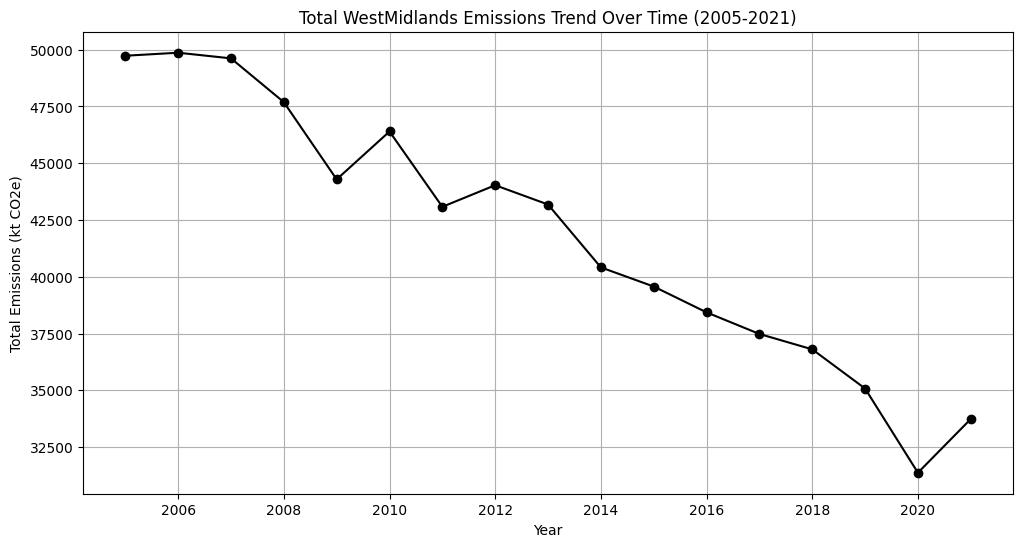

Calendar Year
2005    49732.222417
2006    49865.040184
2007    49616.825647
2008    47689.374420
2009    44287.997799
2010    46396.818960
2011    43080.033683
2012    44031.880064
2013    43181.893928
2014    40413.744458
2015    39570.616279
2016    38433.656517
2017    37482.255734
2018    36805.003905
2019    35080.103036
2020    31372.640144
2021    33736.855308
Name: Grand Total, dtype: float64

In [144]:
import matplotlib.pyplot as plt

# Group by 'Calendar Year' and sum the 'Grand Total' column to get total emissions for each year
yearly_emissions = data_1_1_cleaned.groupby('Calendar Year')['Grand Total'].sum()

yearly_emissions_ = pd.DataFrame(yearly_emissions)

# Plotting the trend over time
plt.figure(figsize=(12, 6))
yearly_emissions.plot(marker='o', linestyle='-', color='black')
plt.title('Total WestMidlands Emissions Trend Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()
yearly_emissions

In [145]:
pip install tensorflow

In [146]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert the Series to a DataFrame
yearly_emissions_df = yearly_emissions.to_frame()

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_emissions = scaler.fit_transform(yearly_emissions_df)

# Spliting the data into training and testing sets
train_size = int(len(scaled_emissions) * 0.67)
test_size = len(scaled_emissions) - train_size
train, test = scaled_emissions[0:train_size,:], scaled_emissions[train_size:len(scaled_emissions),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#def create_dataset(dataset, look_back=1):
#    dataX, dataY = [], []
#    for i in range(len(dataset)-look_back):
#        a = dataset[i:(i+look_back), 0]
#        dataX.append(a)
#        dataY.append(dataset[i + look_back, 0])
#    return np.array(dataX), np.array(dataY)

#def create_dataset(dataset, look_back=1):
#    dataX, dataY = [], []
#    for i in range(len(dataset)-look_back):
#        a = dataset[i:(i+look_back), 0]
#        dataX.append(a)
#        dataY.append(dataset[i + look_back])
#    return np.array(dataX), np.array(dataY)



# Reshape the data into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_data=(testX, testY))

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
#trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#testY = scaler.inverse_transform(testY)

#testY = testY.reshape(-1, 1)  # Reshape testY to 2D
#testY = scaler.inverse_transform(testY)

# Calculate root mean squared error
trainScore = np.sqrt(np.mean((trainPredict[:,0] - trainY[0]) ** 2))
testScore = np.sqrt(np.mean((testPredict[:,0] - testY[0]) ** 2))

print('Train Score: %.2f RMSE' % trainScore)
print('Test Score: %.2f RMSE' % testScore)

Epoch 1/100
9/9 - 6s - loss: 0.5360 - val_loss: 0.0473 - 6s/epoch - 642ms/step
Epoch 2/100
9/9 - 0s - loss: 0.5087 - val_loss: 0.0417 - 134ms/epoch - 15ms/step
Epoch 3/100
9/9 - 0s - loss: 0.4803 - val_loss: 0.0368 - 159ms/epoch - 18ms/step
Epoch 4/100
9/9 - 0s - loss: 0.4521 - val_loss: 0.0323 - 169ms/epoch - 19ms/step
Epoch 5/100
9/9 - 0s - loss: 0.4259 - val_loss: 0.0282 - 136ms/epoch - 15ms/step
Epoch 6/100
9/9 - 0s - loss: 0.4005 - val_loss: 0.0246 - 100ms/epoch - 11ms/step
Epoch 7/100
9/9 - 0s - loss: 0.3751 - val_loss: 0.0214 - 237ms/epoch - 26ms/step
Epoch 8/100
9/9 - 0s - loss: 0.3498 - val_loss: 0.0189 - 255ms/epoch - 28ms/step
Epoch 9/100
9/9 - 0s - loss: 0.3251 - val_loss: 0.0169 - 225ms/epoch - 25ms/step
Epoch 10/100
9/9 - 0s - loss: 0.3019 - val_loss: 0.0154 - 186ms/epoch - 21ms/step
Epoch 11/100
9/9 - 0s - loss: 0.2779 - val_loss: 0.0144 - 113ms/epoch - 13ms/step
Epoch 12/100
9/9 - 0s - loss: 0.2564 - val_loss: 0.0140 - 226ms/epoch - 25ms/step
Epoch 13/100
9/9 - 0s - los

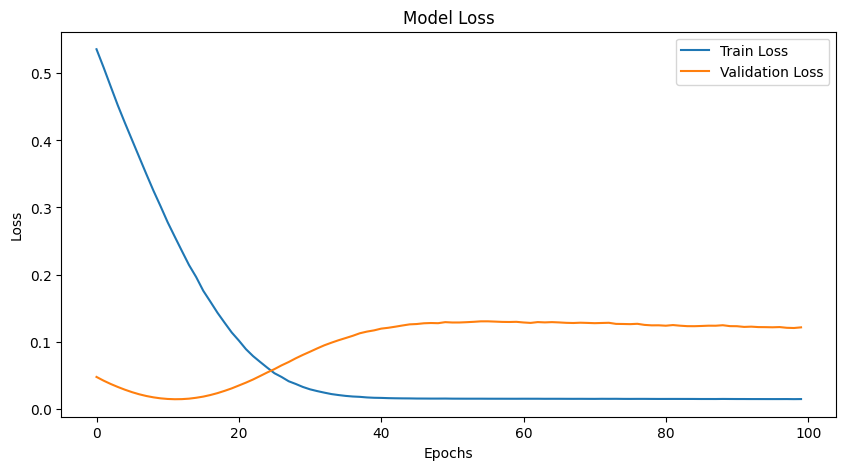

In [147]:
# Plot the training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

<h1>Regression Analysis</h1>

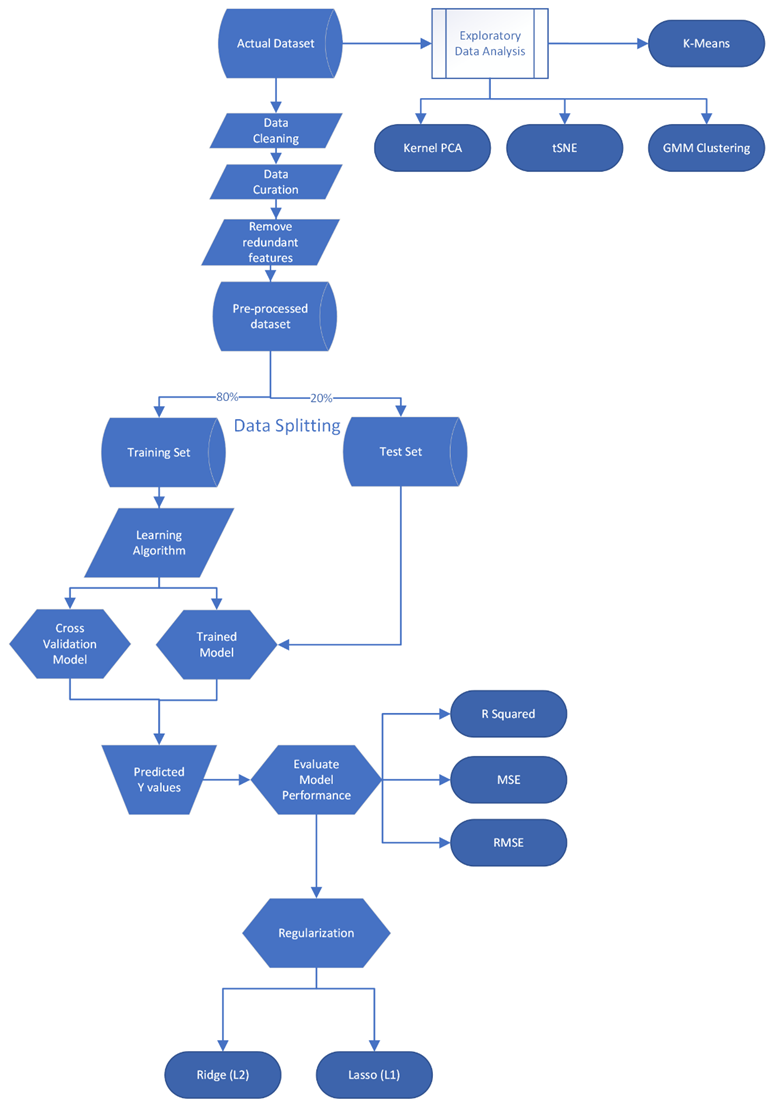

<h1>K-Means</h1>

- Understanding Cluster
- History and Intuition of K-Means
- Mathematical Theory of K-Means
- Implementation Of K-Means
- Limitations of K-Means

<p><b>Clustering</b> is a technique for grouping a set of objects in such a way that similiar objects fall in the same group.</p>

<p>Cluster Analysis refers to a family of algorithms and tasks rather than one specific algorithm.</p>

<p> Clustering uses unlabeled data and looks for similarities between groups(Clusters) in order to attempt to segment the data into separate clusters </p>



In [148]:
#Considering the dataset and features to understand the Clusters each feature belongs to...
west_midlands_local_authority_emissions


Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [149]:
west_midlands_local_authority_emissions.index

Index(['Birmingham', 'Bromsgrove', 'Cannock Chase', 'Coventry', 'Dudley',
       'East Staffordshire', 'Herefordshire, County of', 'Lichfield',
       'Malvern Hills', 'Newcastle-under-Lyme', 'North Warwickshire',
       'Nuneaton and Bedworth', 'Redditch', 'Rugby', 'Sandwell', 'Shropshire',
       'Solihull', 'South Staffordshire', 'Stafford',
       'Staffordshire Moorlands', 'Stoke-on-Trent', 'Stratford-on-Avon',
       'Tamworth', 'Telford and Wrekin', 'Walsall', 'Warwick', 'Wolverhampton',
       'Worcester', 'Wychavon', 'Wyre Forest', 'Total'],
      dtype='object', name='Local Authority')

In [150]:
west_midlands_local_authority_emissions.columns

Int64Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='Calendar Year')

In [151]:
west_midlands_local_authority_emissions.shape


(31, 17)

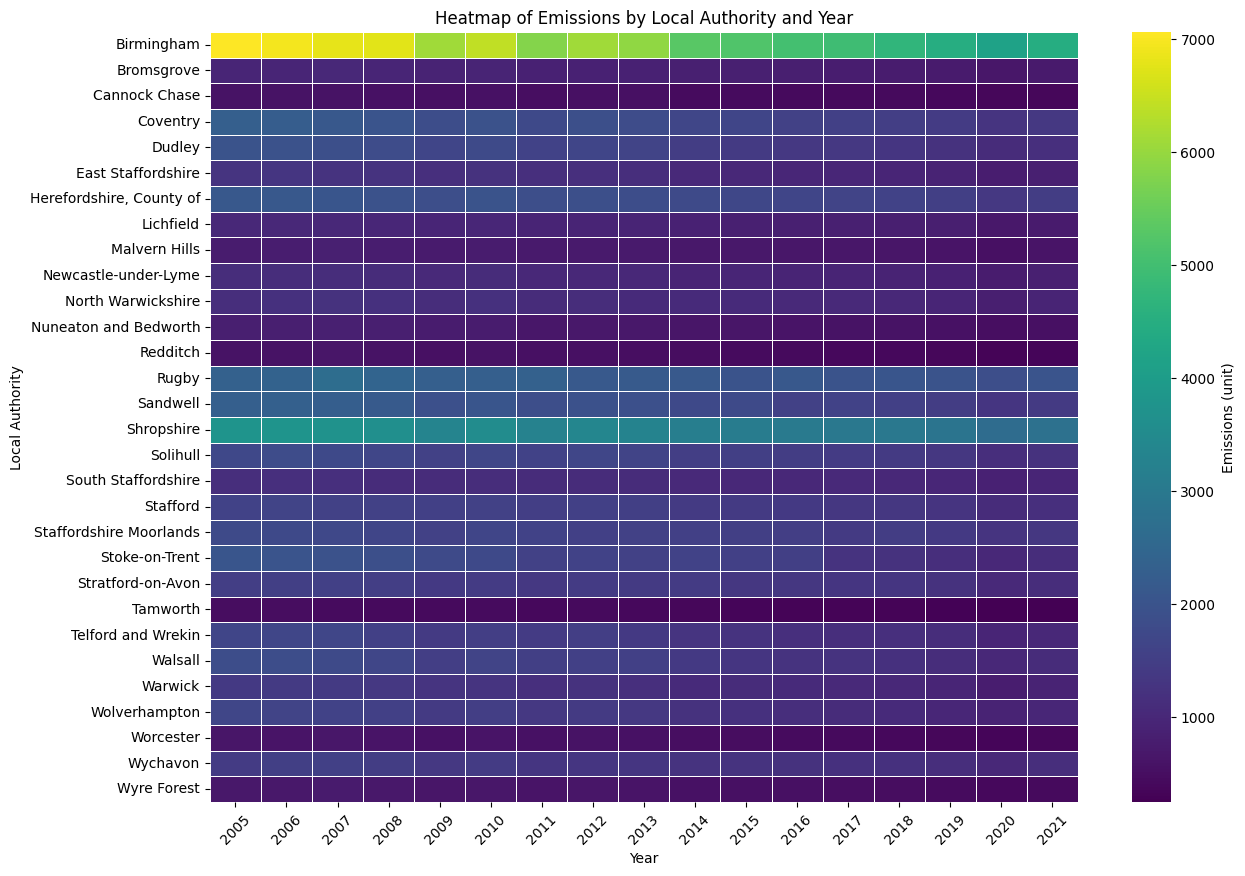

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = west_midlands_local_authority_emissions.drop('Total')

plt.figure(figsize=(14, 10))
sns.heatmap(data=heatmap_data, cmap='viridis', annot=False, fmt='.1f',
            linewidths=.5, cbar_kws={'label': 'Emissions (unit)'})

plt.title('Heatmap of Emissions by Local Authority and Year')
plt.xlabel('Year')
plt.ylabel('Local Authority')
plt.xticks(rotation=45)
plt.show()


In [153]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data = west_midlands_local_authority_emissions.drop('Total')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [154]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])


In [155]:
pca.components_

array([[ 0.24192287,  0.24223511,  0.24255641,  0.24253435,  0.2427949 ,
         0.24279934,  0.24297813,  0.24273366,  0.24292687,  0.2429049 ,
         0.24289228,  0.24270512,  0.24273703,  0.24222308,  0.2420564 ,
         0.24205745,  0.24204334],
       [-0.37627222, -0.32392438, -0.20941655, -0.25328571, -0.15938166,
        -0.1853121 , -0.03843648, -0.16302679, -0.11623624,  0.05613084,
         0.03268356,  0.17266696,  0.18846076,  0.3249652 ,  0.36153544,
         0.34600303,  0.34437717]])

In [156]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=data.columns)

In [157]:
df_comp

Calendar Year      2005      2006      2007      2008      2009      2010  \
PC1            0.241923  0.242235  0.242556  0.242534  0.242795  0.242799   
PC2           -0.376272 -0.323924 -0.209417 -0.253286 -0.159382 -0.185312   

Calendar Year      2011      2012      2013      2014      2015      2016  \
PC1            0.242978  0.242734  0.242927  0.242905  0.242892  0.242705   
PC2           -0.038436 -0.163027 -0.116236  0.056131  0.032684  0.172667   

Calendar Year      2017      2018      2019      2020      2021  
PC1            0.242737  0.242223  0.242056  0.242057  0.242043  
PC2            0.188461  0.324965  0.361535  0.346003  0.344377

<Axes: xlabel='Calendar Year'>

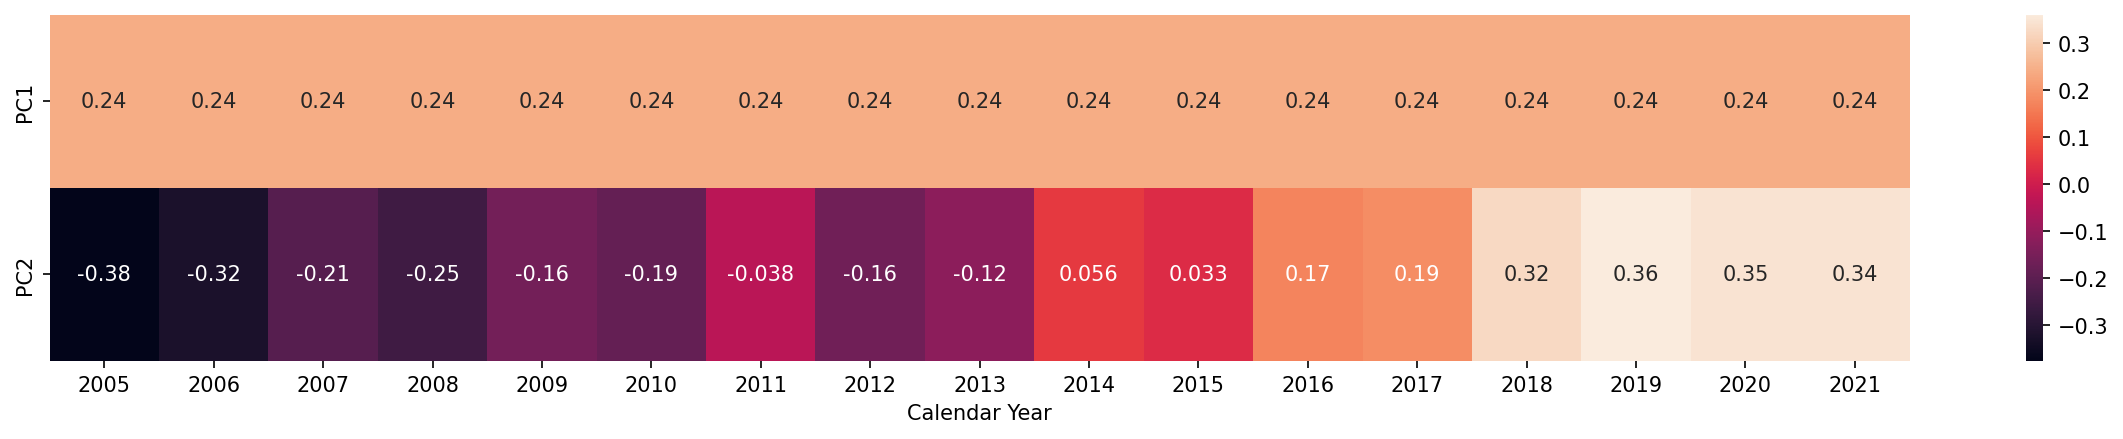

In [158]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp, annot=True)

In [159]:
pca.explained_variance_ratio_

array([0.99531019, 0.00374062])

In [160]:
np.sum(pca.explained_variance_ratio_)

0.9990508134631346

In [161]:
pca_17 = PCA(n_components=17)

In [162]:
pca_17.fit(scaled_data)

PCA(n_components=17)

In [163]:
pca_17.explained_variance_ratio_

array([9.95310194e-01, 3.74061947e-03, 3.17158012e-04, 2.51064771e-04,
       1.27220624e-04, 7.54477610e-05, 5.93953518e-05, 3.11035852e-05,
       2.94116835e-05, 2.13034261e-05, 1.18730680e-05, 9.32542644e-06,
       7.22035956e-06, 3.65188699e-06, 2.73950349e-06, 1.27063766e-06,
       1.00044040e-06])

In [164]:
np.sum(pca_17.explained_variance_ratio_)

1.0

In [165]:
explained_variance = []
for n in range(1,17):
  pca = PCA(n_components=n)
  pca.fit(scaled_data)

  explained_variance.append(np.sum(pca.explained_variance_ratio_))

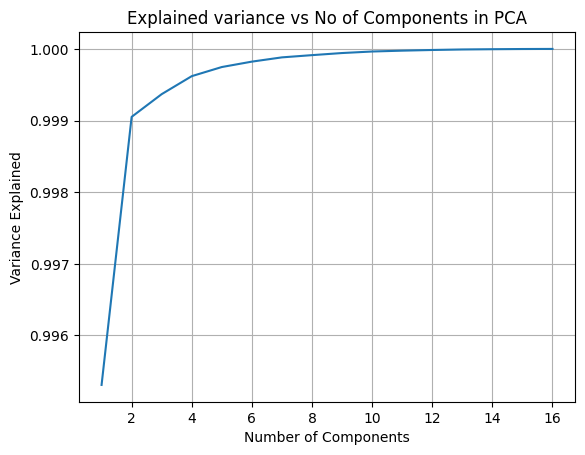

In [166]:
plt.plot(range(1,17),explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Explained variance vs No of Components in PCA')
plt.grid()

Chosing number of components as n=2 in PCA, that explains 99% of the variance in the Westmidlands emission dataset over years 2005 to 2021 Data. Now the choice of K in Kmeans can be computed with and elbow method as depicted below

In [167]:
ssd = []

for k in range(2,17):

  model = KMeans(n_clusters=k)
  model.fit(scaled_data)

  ssd.append(model.inertia_)

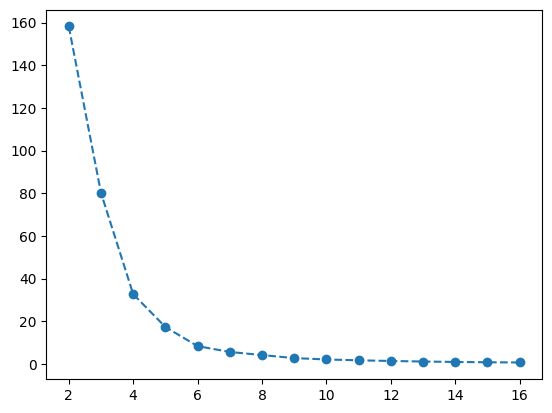

In [168]:
plt.plot(range(2,17),ssd,'o--')

In [169]:
pd.Series(ssd)

0     158.218204
1      80.245355
2      32.734399
3      17.332454
4       8.368756
5       5.645997
6       4.177670
7       2.758563
8       2.124109
9       1.713596
10      1.412313
11      1.157563
12      0.959050
13      0.810142
14      0.708771
dtype: float64

In [170]:
pd.Series(ssd).diff()

0           NaN
1    -77.972848
2    -47.510956
3    -15.401946
4     -8.963697
5     -2.722759
6     -1.468327
7     -1.419107
8     -0.634454
9     -0.410514
10    -0.301282
11    -0.254751
12    -0.198513
13    -0.148908
14    -0.101371
dtype: float64

In [171]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)


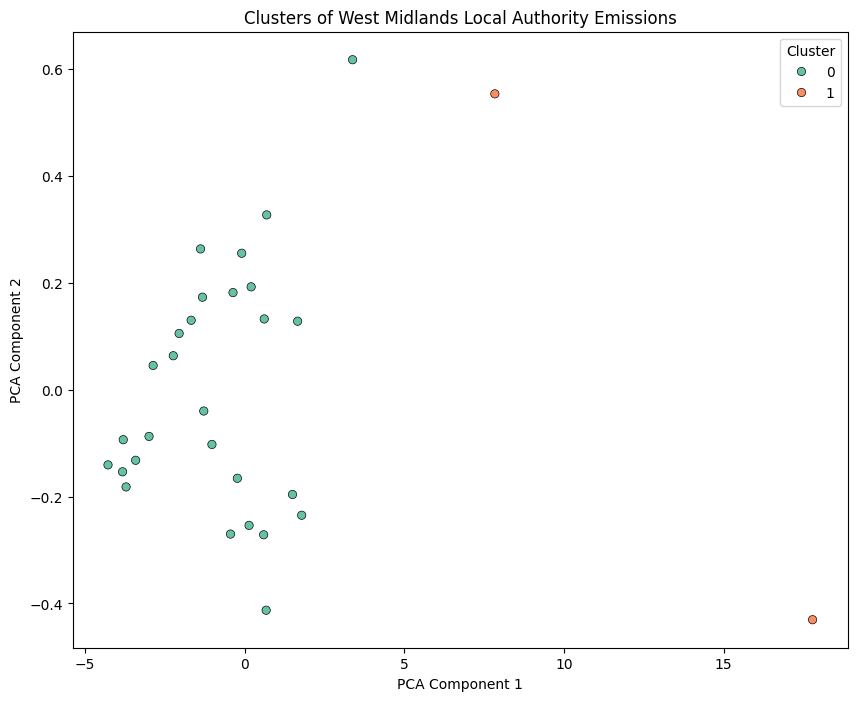

In [172]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette=sns.color_palette('Set2', k), edgecolor='black', legend='full')
plt.title('Clusters of West Midlands Local Authority Emissions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [173]:
pca_df

PCA1      PCA2  Cluster
0   17.786187 -0.430495        1
1   -2.230576  0.063494        0
2   -3.796888 -0.093612        0
3    1.501872 -0.196131        0
4    0.599197 -0.271551        0
5   -1.275962 -0.039956        0
6    1.663698  0.128103        0
7   -2.046951  0.105178        0
8   -2.861057  0.045305        0
9   -1.670643  0.129865        0
10  -1.315545  0.173014        0
11  -2.989549 -0.087504        0
12  -3.818086 -0.153666        0
13   3.383787  0.617419        0
14   1.789300 -0.235004        0
15   7.838606  0.553582        1
16   0.618554  0.132314        0
17  -1.377578  0.263389        0
18   0.207888  0.192432        0
19   0.694828  0.327032        0
20   0.677390 -0.412755        0
21  -0.088226  0.255260        0
22  -4.274275 -0.140746        0
23  -0.223230 -0.165821        0
24   0.143084 -0.253963        0
25  -1.019951 -0.102506        0
26  -0.438239 -0.270226        0
27  -3.708532 -0.181989        0
28  -0.360075  0.181687        0
29  -3.409027 -0.132150        0

<p>- Unsupervised Learning Paradigm Shift:</p>
<ul>How are clusters assigned?</ul>
<ul>Are Cluster assignment accurate?</ul>

<p>Cluster assigment: In unsupervised learning, different approaches depending on the unsupervised learning algorithm used, determine how features are assigned to clusters. Different distance metrics are used (usually using Euclidean distance).</p>

<h1>Brief History</h1>
<p><b>Hugo Steinhaus</b> was the mathematician who began laying out the for groundwork for clustering methods. He introduced his algorithmic clustering approach in French paper “Sur la Division des Corps Matérielsen Parties” naming it bagging predictors</p>

<p>1957: <b>Stuart Lloyd</b> of Bell Labs developed the standard algorithmic technique for clustering related to K-Means.</p>

<p>1965: <b>Edward W. Forgy</b> published the clustering technique, thus both Lloyd and Forgy are credited with the development as well.</p>

<p>In 1967, <b>James MacQueen</b> introduced the term K-Means in his article “Some Methods for Classification and Analysis of MultivariateObservations” published by University of California.  This is the first publication to introduce the term 'K-Means' as a sequential clustering algorithm.
</p>

<h1>How it works</h1>
As the name implies K-Means is an unsupervised learning algorithm used for partitioning a dataset into K distinct, non-overlapping clusters.

<p>The algorithm begins by accepting a <b>K</b> value(how many clusters to create(k)).</p>
<p>A Random point is selected as the initial centroid for each cluster. For each data point the distance to centroids is computed for all clusters (usually using Euclidean distance) </p>
<p> Recalculating the centroids by taking the <b>mean</b> of all data points assigned to each <b>cluster</b>.</p>
<p>Iterating until the centroids no longer change significantly or a maximum number of iterations is reached.</p>

## Euclidean Distance:
   - Represents the **shortest straight-line distance** between two points in Euclidean space (flat space).
   - Formula: Distance = √((x₁ - x₂)² + (y₁ - y₂)² + (z₁ - z₂)² + ...)





##Mahalanobis Distance:





In [174]:
data

Calendar Year                    2005         2006         2007         2008  \
Local Authority                                                                
Birmingham                7059.334372  6952.112034  6800.522322  6744.677640   
Bromsgrove                 956.642291   966.027098  1014.325992   966.508457   
Cannock Chase              588.979929   597.874966   584.212829   554.965633   
Coventry                  2285.257172  2244.459643  2109.501041  2028.053404   
Dudley                    1983.590348  1972.154700  1888.505634  1818.345968   
East Staffordshire        1287.270750  1298.775799  1260.546128  1245.328814   
Herefordshire, County of  2091.684474  2090.207781  2038.853224  1975.986634   
Lichfield                 1004.513597  1022.789515  1013.242837   993.374843   
Malvern Hills              772.773159   799.621230   848.442583   797.397569   
Newcastle-under-Lyme      1121.822896  1113.654899  1107.267011  1087.895669   
North Warwickshire        1147.478903  1203.041332  1226.193958  1194.492043   
Nuneaton and Bedworth      813.097075   815.719471   861.239859   828.813779   
Redditch                   585.906245   591.548822   632.697674   593.920918   
Rugby                     2330.213067  2373.288078  2651.893434  2411.372020   
Sandwell                  2289.664199  2311.288395  2271.410144  2149.609456   
Shropshire                3788.039158  3772.811560  3701.754274  3605.369762   
Solihull                  1735.803608  1801.630633  1757.701820  1667.849693   
South Staffordshire       1142.941882  1174.670664  1167.283617  1104.231784   
Stafford                  1593.609395  1616.541260  1569.472252  1566.564484   
Staffordshire Moorlands   1776.923545  1766.082186  1742.557987  1656.608649   
Stoke-on-Trent            2041.728131  2025.362057  1977.856972  1900.940420   
Stratford-on-Avon         1501.480094  1513.735452  1541.393414  1488.757386   
Tamworth                   475.068557   474.697517   448.760723   436.457918   
Telford and Wrekin        1659.122170  1685.979582  1682.256128  1530.383297   
Walsall                   1841.638129  1829.666727  1772.033335  1673.938533   
Warwick                   1391.720595  1400.843990  1409.130871  1362.768363   
Wolverhampton             1677.179103  1629.700831  1587.437458  1536.582527   
Worcester                  643.542399   616.473972   657.726991   608.166828   
Wychavon                  1447.518551  1504.532587  1542.140801  1467.778761   
Wyre Forest                697.678624   699.747403   750.464334   692.233167   

Calendar Year                    2009         2010         2011         2012  \
Local Authority                                                                
Birmingham                6099.737055  6412.804284  5805.907414  6094.847957   
Bromsgrove                 915.239428   943.043254   865.875640   885.439318   
Cannock Chase              534.431424   565.871617   516.643905   523.651492   
Coventry                  1835.162506  1962.611578  1766.002096  1881.254900   
Dudley                    1657.763334  1778.665829  1603.028674  1645.915361   
East Staffordshire        1170.588639  1228.732489  1160.773439  1165.877455   
Herefordshire, County of  1872.500149  1994.484316  1849.438619  1892.331768   
Lichfield                  955.231477   981.016859   931.692962   938.137617   
Malvern Hills              757.938462   782.645008   723.285139   726.094378   
Newcastle-under-Lyme      1042.573930  1083.119199  1024.749999  1024.635624   
North Warwickshire        1121.940224  1191.290419  1085.180037  1110.955808   
Nuneaton and Bedworth      772.443801   765.017013   677.858160   704.027486   
Redditch                   533.689582   577.553981   522.724477   528.282173   
Rugby                     2278.320929  2283.729045  2334.076177  2124.141199   
Sandwell                  1915.683984  2035.995284  1862.670040  1942.089900   
Shropshire                3330.136985  3537.762726  3277.426402  3379.256702   

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Birmingham to Wyre Forest
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2005    30 non-null     float64
 1   2006    30 non-null     float64
 2   2007    30 non-null     float64
 3   2008    30 non-null     float64
 4   2009    30 non-null     float64
 5   2010    30 non-null     float64
 6   2011    30 non-null     float64
 7   2012    30 non-null     float64
 8   2013    30 non-null     float64
 9   2014    30 non-null     float64
 10  2015    30 non-null     float64
 11  2016    30 non-null     float64
 12  2017    30 non-null     float64
 13  2018    30 non-null     float64
 14  2019    30 non-null     float64
 15  2020    30 non-null     float64
 16  2021    30 non-null     float64
dtypes: float64(17)
memory usage: 4.2+ KB


In [176]:
data.describe()

Calendar Year         2005         2006         2007         2008  \
count            30.000000    30.000000    30.000000    30.000000   
mean           1657.740747  1662.168006  1653.894188  1589.645814   
std            1240.208721  1221.034690  1190.802690  1175.775511   
min             475.068557   474.697517   448.760723   436.457918   
25%             968.610118   980.217702  1013.513626   973.225054   
50%            1474.499323  1509.134020  1541.767107  1478.268074   
75%            1948.102293  1936.532707  1859.387560  1782.244109   
max            7059.334372  6952.112034  6800.522322  6744.677640   

Calendar Year         2009         2010         2011         2012  \
count            30.000000    30.000000    30.000000    30.000000   
mean           1476.266593  1546.560632  1436.001123  1467.729335   
std            1062.127968  1119.335080  1022.272648  1066.092646   
min             421.964679   440.200738   404.836659   414.618735   
25%             925.237440   952.536655   882.329971   898.613892   
50%            1377.118770  1431.302592  1326.858848  1355.865608   
75%            1634.686999  1744.064460  1599.371280  1630.556330   
max            6099.737055  6412.804284  5805.907414  6094.847957   

Calendar Year         2013         2014         2015         2016  \
count            30.000000    30.000000    30.000000    30.000000   
mean           1439.396464  1347.124815  1319.020543  1281.121884   
std            1039.119800   940.872541   923.447136   899.480444   
min             406.701043   363.694164   347.631884   326.917746   
25%             890.718600   854.890525   845.401627   833.628541   
50%            1339.410414  1246.352045  1222.620234  1148.058727   
75%            1609.066258  1533.243609  1523.848461  1491.582777   
max            5928.649539  5283.528982  5187.812112  5018.990855   

Calendar Year         2017         2018         2019         2020         2021  
count            30.000000    30.000000    30.000000    30.000000    30.000000  
mean           1249.408524  1226.833463  1169.336768  1045.754671  1124.561844  
std             884.293216   851.617706   819.079115   764.142236   815.048191  
min             317.951130   318.231567   290.820254   254.020488   268.838288  
25%             812.352503   783.638908   770.682643   664.206133   722.542881  
50%            1122.186942  1121.909180  1054.520022   935.111729   994.433394  
75%            1396.797949  1389.281089  1313.415451  1134.609414  1211.319798  
max            4952.980766  4694.297182  4500.378294  4177.186378  4480.654084

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [178]:
melted_data = data.melt(var_name='Year', value_name='Emissions')


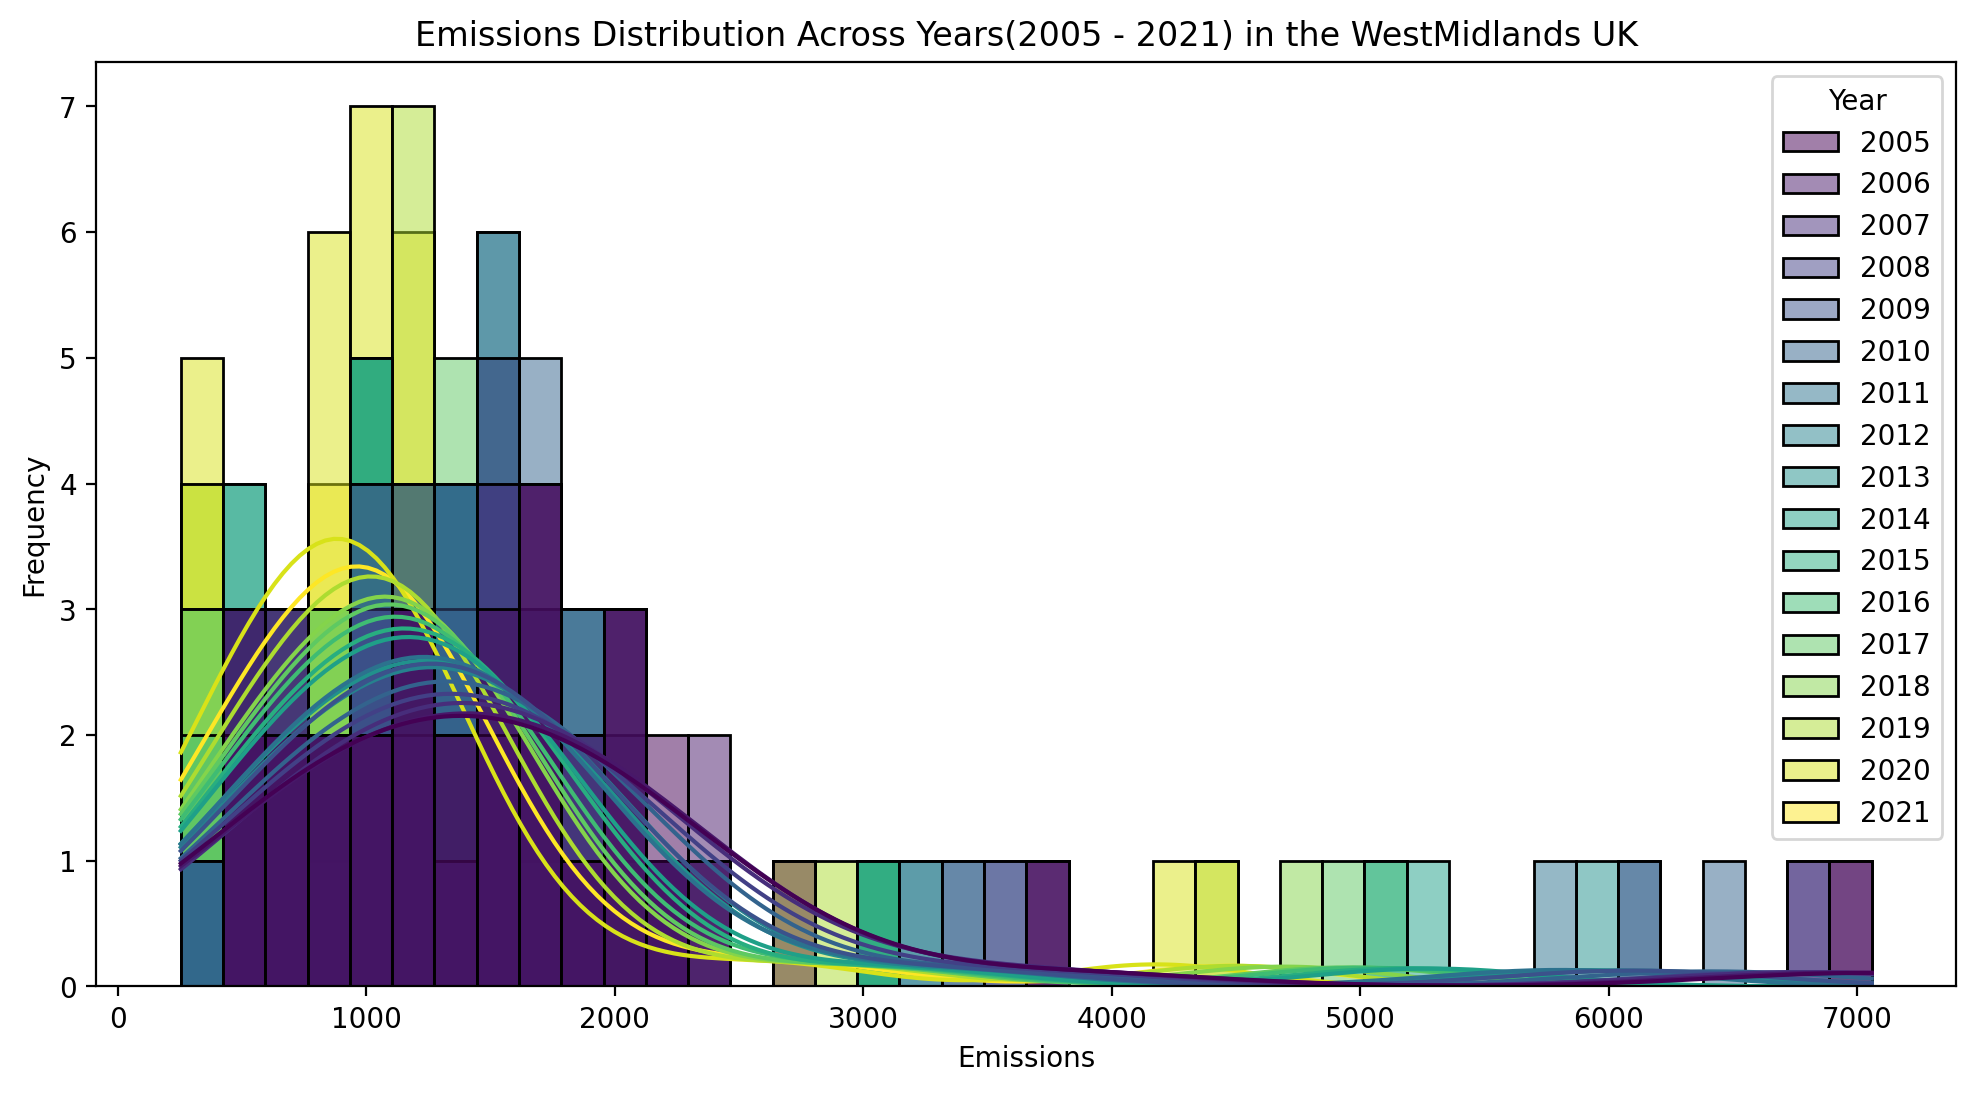

In [179]:
plt.figure(figsize=(12, 6), dpi=200)

sns.histplot(data=melted_data, x='Emissions', bins=40, kde=True, hue='Year', palette='viridis')


plt.title('Emissions Distribution Across Years(2005 - 2021) in the WestMidlands UK')
plt.xlabel('Emissions')
plt.ylabel('Frequency')
plt.show()


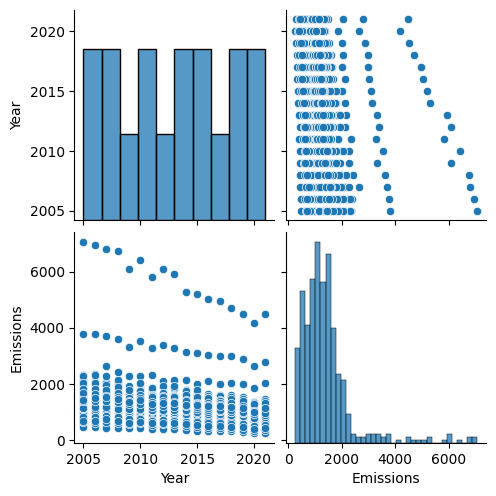

In [180]:
 sns.pairplot(melted_data)

In [181]:
X = pd.get_dummies(melted_data)

In [182]:
X

Year    Emissions
0    2005  7059.334372
1    2005   956.642291
2    2005   588.979929
3    2005  2285.257172
4    2005  1983.590348
..    ...          ...
505  2021   892.125608
506  2021   985.990590
507  2021   375.993686
508  2021  1148.046126
509  2021   436.541231

[510 rows x 2 columns]

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()

In [185]:
scaled_X = scaler.fit_transform(X)

In [186]:
from sklearn.cluster import KMeans

In [187]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

In [188]:
model = KMeans(n_clusters=2)
#model.fit_predict()
#model.predict
Cluster_labels = model.fit_predict(scaled_X)

In [189]:
Cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [190]:
X['Cluster'] = Cluster_labels

In [191]:
X.corr()

Year  Emissions   Cluster
Year       1.000000  -0.181965  0.843739
Emissions -0.181965   1.000000 -0.301351
Cluster    0.843739  -0.301351  1.000000

In [192]:
X.corr()['Cluster']

Year         0.843739
Emissions   -0.301351
Cluster      1.000000
Name: Cluster, dtype: float64

In [193]:
X.corr()['Cluster'].iloc[:-1]

Year         0.843739
Emissions   -0.301351
Name: Cluster, dtype: float64

<Axes: >

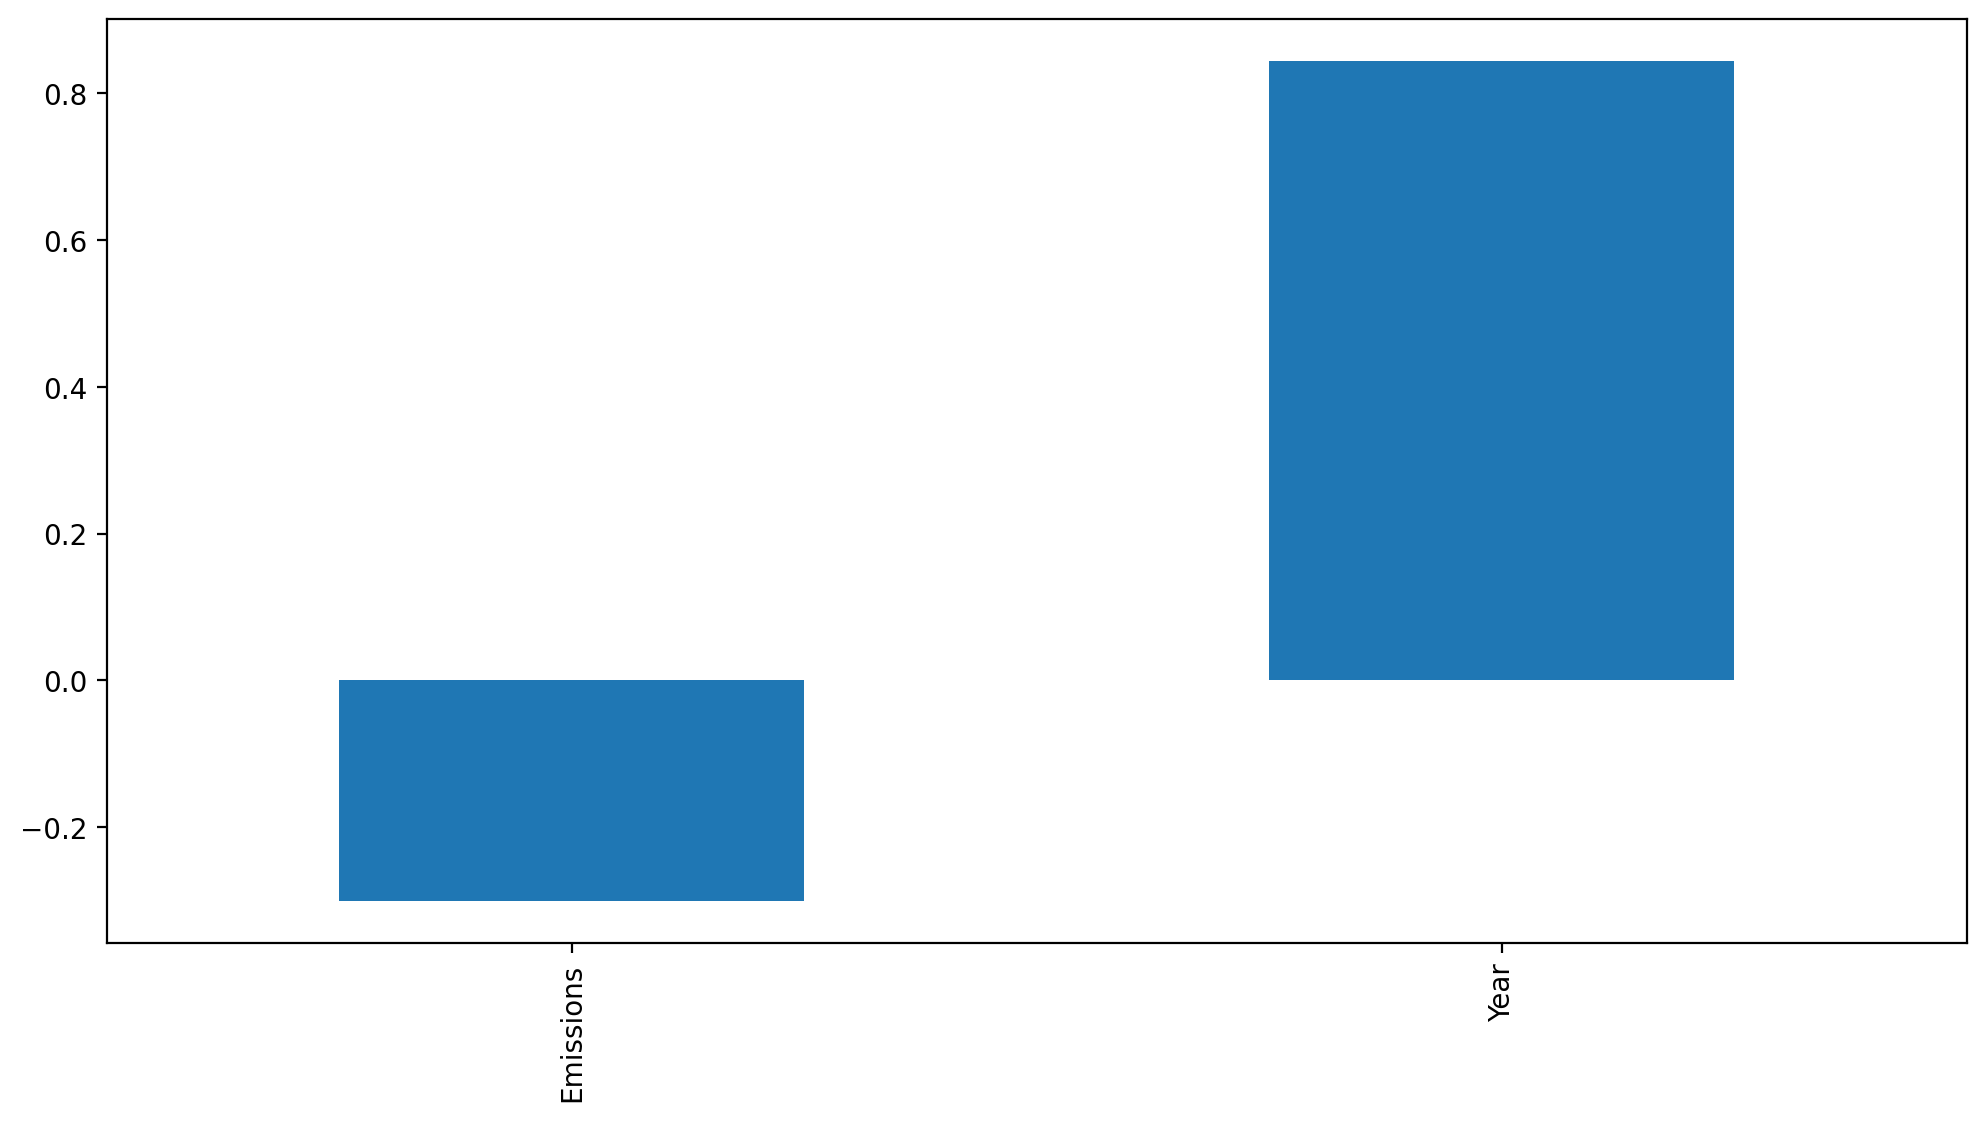

In [194]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

<p>Method of choosing the K-Value</p>
<ul>Elbow Method</ul>

In [195]:
ssd = []

for k in range(2,10):

  model = KMeans(n_clusters=k)
  model.fit(scaled_X)

  ssd.append(model.inertia_) #sum of square differences point -- cluster center

In [196]:
ssd

[610.6129745674853,
 314.23602757426147,
 246.37042024643546,
 197.78488686253888,
 162.5115441235755,
 140.80390071329333,
 121.26671374924578,
 102.4231942687156]

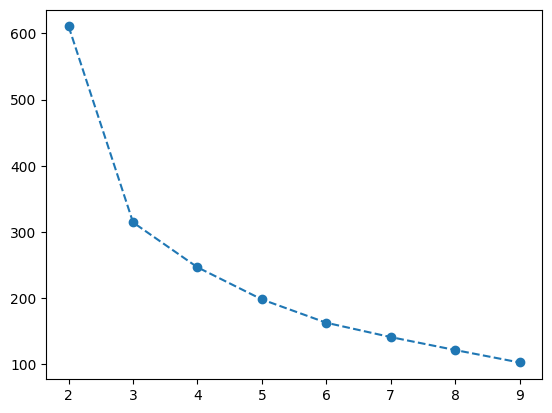

In [197]:
plt.plot(range(2,10),ssd,'o--')

In [198]:
pd.Series(ssd)

0    610.612975
1    314.236028
2    246.370420
3    197.784887
4    162.511544
5    140.803901
6    121.266714
7    102.423194
dtype: float64

In [199]:
pd.Series(ssd).diff()

0           NaN
1   -296.376947
2    -67.865607
3    -48.585533
4    -35.273343
5    -21.707643
6    -19.537187
7    -18.843519
dtype: float64

K at 4 is a good K from the ssd diff above

In [200]:

url = 'https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')

data_1_1_actual = data_1_1.iloc[4:]

data_1_1_actual.columns = data_1_1.iloc[3]

west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]

#columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions', 'Population ('000s, mid-year estimate)', 'Per Capita Emissions (tCO2e)','Area (km2)', 'Emissions per km2 (kt CO2e)']

columns_to_keep = ["Region/Country", "Second Tier Authority", "Local Authority", "Local Authority Code", "Calendar Year", "LULUCF Net Emissions", "Population ('000s, mid-year estimate)", "Per Capita Emissions (tCO2e)","Area (km2)", "Emissions per km2 (kt CO2e)"]

columns_to_keep.extend([col for col in west_midlands_data_filtered.columns if col.endswith("Total")])

west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

#west_midlands_filtered_columns.to_csv('west_midlands_filtered_columns.csv')
west_midlands_filtered_columns.columns


Index(['Region/Country', 'Second Tier Authority', 'Local Authority',
       'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions',
       'Population ('000s, mid-year estimate)', 'Per Capita Emissions (tCO2e)',
       'Area (km2)', 'Emissions per km2 (kt CO2e)', 'Industry Total',
       'Commercial Total', 'Public Sector Total', 'Domestic Total',
       'Transport Total', 'Agriculture Total', 'Waste Management Total',
       'Grand Total'],
      dtype='object', name=3)

In [201]:
west_midlands_filtered_columns_ = west_midlands_filtered_columns.drop('Grand Total', axis=1)


In [202]:
# Pivot table creation
west_midlands_filtered_columns_pivot = pd.pivot_table(
    west_midlands_filtered_columns_,
    values=[
        "Commercial Total", "Waste Management Total", "Agriculture Total",
        "Transport Total", "Domestic Total", "Public Sector Total",
        "Industry Total", "LULUCF Net Emissions","Emissions per km2 (kt CO2e)",
		"Population ('000s, mid-year estimate)", "Per Capita Emissions (tCO2e)",
       "Area (km2)"
    ],
    index=['Local Authority'],
    aggfunc=sum
)

In [203]:
west_midlands_filtered_columns_pivot

3                         Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                             
Birmingham                       232.234593   4552.4504      12852.635286   
Bromsgrove                       942.038895   3688.4628        801.268832   
Cannock Chase                    113.860612   1341.0025       1071.978144   
Coventry                         157.346755   1676.8630       3927.635477   
Dudley                            79.601540   1665.2928       2571.047917   
East Staffordshire              3138.978602   6629.7841       2369.959872   
Herefordshire, County of       10584.462434  37055.0598       1690.736774   
Lichfield                       1436.446885   5632.0048       1141.870438   
Malvern Hills                   2488.276312   9810.2070        528.639775   
Newcastle-under-Lyme            1766.182949   3586.2758       1183.790340   
North Warwickshire               937.036978   4832.4421       1477.771787   
Nuneaton and Bedworth            249.410476   1342.1568       1021.185881   
Redditch                         192.326022    922.2653        768.610160   
Rugby                           1524.918541   6010.4741       1696.243918   
Sandwell                          26.884298   1454.5013       3906.332361   
Shropshire                     19686.740481  54353.6886       3375.969744   
Solihull                         524.353869   3030.7957       4356.745689   
South Staffordshire             1721.561801   6924.4791        739.654438   
Stafford                        5010.253387  10168.9257       1585.847950   
Staffordshire Moorlands         4557.505236   9789.4466        791.038317   
Stoke-on-Trent                   263.529353   1588.6245       2675.094187   
Stratford-on-Avon               3413.366428  16623.7798       1973.501243   
Tamworth                          60.849074    524.4619        823.193275   
Telford and Wrekin              1370.588566   4935.3329       2107.332474   
Walsall                          134.144831   1767.5478       2290.415224   
Warwick                          762.090017   4808.9974       2429.173388   
Wolverhampton                     51.413959   1180.4205       2694.037858   
Worcester                         73.971086    565.7294       1086.861676   
Wychavon                        2498.614492  11280.2106       1577.894127   
Wyre Forest                      596.803813   3321.8646        975.997900   

3                         Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                         
Birmingham                  31681.462010                   359.214273   
Bromsgrove                   3457.285332                    67.256023   
Cannock Chase                3224.318889                   105.522908   
Coventry                     9506.371323                   303.260054   
Dudley                      10040.025758                   268.397698   
East Staffordshire           3790.455148                    47.514664   
Herefordshire, County of     6594.869230                    13.932655   
Lichfield                    3635.441997                    46.225527   
Malvern Hills                2861.291191                    20.871492   
Newcastle-under-Lyme         4160.337226                    79.759987   
North Warwickshire           2214.576263                    64.183807   
Nuneaton and Bedworth        3979.197206                   146.983629   
Redditch                     2565.510127                   152.543252   
Rugby                        3433.355172                   104.911959   
Sandwell                     9137.521205                   363.484249   
Shropshire                  10893.000843                    17.267731   
Solihull                     7352.614920                   146.505939   
South Staffordshire          3751.518023                    44.043755   
Stafford                     4613.544670                    40.807738   
St

In [204]:
pip install plotly

In [205]:
west_midlands_filtered_columns_pivot.columns

Index(['Agriculture Total', 'Area (km2)', 'Commercial Total', 'Domestic Total',
       'Emissions per km2 (kt CO2e)', 'Industry Total', 'LULUCF Net Emissions',
       'Per Capita Emissions (tCO2e)', 'Population ('000s, mid-year estimate)',
       'Public Sector Total', 'Transport Total', 'Waste Management Total'],
      dtype='object', name=3)

In [206]:
west_midlands_filtered_columns_pivot.index

Index(['Birmingham', 'Bromsgrove', 'Cannock Chase', 'Coventry', 'Dudley',
       'East Staffordshire', 'Herefordshire, County of', 'Lichfield',
       'Malvern Hills', 'Newcastle-under-Lyme', 'North Warwickshire',
       'Nuneaton and Bedworth', 'Redditch', 'Rugby', 'Sandwell', 'Shropshire',
       'Solihull', 'South Staffordshire', 'Stafford',
       'Staffordshire Moorlands', 'Stoke-on-Trent', 'Stratford-on-Avon',
       'Tamworth', 'Telford and Wrekin', 'Walsall', 'Warwick', 'Wolverhampton',
       'Worcester', 'Wychavon', 'Wyre Forest'],
      dtype='object', name='Local Authority')

In [207]:
X = west_midlands_filtered_columns_pivot

In [208]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [209]:
from sklearn.cluster import KMeans

sum_squared_distance = []
for k in range(2,30):
  model = KMeans(n_clusters=k)
  model.fit(scaled_X)

  sum_squared_distance.append(model.inertia_)


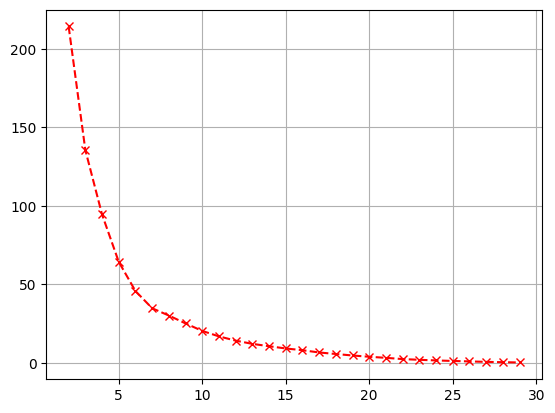

In [210]:
plt.plot(range(2,30),sum_squared_distance,'x--', color='red')
plt.grid(True)

<Axes: >

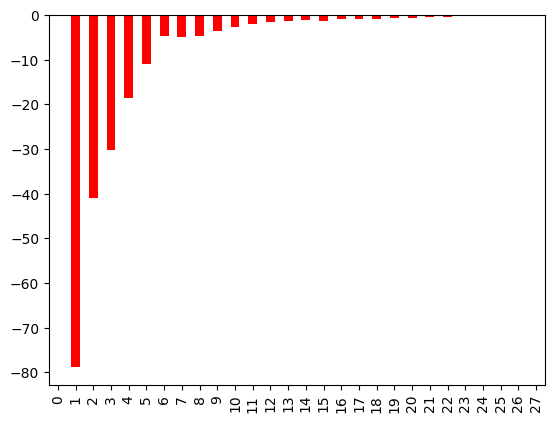

In [211]:
pd.Series(sum_squared_distance).diff().plot(kind='bar', color='red')

<h1><b>Choosing K=4</b></h1>

In [212]:
model = KMeans(n_clusters=4)
model.fit(scaled_X)

KMeans(n_clusters=4)

In [213]:
model.labels_

array([1, 2, 0, 0, 0, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2], dtype=int32)

In [214]:
X['K=4 Cluster Labels'] = model.labels_

In [215]:
X.corr()['K=4 Cluster Labels']

3
Agriculture Total                        0.613793
Area (km2)                               0.631144
Commercial Total                        -0.159130
Domestic Total                          -0.147387
Emissions per km2 (kt CO2e)             -0.810331
Industry Total                           0.100454
LULUCF Net Emissions                    -0.551308
Per Capita Emissions (tCO2e)             0.636166
Population ('000s, mid-year estimate)   -0.186053
Public Sector Total                     -0.130893
Transport Total                          0.244950
Waste Management Total                   0.076817
K=4 Cluster Labels                       1.000000
Name: K=4 Cluster Labels, dtype: float64

<Axes: xlabel='3'>

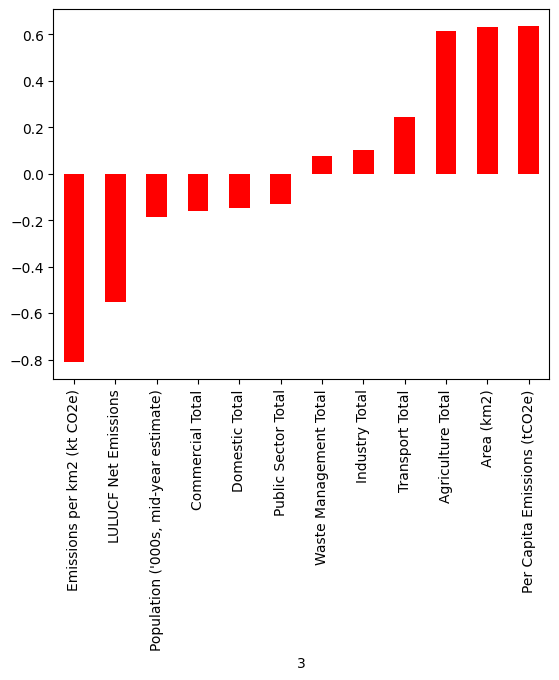

In [216]:
X.corr()['K=4 Cluster Labels'].iloc[:-1].sort_values().plot(kind='bar', color='red')

In [217]:
west_midlands_filtered_columns_pivot['K=4 Cluster Labels'] = model.labels_

In [218]:
west_midlands_filtered_columns_pivot

3                         Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                             
Birmingham                       232.234593   4552.4504      12852.635286   
Bromsgrove                       942.038895   3688.4628        801.268832   
Cannock Chase                    113.860612   1341.0025       1071.978144   
Coventry                         157.346755   1676.8630       3927.635477   
Dudley                            79.601540   1665.2928       2571.047917   
East Staffordshire              3138.978602   6629.7841       2369.959872   
Herefordshire, County of       10584.462434  37055.0598       1690.736774   
Lichfield                       1436.446885   5632.0048       1141.870438   
Malvern Hills                   2488.276312   9810.2070        528.639775   
Newcastle-under-Lyme            1766.182949   3586.2758       1183.790340   
North Warwickshire               937.036978   4832.4421       1477.771787   
Nuneaton and Bedworth            249.410476   1342.1568       1021.185881   
Redditch                         192.326022    922.2653        768.610160   
Rugby                           1524.918541   6010.4741       1696.243918   
Sandwell                          26.884298   1454.5013       3906.332361   
Shropshire                     19686.740481  54353.6886       3375.969744   
Solihull                         524.353869   3030.7957       4356.745689   
South Staffordshire             1721.561801   6924.4791        739.654438   
Stafford                        5010.253387  10168.9257       1585.847950   
Staffordshire Moorlands         4557.505236   9789.4466        791.038317   
Stoke-on-Trent                   263.529353   1588.6245       2675.094187   
Stratford-on-Avon               3413.366428  16623.7798       1973.501243   
Tamworth                          60.849074    524.4619        823.193275   
Telford and Wrekin              1370.588566   4935.3329       2107.332474   
Walsall                          134.144831   1767.5478       2290.415224   
Warwick                          762.090017   4808.9974       2429.173388   
Wolverhampton                     51.413959   1180.4205       2694.037858   
Worcester                         73.971086    565.7294       1086.861676   
Wychavon                        2498.614492  11280.2106       1577.894127   
Wyre Forest                      596.803813   3321.8646        975.997900   

3                         Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                         
Birmingham                  31681.462010                   359.214273   
Bromsgrove                   3457.285332                    67.256023   
Cannock Chase                3224.318889                   105.522908   
Coventry                     9506.371323                   303.260054   
Dudley                      10040.025758                   268.397698   
East Staffordshire           3790.455148                    47.514664   
Herefordshire, County of     6594.869230                    13.932655   
Lichfield                    3635.441997                    46.225527   
Malvern Hills                2861.291191                    20.871492   
Newcastle-under-Lyme         4160.337226                    79.759987   
North Warwickshire           2214.576263                    64.183807   
Nuneaton and Bedworth        3979.197206                   146.983629   
Redditch                     2565.510127                   152.543252   
Rugby                        3433.355172                   104.911959   
Sandwell                     9137.521205                   363.484249   
Shropshire                  10893.000843                    17.267731   
Solihull                     7352.614920                   146.505939   
South Staffordshire          3751.518023                    44.043755   
Stafford                     4613.544670                    40.807738   
St

In [219]:
west_midlands_filtered_columns_pivot

3                         Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                             
Birmingham                       232.234593   4552.4504      12852.635286   
Bromsgrove                       942.038895   3688.4628        801.268832   
Cannock Chase                    113.860612   1341.0025       1071.978144   
Coventry                         157.346755   1676.8630       3927.635477   
Dudley                            79.601540   1665.2928       2571.047917   
East Staffordshire              3138.978602   6629.7841       2369.959872   
Herefordshire, County of       10584.462434  37055.0598       1690.736774   
Lichfield                       1436.446885   5632.0048       1141.870438   
Malvern Hills                   2488.276312   9810.2070        528.639775   
Newcastle-under-Lyme            1766.182949   3586.2758       1183.790340   
North Warwickshire               937.036978   4832.4421       1477.771787   
Nuneaton and Bedworth            249.410476   1342.1568       1021.185881   
Redditch                         192.326022    922.2653        768.610160   
Rugby                           1524.918541   6010.4741       1696.243918   
Sandwell                          26.884298   1454.5013       3906.332361   
Shropshire                     19686.740481  54353.6886       3375.969744   
Solihull                         524.353869   3030.7957       4356.745689   
South Staffordshire             1721.561801   6924.4791        739.654438   
Stafford                        5010.253387  10168.9257       1585.847950   
Staffordshire Moorlands         4557.505236   9789.4466        791.038317   
Stoke-on-Trent                   263.529353   1588.6245       2675.094187   
Stratford-on-Avon               3413.366428  16623.7798       1973.501243   
Tamworth                          60.849074    524.4619        823.193275   
Telford and Wrekin              1370.588566   4935.3329       2107.332474   
Walsall                          134.144831   1767.5478       2290.415224   
Warwick                          762.090017   4808.9974       2429.173388   
Wolverhampton                     51.413959   1180.4205       2694.037858   
Worcester                         73.971086    565.7294       1086.861676   
Wychavon                        2498.614492  11280.2106       1577.894127   
Wyre Forest                      596.803813   3321.8646        975.997900   

3                         Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                         
Birmingham                  31681.462010                   359.214273   
Bromsgrove                   3457.285332                    67.256023   
Cannock Chase                3224.318889                   105.522908   
Coventry                     9506.371323                   303.260054   
Dudley                      10040.025758                   268.397698   
East Staffordshire           3790.455148                    47.514664   
Herefordshire, County of     6594.869230                    13.932655   
Lichfield                    3635.441997                    46.225527   
Malvern Hills                2861.291191                    20.871492   
Newcastle-under-Lyme         4160.337226                    79.759987   
North Warwickshire           2214.576263                    64.183807   
Nuneaton and Bedworth        3979.197206                   146.983629   
Redditch                     2565.510127                   152.543252   
Rugby                        3433.355172                   104.911959   
Sandwell                     9137.521205                   363.484249   
Shropshire                  10893.000843                    17.267731   
Solihull                     7352.614920                   146.505939   
South Staffordshire          3751.518023                    44.043755   
Stafford                     4613.544670                    40.807738   
St

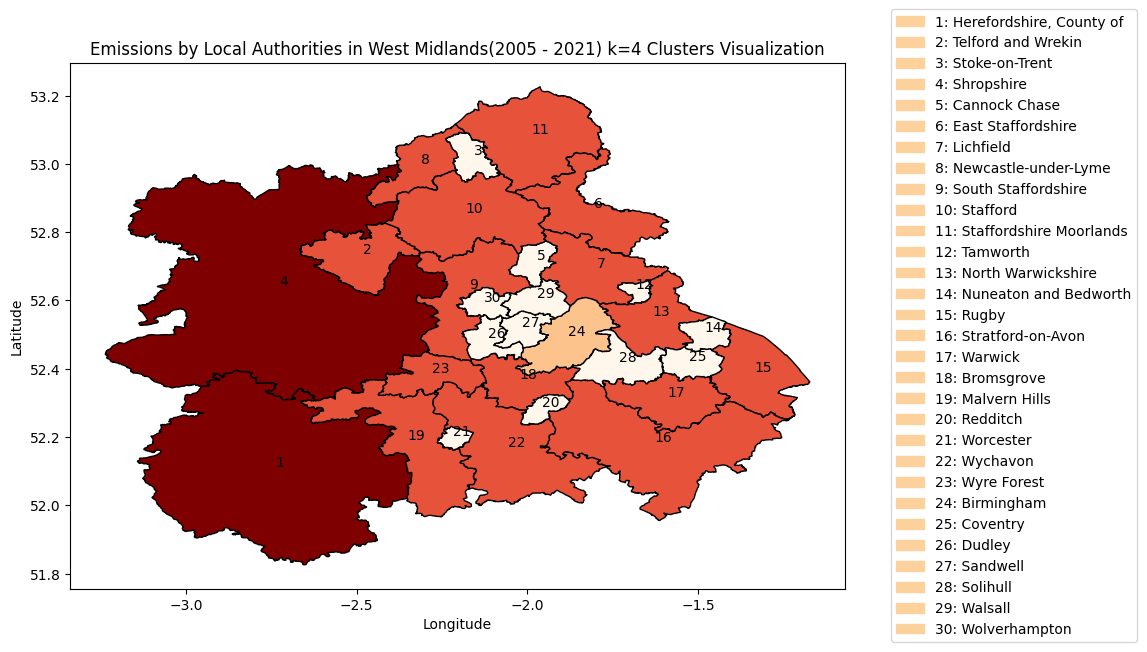

In [220]:
import pandas as pd
# Reading the CSV file into a DataFrame
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

# Converting the DataFrame to a GeoDataFrame
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

#westmidlands_emissions_df = pd.DataFrame(areas_to_visualize)
westmidlands_emissions_df = west_midlands_filtered_columns_pivot.reset_index()
#westmidlands_emissions_df.columns = ['clusters']

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]

filtered_gdf = filtered_gdf.merge(westmidlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

ax = filtered_gdf.plot(column='K=4 Cluster Labels', cmap='OrRd', legend=False,  edgecolor='black', figsize=(10, 10))

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

for idx, row in filtered_gdf.iterrows():
    plt.annotate(text=row['ID'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
             xytext=(5, 5), textcoords='offset points',
             horizontalalignment='center', verticalalignment='center')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#FDD19B') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Setting the title and labels
plt.title('Emissions by Local Authorities in West Midlands(2005 - 2021) k=4 Clusters Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Displaying the plot
plt.show()

<h1><b>Choosing K=3</b></h1>

In [221]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [222]:
model.labels_

array([2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [223]:
X['K=3 Cluster Labels'] = model.labels_

In [224]:
X.corr()['K=3 Cluster Labels']

3
Agriculture Total                       -0.758211
Area (km2)                              -0.757126
Commercial Total                         0.476833
Domestic Total                           0.400849
Emissions per km2 (kt CO2e)              0.440071
Industry Total                           0.218403
LULUCF Net Emissions                     0.734945
Per Capita Emissions (tCO2e)            -0.178911
Population ('000s, mid-year estimate)    0.449652
Public Sector Total                      0.497439
Transport Total                          0.286083
Waste Management Total                   0.202545
K=4 Cluster Labels                      -0.378588
K=3 Cluster Labels                       1.000000
Name: K=3 Cluster Labels, dtype: float64

<Axes: xlabel='3'>

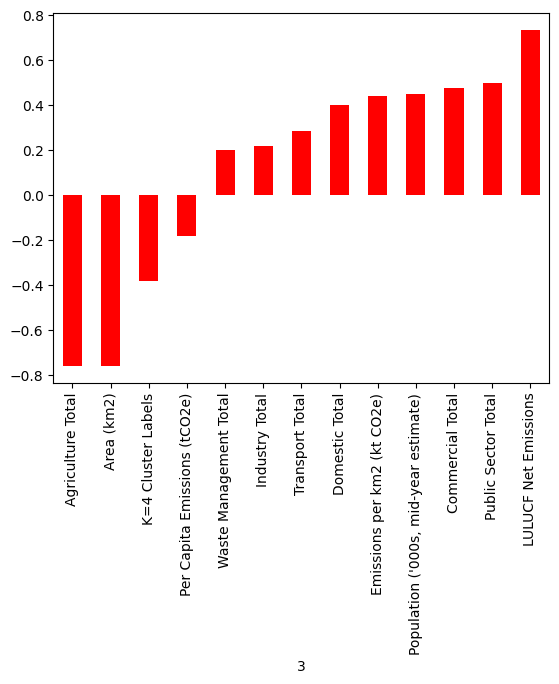

In [225]:
X.corr()['K=3 Cluster Labels'].iloc[:-1].sort_values().plot(kind='bar', color='red')

In [226]:
west_midlands_filtered_columns_pivot['K=3 Cluster Labels'] = model.labels_

In [227]:
west_midlands_filtered_columns_pivot


3                         Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                             
Birmingham                       232.234593   4552.4504      12852.635286   
Bromsgrove                       942.038895   3688.4628        801.268832   
Cannock Chase                    113.860612   1341.0025       1071.978144   
Coventry                         157.346755   1676.8630       3927.635477   
Dudley                            79.601540   1665.2928       2571.047917   
East Staffordshire              3138.978602   6629.7841       2369.959872   
Herefordshire, County of       10584.462434  37055.0598       1690.736774   
Lichfield                       1436.446885   5632.0048       1141.870438   
Malvern Hills                   2488.276312   9810.2070        528.639775   
Newcastle-under-Lyme            1766.182949   3586.2758       1183.790340   
North Warwickshire               937.036978   4832.4421       1477.771787   
Nuneaton and Bedworth            249.410476   1342.1568       1021.185881   
Redditch                         192.326022    922.2653        768.610160   
Rugby                           1524.918541   6010.4741       1696.243918   
Sandwell                          26.884298   1454.5013       3906.332361   
Shropshire                     19686.740481  54353.6886       3375.969744   
Solihull                         524.353869   3030.7957       4356.745689   
South Staffordshire             1721.561801   6924.4791        739.654438   
Stafford                        5010.253387  10168.9257       1585.847950   
Staffordshire Moorlands         4557.505236   9789.4466        791.038317   
Stoke-on-Trent                   263.529353   1588.6245       2675.094187   
Stratford-on-Avon               3413.366428  16623.7798       1973.501243   
Tamworth                          60.849074    524.4619        823.193275   
Telford and Wrekin              1370.588566   4935.3329       2107.332474   
Walsall                          134.144831   1767.5478       2290.415224   
Warwick                          762.090017   4808.9974       2429.173388   
Wolverhampton                     51.413959   1180.4205       2694.037858   
Worcester                         73.971086    565.7294       1086.861676   
Wychavon                        2498.614492  11280.2106       1577.894127   
Wyre Forest                      596.803813   3321.8646        975.997900   

3                         Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                         
Birmingham                  31681.462010                   359.214273   
Bromsgrove                   3457.285332                    67.256023   
Cannock Chase                3224.318889                   105.522908   
Coventry                     9506.371323                   303.260054   
Dudley                      10040.025758                   268.397698   
East Staffordshire           3790.455148                    47.514664   
Herefordshire, County of     6594.869230                    13.932655   
Lichfield                    3635.441997                    46.225527   
Malvern Hills                2861.291191                    20.871492   
Newcastle-under-Lyme         4160.337226                    79.759987   
North Warwickshire           2214.576263                    64.183807   
Nuneaton and Bedworth        3979.197206                   146.983629   
Redditch                     2565.510127                   152.543252   
Rugby                        3433.355172                   104.911959   
Sandwell                     9137.521205                   363.484249   
Shropshire                  10893.000843                    17.267731   
Solihull                     7352.614920                   146.505939   
South Staffordshire          3751.518023                    44.043755   
Stafford                     4613.544670                    40.807738   
St

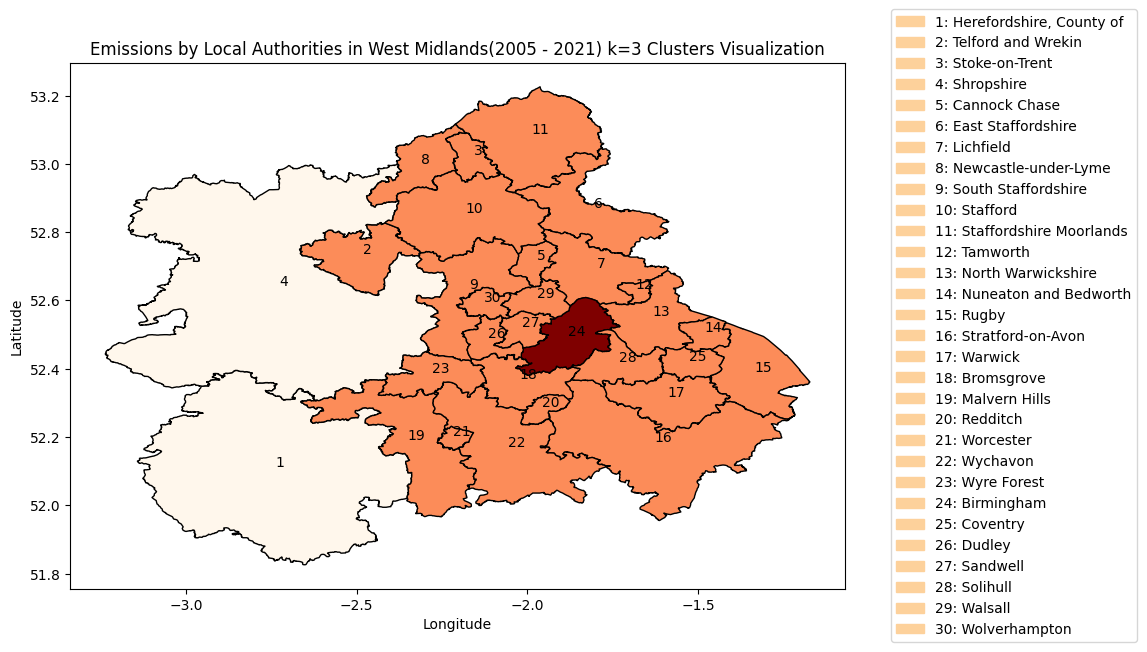

In [228]:

import pandas as pd
# Reading the CSV file into a DataFrame
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

# Converting the DataFrame to a GeoDataFrame
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

#westmidlands_emissions_df = pd.DataFrame(areas_to_visualize)
westmidlands_emissions_df = west_midlands_filtered_columns_pivot.reset_index()
#westmidlands_emissions_df.columns = ['clusters']

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]

filtered_gdf = filtered_gdf.merge(westmidlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

ax = filtered_gdf.plot(column='K=3 Cluster Labels', cmap='OrRd', legend=False,  edgecolor='black', figsize=(10, 10))

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

for idx, row in filtered_gdf.iterrows():
    plt.annotate(text=row['ID'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
             xytext=(5, 5), textcoords='offset points',
             horizontalalignment='center', verticalalignment='center')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#FDD19B') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Setting the title and labels
plt.title('Emissions by Local Authorities in West Midlands(2005 - 2021) k=3 Clusters Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Displaying the plot
plt.show()

<h1>DBSCAN</h1>
<p><b>Density-Based Spatial Clustering of Applications with Noise</b> is a technique which can be used for clustering and outlier detection.</p>

<ul> DBSCAN vs. K-Means Clustering</ul>
<ul> DBSCAN Hyperparameters Theory</ul>
<ul> DBSCAN Hyperparameters Coding</ul>


<h1>Brief History</h1>
<p>1972: <b>Robert F. Ling</b> published a closely related algorithm in "The theory and Construction of k-Clusters" with an expected run time of O(n^3).Meaning as n number of points grows, the runtime of the algorthm grows cubically.</p>

<p>1996: <b>MArtin Ester, Hans-Peter Kriegel, Jorg Sander and Xiaowei Xu</b> proposed the modern version of DBSCAN with a runtime of O(n^2)</p>

<p>2014: DBSCAN was awarded the <b>test of time award</b> at the leading data mining conference, SIGKDD<b>(ACM Special Interest Group on Knowledge Discovery and Data Mining) conference</b>.</p>

<h1>How it works</h1>
<p><b>DBSCAN</b> as the name implies is based on the idea of grouping points that are close together in high-density regions, and marking points that are far away in low-density regions as outliers. </p>

<p>DBSCAN has two main parameters: <b>epsilon (ε)</b>, which defines the radius of a neighborhood around a point, and <b>minPts</b>, which defines the minimum number of points required to form a dense region. Unlike K-Means, it focuses on density as the main factor for cluster assignment of points.</p>

<p>DBSCAN starts with a random point and checks if it is a core point, meaning it has at least minPts points within distance ε. If it is, it forms a cluster with all the points that are reachable from it. If it is not, it marks it as noise and moves on to another point. This process is repeated until all points are either assigned to a cluster or marked as noise.
</p>

In [229]:
#Considering the dataset and features to understand the Clusters each feature belongs to...
west_midlands_local_authority_emissions

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [230]:
X = west_midlands_local_authority_emissions.iloc[:-1]

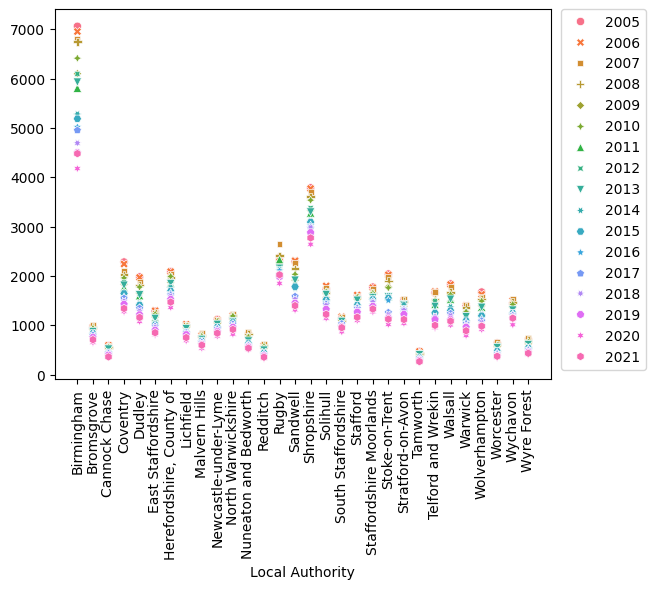

In [231]:
sns.scatterplot(data=X, legend=True)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [232]:
X1 = west_midlands_filtered_columns_pivot

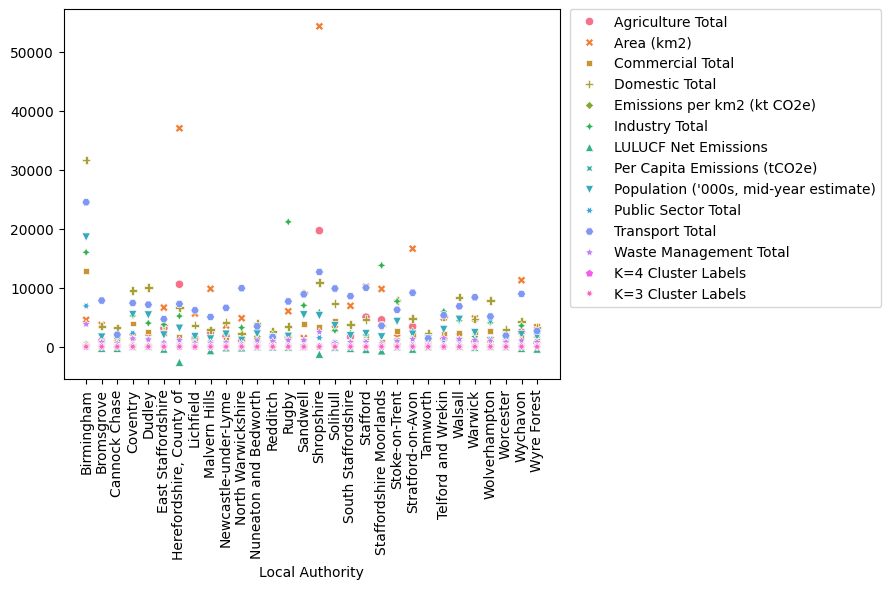

In [233]:
sns.scatterplot(data=X1, legend=True)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


Explained variance ratio: [0.45570196 0.31050451]


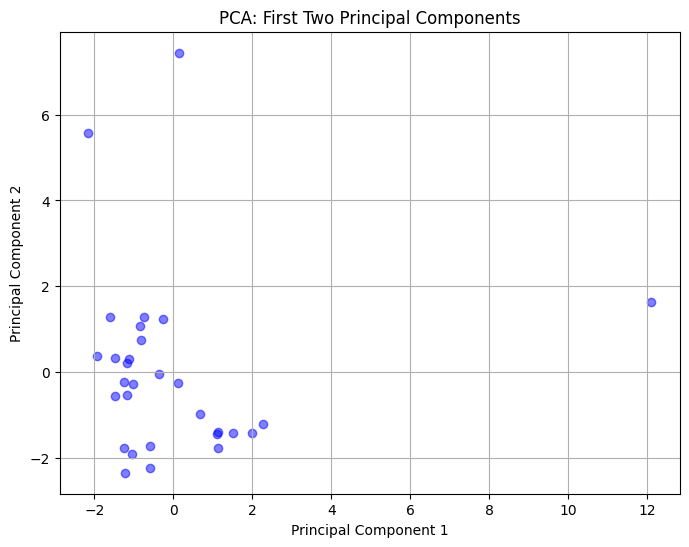

In [234]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(west_midlands_filtered_columns_pivot)

n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.grid(True)
plt.show()


In [235]:
X_pca_df = pd.DataFrame(X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

In [236]:
X_pca_df.head()

Principal_Component_1  Principal_Component_2
0              12.110835               1.625871
1              -1.244228              -0.219048
2              -1.261938              -1.777616
3               2.266301              -1.212958
4               1.506177              -1.411925

<Axes: xlabel='Principal_Component_1', ylabel='Principal_Component_2'>

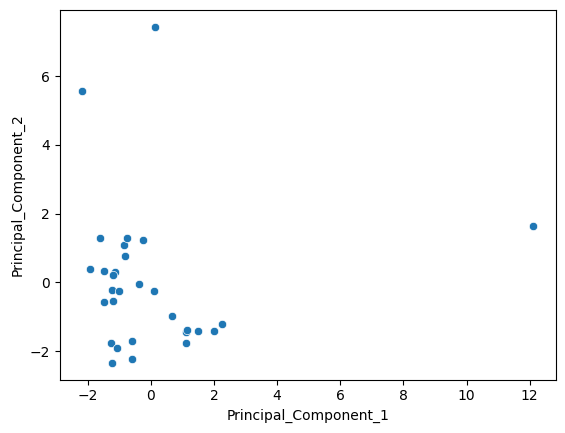

In [237]:
sns.scatterplot(data=X_pca_df,  x='Principal_Component_1', y='Principal_Component_2')

In [238]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='Principal_Component_1',y='Principal_Component_2',hue=labels,palette='Set1')

In [239]:
from sklearn.cluster import KMeans

In [240]:
model = KMeans(n_clusters=3)

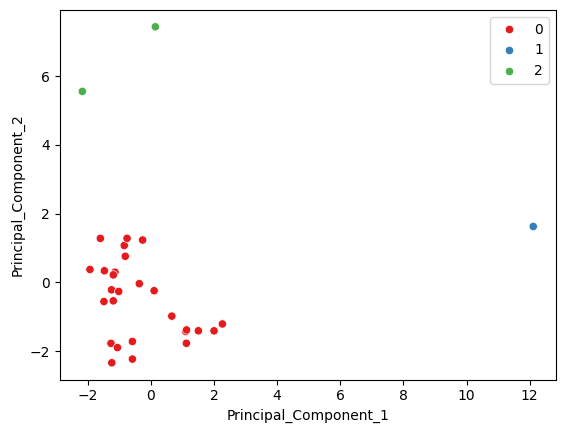

In [241]:
display_categories(model,X_pca_df)


In [242]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [243]:
model = DBSCAN()

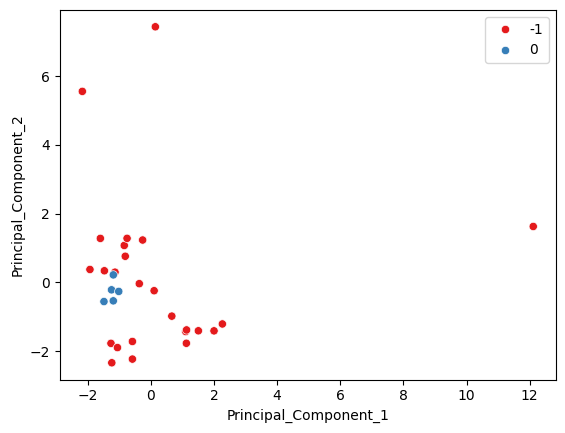

In [244]:
display_categories(model,X_pca_df)

In [245]:
model.labels_

array([-1,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0])

In [246]:
X_pca_df['DBSCAN Cluster Labels'] = model.labels_

In [247]:
X_pca_df.corr()['DBSCAN Cluster Labels']

Principal_Component_1   -0.216681
Principal_Component_2   -0.058692
DBSCAN Cluster Labels    1.000000
Name: DBSCAN Cluster Labels, dtype: float64

In [248]:
#X_pca_df.corr()['DBSCAN Cluster Labels'].iloc[:-1].sort_values().plot(kind='bar', color='red')

In [249]:
west_midlands_filtered_columns_pivot['clusters DBSCAN'] = model.labels_

In [250]:
west_midlands_filtered_columns_pivot

3                         Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                             
Birmingham                       232.234593   4552.4504      12852.635286   
Bromsgrove                       942.038895   3688.4628        801.268832   
Cannock Chase                    113.860612   1341.0025       1071.978144   
Coventry                         157.346755   1676.8630       3927.635477   
Dudley                            79.601540   1665.2928       2571.047917   
East Staffordshire              3138.978602   6629.7841       2369.959872   
Herefordshire, County of       10584.462434  37055.0598       1690.736774   
Lichfield                       1436.446885   5632.0048       1141.870438   
Malvern Hills                   2488.276312   9810.2070        528.639775   
Newcastle-under-Lyme            1766.182949   3586.2758       1183.790340   
North Warwickshire               937.036978   4832.4421       1477.771787   
Nuneaton and Bedworth            249.410476   1342.1568       1021.185881   
Redditch                         192.326022    922.2653        768.610160   
Rugby                           1524.918541   6010.4741       1696.243918   
Sandwell                          26.884298   1454.5013       3906.332361   
Shropshire                     19686.740481  54353.6886       3375.969744   
Solihull                         524.353869   3030.7957       4356.745689   
South Staffordshire             1721.561801   6924.4791        739.654438   
Stafford                        5010.253387  10168.9257       1585.847950   
Staffordshire Moorlands         4557.505236   9789.4466        791.038317   
Stoke-on-Trent                   263.529353   1588.6245       2675.094187   
Stratford-on-Avon               3413.366428  16623.7798       1973.501243   
Tamworth                          60.849074    524.4619        823.193275   
Telford and Wrekin              1370.588566   4935.3329       2107.332474   
Walsall                          134.144831   1767.5478       2290.415224   
Warwick                          762.090017   4808.9974       2429.173388   
Wolverhampton                     51.413959   1180.4205       2694.037858   
Worcester                         73.971086    565.7294       1086.861676   
Wychavon                        2498.614492  11280.2106       1577.894127   
Wyre Forest                      596.803813   3321.8646        975.997900   

3                         Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                         
Birmingham                  31681.462010                   359.214273   
Bromsgrove                   3457.285332                    67.256023   
Cannock Chase                3224.318889                   105.522908   
Coventry                     9506.371323                   303.260054   
Dudley                      10040.025758                   268.397698   
East Staffordshire           3790.455148                    47.514664   
Herefordshire, County of     6594.869230                    13.932655   
Lichfield                    3635.441997                    46.225527   
Malvern Hills                2861.291191                    20.871492   
Newcastle-under-Lyme         4160.337226                    79.759987   
North Warwickshire           2214.576263                    64.183807   
Nuneaton and Bedworth        3979.197206                   146.983629   
Redditch                     2565.510127                   152.543252   
Rugby                        3433.355172                   104.911959   
Sandwell                     9137.521205                   363.484249   
Shropshire                  10893.000843                    17.267731   
Solihull                     7352.614920                   146.505939   
South Staffordshire          3751.518023                    44.043755   
Stafford                     4613.544670                    40.807738   
St

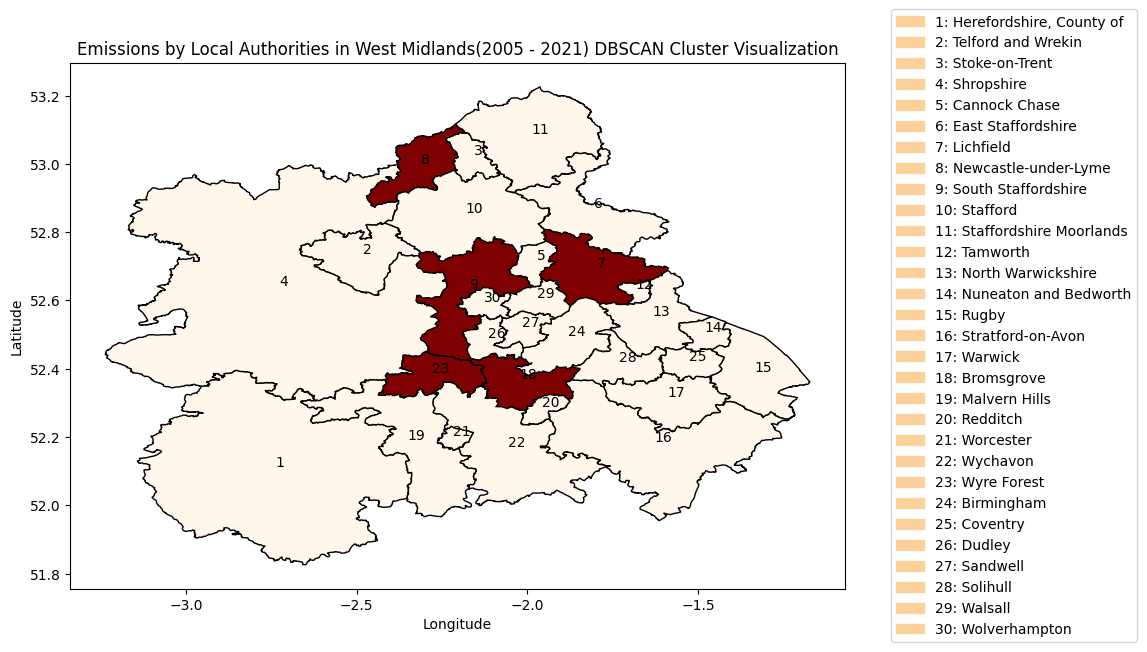

In [251]:

import pandas as pd
# Reading the CSV file into a DataFrame
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

# Converting the DataFrame to a GeoDataFrame
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

#westmidlands_emissions_df = pd.DataFrame(areas_to_visualize)
westmidlands_emissions_df = west_midlands_filtered_columns_pivot.reset_index()
#westmidlands_emissions_df.columns = ['clusters']

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]

filtered_gdf = filtered_gdf.merge(westmidlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

ax = filtered_gdf.plot(column='clusters DBSCAN', cmap='OrRd', legend=False,  edgecolor='black', figsize=(10, 10))

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

for idx, row in filtered_gdf.iterrows():
    plt.annotate(text=row['ID'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
             xytext=(5, 5), textcoords='offset points',
             horizontalalignment='center', verticalalignment='center')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#FDD19B') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Setting the title and labels
plt.title('Emissions by Local Authorities in West Midlands(2005 - 2021) DBSCAN Cluster Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Displaying the plot
plt.show()

<h1>Adjusting DBSCAN parameter Epsilon</h1>

In [252]:
model = DBSCAN(eps=1)

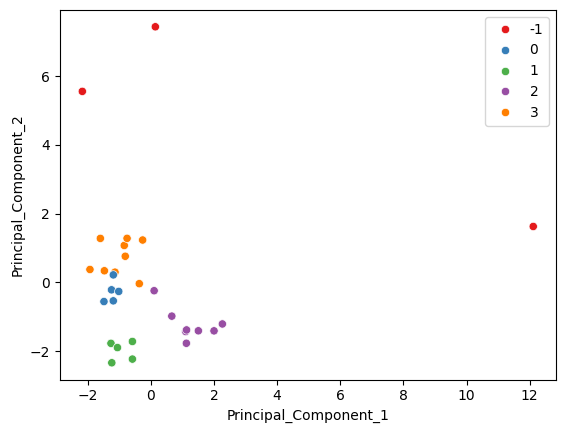

In [253]:
display_categories(model,X_pca_df)

In [254]:
model.labels_

array([-1,  0,  1,  2,  2,  3, -1,  0,  3,  0,  3,  1,  1,  3,  2, -1,  2,
        0,  3,  3,  2,  3,  1,  2,  2,  3,  2,  1,  3,  0])

In [255]:
X_pca_df['DBSCAN(ε = 1) Cluster Labels'] = model.labels_

In [256]:
west_midlands_filtered_columns_pivot['clusters DBSCAN(ε = 1)'] = model.labels_

In [257]:
west_midlands_filtered_columns_pivot

3                         Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                             
Birmingham                       232.234593   4552.4504      12852.635286   
Bromsgrove                       942.038895   3688.4628        801.268832   
Cannock Chase                    113.860612   1341.0025       1071.978144   
Coventry                         157.346755   1676.8630       3927.635477   
Dudley                            79.601540   1665.2928       2571.047917   
East Staffordshire              3138.978602   6629.7841       2369.959872   
Herefordshire, County of       10584.462434  37055.0598       1690.736774   
Lichfield                       1436.446885   5632.0048       1141.870438   
Malvern Hills                   2488.276312   9810.2070        528.639775   
Newcastle-under-Lyme            1766.182949   3586.2758       1183.790340   
North Warwickshire               937.036978   4832.4421       1477.771787   
Nuneaton and Bedworth            249.410476   1342.1568       1021.185881   
Redditch                         192.326022    922.2653        768.610160   
Rugby                           1524.918541   6010.4741       1696.243918   
Sandwell                          26.884298   1454.5013       3906.332361   
Shropshire                     19686.740481  54353.6886       3375.969744   
Solihull                         524.353869   3030.7957       4356.745689   
South Staffordshire             1721.561801   6924.4791        739.654438   
Stafford                        5010.253387  10168.9257       1585.847950   
Staffordshire Moorlands         4557.505236   9789.4466        791.038317   
Stoke-on-Trent                   263.529353   1588.6245       2675.094187   
Stratford-on-Avon               3413.366428  16623.7798       1973.501243   
Tamworth                          60.849074    524.4619        823.193275   
Telford and Wrekin              1370.588566   4935.3329       2107.332474   
Walsall                          134.144831   1767.5478       2290.415224   
Warwick                          762.090017   4808.9974       2429.173388   
Wolverhampton                     51.413959   1180.4205       2694.037858   
Worcester                         73.971086    565.7294       1086.861676   
Wychavon                        2498.614492  11280.2106       1577.894127   
Wyre Forest                      596.803813   3321.8646        975.997900   

3                         Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                         
Birmingham                  31681.462010                   359.214273   
Bromsgrove                   3457.285332                    67.256023   
Cannock Chase                3224.318889                   105.522908   
Coventry                     9506.371323                   303.260054   
Dudley                      10040.025758                   268.397698   
East Staffordshire           3790.455148                    47.514664   
Herefordshire, County of     6594.869230                    13.932655   
Lichfield                    3635.441997                    46.225527   
Malvern Hills                2861.291191                    20.871492   
Newcastle-under-Lyme         4160.337226                    79.759987   
North Warwickshire           2214.576263                    64.183807   
Nuneaton and Bedworth        3979.197206                   146.983629   
Redditch                     2565.510127                   152.543252   
Rugby                        3433.355172                   104.911959   
Sandwell                     9137.521205                   363.484249   
Shropshire                  10893.000843                    17.267731   
Solihull                     7352.614920                   146.505939   
South Staffordshire          3751.518023                    44.043755   
Stafford                     4613.544670                    40.807738   
St

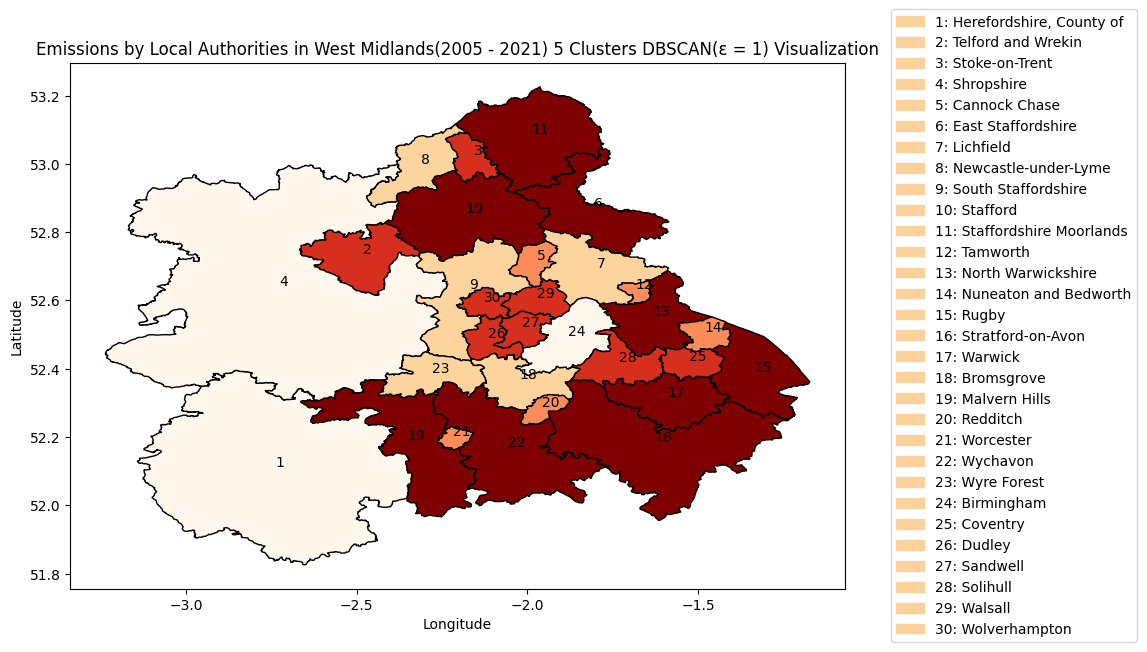

In [258]:
import pandas as pd
# Reading the CSV file into a DataFrame
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

# Converting the DataFrame to a GeoDataFrame
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

#westmidlands_emissions_df = pd.DataFrame(areas_to_visualize)
westmidlands_emissions_df = west_midlands_filtered_columns_pivot.reset_index()
#westmidlands_emissions_df.columns = ['clusters']

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]

filtered_gdf = filtered_gdf.merge(westmidlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

ax = filtered_gdf.plot(column='clusters DBSCAN(ε = 1)', cmap='OrRd', legend=False,  edgecolor='black', figsize=(10, 10))

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

for idx, row in filtered_gdf.iterrows():
    plt.annotate(text=row['ID'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
             xytext=(5, 5), textcoords='offset points',
             horizontalalignment='center', verticalalignment='center')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#FDD19B') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Setting the title and labels
plt.title('Emissions by Local Authorities in West Midlands(2005 - 2021) 5 Clusters DBSCAN(ε = 1) Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Displaying the plot
plt.show()

<H1>Choosing the optimal Hyperparmeter Epsilon</H1>

> Indented block



The importance of an inflection point is that is shows when the changes occur and help to pick the optimal epsilon

Explained variance ratio: [0.45570196 0.31050451]


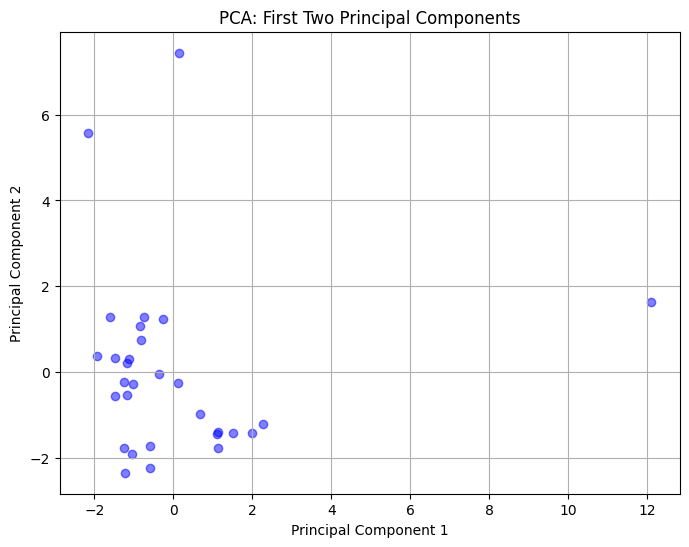

In [259]:
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.grid(True)
plt.show()

In [260]:
X_pca_df = pd.DataFrame(X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

In [261]:
X_pca_df

Principal_Component_1  Principal_Component_2
0               12.110835               1.625871
1               -1.244228              -0.219048
2               -1.261938              -1.777616
3                2.266301              -1.212958
4                1.506177              -1.411925
5               -1.134340               0.294944
6               -2.168391               5.559879
7               -1.188044              -0.539732
8               -1.927525               0.373577
9               -1.015717              -0.265242
10              -1.470284               0.336183
11              -0.582844              -1.722919
12              -1.056665              -1.900582
13              -0.259047               1.231476
14               2.001762              -1.413707
15               0.143683               7.441126
16               0.664786              -0.984886
17              -1.186868               0.216269
18              -0.840731               1.073106
19              -1.597822               1.278600
20               1.106432              -1.434077
21              -0.752146               1.280120
22              -1.235579              -2.343471
23               0.105092              -0.244718
24               1.132018              -1.386996
25              -0.364735              -0.039597
26               1.125922              -1.775364
27              -0.582849              -2.236048
28              -0.809127               0.758125
29              -1.484128              -0.560390

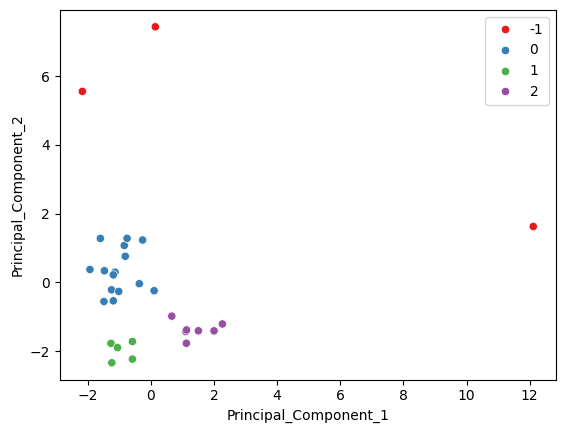

In [262]:
dbscan = DBSCAN(eps = 1)
display_categories(dbscan, X_pca_df)

In [263]:
len(np.unique(dbscan.labels_))

4

In [264]:
np.sum(dbscan.labels_ == -1)

3

In [265]:
100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

10.0

In [266]:
len(dbscan.labels_)

30

In [267]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(X_pca_df)

  number_of_outliers.append(np.sum(dbscan.labels_ == -1))

  perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

  outlier_percent.append(perc_outliers)

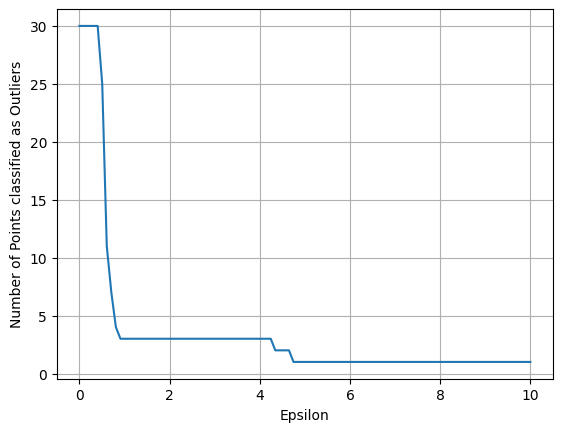

In [268]:
sns.lineplot(x=np.linspace(0.001,10,100), y=number_of_outliers)
plt.ylabel('Number of Points classified as Outliers')
plt.xlabel('Epsilon')
plt.grid()

From the plot above, as the epsilon value increases from 0 to around 2, the number of Outliers drops significantly. After this point, the curve flattens out, indicating that increasing epsilon further does not result in a significant reducation in the number of outliers.

Zooming in on the plot between O and 2

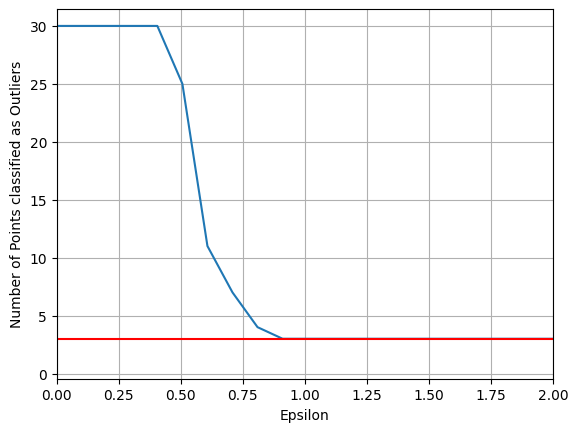

In [269]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.xlim(0,2)
plt.hlines(y=3,xmin=0,xmax=2,color='red')
plt.ylabel('Number of Points classified as Outliers')
plt.xlabel('Epsilon')
plt.grid()

From the above plot its observed that between 0.75 and 1.25 there seem to be an interesting stability

In [270]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,7,100):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(X_pca_df)

  number_of_outliers.append(np.sum(dbscan.labels_ == -1))

  perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

  outlier_percent.append(perc_outliers)

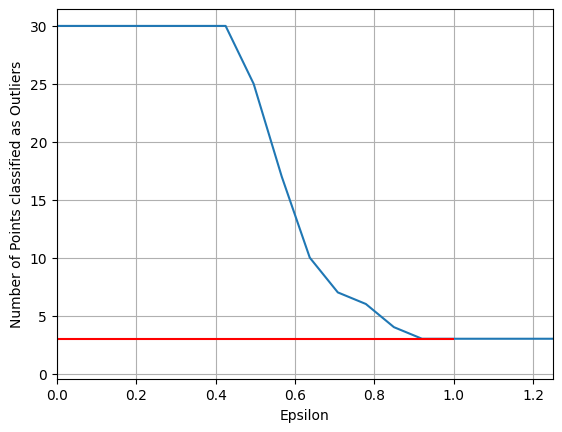

In [271]:
sns.lineplot(x=np.linspace(0.001,7,100),y=number_of_outliers)
plt.xlim(0,1.25)
plt.ylabel('Number of Points classified as Outliers')
plt.xlabel('Epsilon')
plt.hlines(y=3,xmin=0,xmax=1,color='red')
plt.grid()

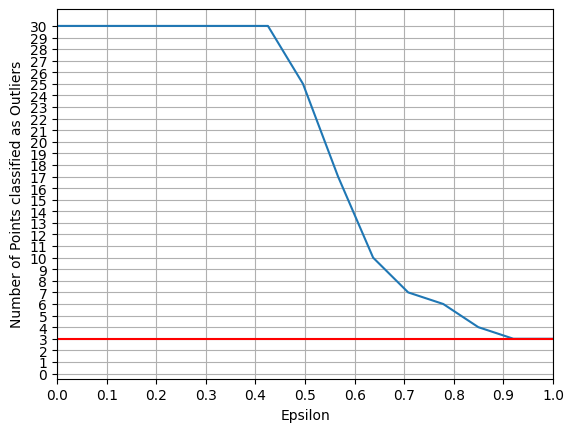

In [272]:
sns.lineplot(x=np.linspace(0.001,7,100),y=number_of_outliers)
plt.xlim(0,1)
plt.ylabel('Number of Points classified as Outliers')
plt.xlabel('Epsilon')
plt.hlines(y=3,xmin=0,xmax=1,color='red')
#plt.vlines(x=0.92,ymin=0,ymax=30,color='red')
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 31, 1))
plt.show()

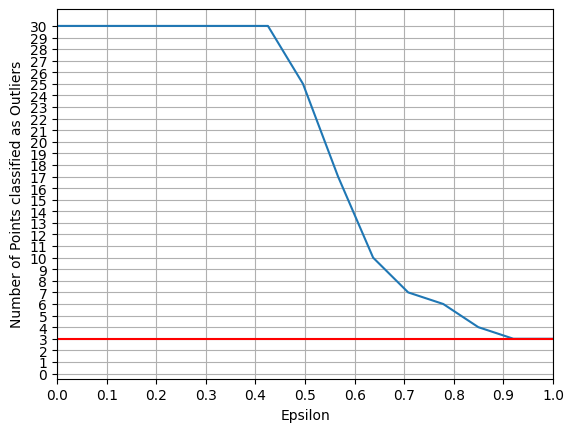

In [273]:
sns.lineplot(x=np.linspace(0.001,7,100),y=number_of_outliers)
plt.xlim(0,1)
plt.ylabel('Number of Points classified as Outliers')
plt.xlabel('Epsilon')
plt.hlines(y=3,xmin=0,xmax=1,color='red')
#plt.vlines(x=0.92,ymin=0,ymax=30,color='red')
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 31, 1))
plt.show()

<H1>Calibrating DBSCAN Hyperparameters Further</H1>

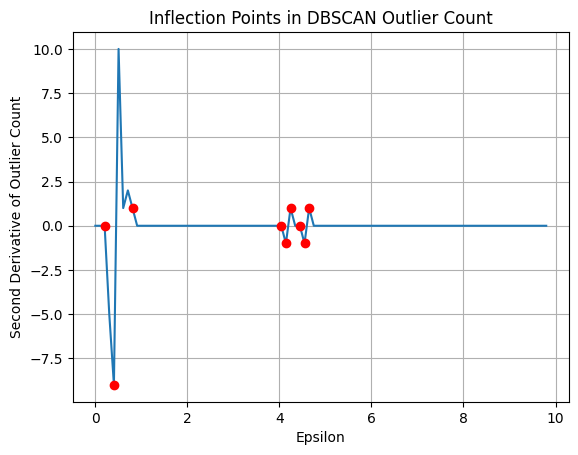

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.signal import find_peaks

outlier_counts = []
eps_values = np.linspace(0.001, 10, 100)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X_pca_df)
    outlier_counts.append(np.sum(dbscan.labels_ == -1))

second_derivative = np.diff(outlier_counts, n=2)

inflection_points = np.where(np.diff(np.sign(second_derivative)))[0]

plt.plot(eps_values[:-2], second_derivative)
plt.plot(eps_values[inflection_points], second_derivative[inflection_points], 'ro')
plt.xlabel('Epsilon')
plt.ylabel('Second Derivative of Outlier Count')
plt.title('Inflection Points in DBSCAN Outlier Count')
plt.grid()
plt.show()


In [275]:
eps_values = np.linspace(0.001, 10, 100)

eps_values = eps_values[:-2]

most_negative_index = np.argmin(second_derivative)
optimal_epsilon = eps_values[most_negative_index]
print(f"The optimal epsilon value is {optimal_epsilon}")


The optimal epsilon value is 0.405


In [276]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

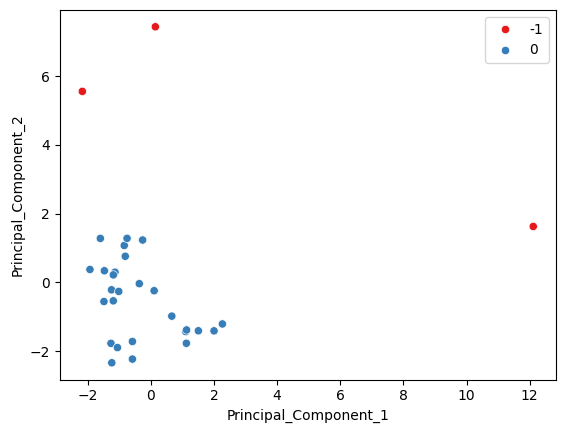

In [277]:
dbscan = DBSCAN(eps = 4.05)
display_categories(dbscan, X_pca_df)

In [278]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1,35):
  dbscan = DBSCAN(min_samples=n)
  dbscan.fit(X_pca_df)

  number_of_outliers.append(np.sum(dbscan.labels_ == -1))
  perc_outliers = 100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)

  outlier_percent.append(perc_outliers)



Text(0, 0.5, 'Percentage of points classified as an outlier')

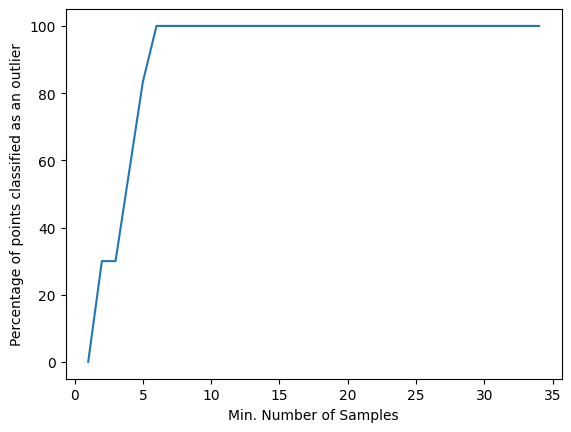

In [279]:
sns.lineplot(x=np.arange(1,35),y=outlier_percent)
plt.xlabel('Min. Number of Samples')
plt.ylabel('Percentage of points classified as an outlier')

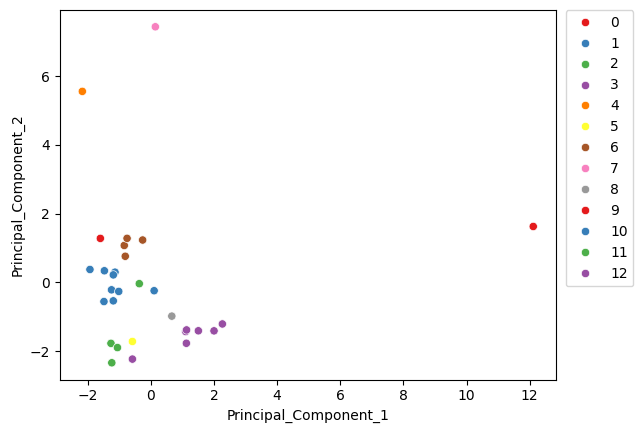

In [280]:
dbscan = DBSCAN(min_samples = 1)
display_categories(dbscan, X_pca_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

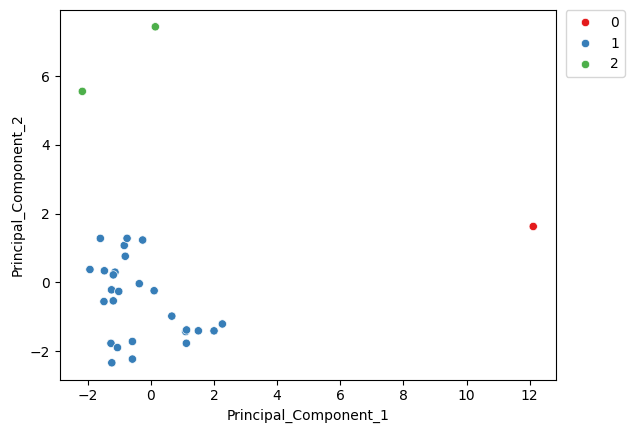

In [281]:
dbscan = DBSCAN(min_samples = 1, eps = 4.05)
display_categories(dbscan, X_pca_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

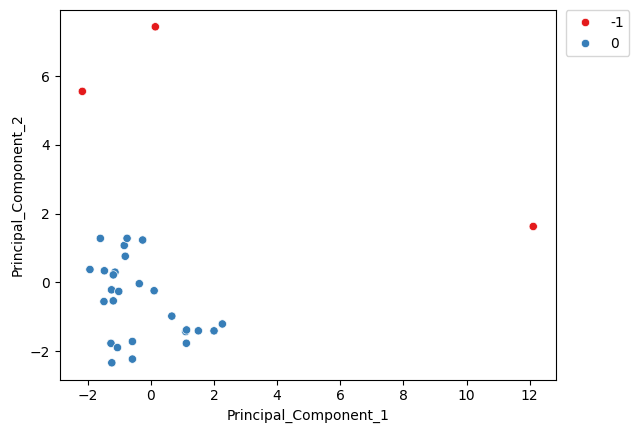

In [282]:
num_dim = X_pca_df.shape[1]
dbscan = DBSCAN(min_samples=2*num_dim,eps=4.05)
display_categories(dbscan,X_pca_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


<h1>PCA</h1>

<p>Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.</p>

<h1>Brief History</h1>

<p>1901: <b>Karl Pearson</b> a pivotal figure in the history of PCA, who in 1901 published a paper titled "On Lines and Planes of Closest Fit to Systems of Points in Space." This work, grounded in the principal axis theorem from geometry, laid the foundational concept for what would later evolve into PCA.</p> <p>Pearson, known for his contributions to statistics, was also the protege of Francis Galton. Among his many contributions to the field is the Pearson Correlation Coefficient, a measure of the linear correlation between two variables.</p>

<p>1933: American mathematician and economist <b>Harold Hotelling</b> made significant advancements in the methodology and application of PCA. Hotelling's publication, "Analysis of a Complex of Statistical Variables into Principal Components," not only independently developed the PCA technique but also named it. Hotelling's work expanded the application of PCA into various fields and solidified its role as a critical tool in statistical analysis.</p>





In [283]:
url = 'https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'

data_1_1 = pd.read_excel(url, sheet_name='1_1')

In [284]:
# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]


In [285]:
# Filter the data for the "london" Region/Country
London_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'London']
London_data

3    Region/Country Second Tier Authority       Local Authority  \
3506         London  Barking and Dagenham  Barking and Dagenham   
3507         London  Barking and Dagenham  Barking and Dagenham   
3508         London  Barking and Dagenham  Barking and Dagenham   
3509         London  Barking and Dagenham  Barking and Dagenham   
3510         London  Barking and Dagenham  Barking and Dagenham   
...             ...                   ...                   ...   
4062         London           Westminster           Westminster   
4063         London           Westminster           Westminster   
4064         London           Westminster           Westminster   
4065         London           Westminster           Westminster   
4066         London           Westminster           Westminster   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
3506            E09000002          2005           131.684063     17.459426   
3507            E09000002          2006           139.895257      13.63688   
3508            E09000002          2007           140.487938     12.727459   
3509            E09000002          2008           135.419965     12.319912   
3510            E09000002          2009           115.972501      12.15477   
...                   ...           ...                  ...           ...   
4062            E09000033          2017            47.698762     23.283152   
4063            E09000033          2018           131.422791      59.29191   
4064            E09000033          2019           106.191379     57.354249   
4065            E09000033          2020            69.206872     52.611429   
4066            E09000033          2021            94.854934     69.663544   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
3506                      66.870493        28.426324     244.440306  ...   
3507                      66.154453        28.690501     248.377092  ...   
3508                      69.810178        30.324736     253.350311  ...   
3509                      68.498117         25.60148     241.839473  ...   
3510                      59.188809         21.28696     208.603041  ...   
...                             ...              ...            ...  ...   
4062                       0.085511        95.767013     166.834438  ...   
4063                       1.014299        94.752952     286.481952  ...   
4064                       0.268476        84.414842     248.228947  ...   
4065                       0.188609         87.61706      209.62397  ...   
4066                       0.186295       107.401328     272.106101  ...   

3    Agriculture Soils Agriculture Total    Landfill Waste Management 'Other'  \
3506          0.211348          1.239115  161.428095                 7.486672   
3507          0.396191          1.344134  149.864148                 8.481513   
3508           0.25175          1.199139  155.877849                  8.75395   
3509          0.151626          0.907199  128.605453                 8.869047   
3510          0.129006          0.841917  178.517672                 8.801381   
...                ...               ...         ...                      ...   
4062          0.017115          4.485572    9.338904                  7.83116   
4063          0.019147         15.027827   11.016105                 7.773276   
4064          0.021237         14.091068    9.521645                 7.656918   
4065          0.009882         14.423154   14.093663                 7.487961   
4066          0.040033         21.398514    4.464876                 7.905342   

3    Waste Management Total  Grand Total  \
3506             168.914767  1143.769451   
3507             158.345662  1137.669474   
3508             164.631799  1129.493177   
3509               137.4745   1059.17047   
3510             187.319052  1027.842511   
...                     ...          ...   
4062              17.170064  2062.990819   
4063              18

In [286]:
import pandas as pd

url = 'https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')

# Set the column names from the header row and skip the first 4 rows
data_1_1.columns = data_1_1.iloc[3]
data_1_1 = data_1_1.iloc[4:]

# Filter out rows where "Second Tier Authority" ends with "Total"
data_1_1_filtered = data_1_1[~data_1_1['Second Tier Authority'].str.endswith("Total")]

# Create a list of regions for filtering
regions = [
    'London', 'East Midlands', 'East of England', 'North East', 'North West',
    'Northern Ireland', 'Scotland', 'South East', 'South West', 'Wales',
    'West Midlands', 'Yorkshire and the Humber'
]

# Initialize a dictionary to hold pivot table for each region
regions_pivot_tables = {}

for region in regions:
    # Filter data for the current region
    region_data = data_1_1_filtered[data_1_1_filtered['Region/Country'] == region]

    # Create a pivot table for the current region
    pivot_table = pd.pivot_table(
        region_data,
        values=[
            "Commercial Total", "Waste Management Total", "Agriculture Total",
            "Transport Total", "Domestic Total", "Public Sector Total",
            "Industry Total", "LULUCF Net Emissions", "Emissions per km2 (kt CO2e)",
            "Population ('000s, mid-year estimate)", "Per Capita Emissions (tCO2e)",
            "Area (km2)"
        ],
        index=['Local Authority'],
        aggfunc=sum
    )

    # Store the pivot table in the dictionary
    regions_pivot_tables[region] = pivot_table


In [287]:
regions_pivot_tables[region].columns

Index(['Agriculture Total', 'Area (km2)', 'Commercial Total', 'Domestic Total',
       'Emissions per km2 (kt CO2e)', 'Industry Total', 'LULUCF Net Emissions',
       'Per Capita Emissions (tCO2e)', 'Population ('000s, mid-year estimate)',
       'Public Sector Total', 'Transport Total', 'Waste Management Total'],
      dtype='object', name=3)

In [288]:
import pandas as pd

url = 'https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')

# Set the column names from the header row and skip the first 4 rows
data_1_1.columns = data_1_1.iloc[3]
data_1_1 = data_1_1.iloc[4:]

# Filter out rows where "Second Tier Authority" ends with "Total"
data_1_1_filtered = data_1_1[~data_1_1['Second Tier Authority'].str.endswith("Total")]

# Create a list of regions for filtering
regions = [
    'London', 'East Midlands', 'East of England', 'North East', 'North West',
    'Northern Ireland', 'Scotland', 'South East', 'South West', 'Wales',
    'West Midlands', 'Yorkshire and the Humber'
]

# Initialize a list to hold all the region pivot tables
all_regions_pivot_tables = []

for region in regions:
    # Filter data for the current region
    region_data = data_1_1_filtered[data_1_1_filtered['Region/Country'] == region]

    # Create a pivot table for the current region
    pivot_table = pd.pivot_table(
        region_data,
        values=[
            "Commercial Total", "Waste Management Total", "Agriculture Total",
            "Transport Total", "Domestic Total", "Public Sector Total",
            "Industry Total", "LULUCF Net Emissions", "Emissions per km2 (kt CO2e)",
            "Population ('000s, mid-year estimate)", "Per Capita Emissions (tCO2e)",
            "Area (km2)"
        ],
        index=['Local Authority'],
        aggfunc=sum
    )

    # Add region as a level in the MultiIndex to distinguish between regions
    pivot_table_with_region = pivot_table.copy()
    pivot_table_with_region.index = pd.MultiIndex.from_product([[region], pivot_table.index], names=['Region', 'Local Authority'])

    # Append the pivot table to the list
    all_regions_pivot_tables.append(pivot_table_with_region)

# Concatenate all pivot tables into one DataFrame
all_regions_data = pd.concat(all_regions_pivot_tables)


In [289]:
all_regions_data

3                                              Agriculture Total  Area (km2)  \
Region                   Local Authority                                       
London                   Barking and Dagenham          19.579120    642.5864   
                         Barnet                        74.342545   1474.7211   
                         Bexley                        27.661103   1092.8705   
                         Brent                         10.207251    734.9525   
                         Bromley                      134.075680   2552.2916   
...                                                          ...         ...   
Yorkshire and the Humber Scarborough                 3139.385773  14033.5867   
                         Selby                       2159.358898  10237.7944   
                         Sheffield                    764.241315   6254.8134   
                         Wakefield                    855.568610   5756.5366   
                         York                        1011.558455   4624.2516   

3                                              Commercial Total  \
Region                   Local Authority                          
London                   Barking and Dagenham       1553.253161   
                         Barnet                     3601.821682   
                         Bexley                     2295.186992   
                         Brent                      3713.265008   
                         Bromley                    3078.271700   
...                                                         ...   
Yorkshire and the Humber Scarborough                1254.015123   
                         Selby                       912.579429   
                         Sheffield                  7975.425653   
                         Wakefield                  4413.715040   
                         York                       2912.510527   

3                                              Domestic Total  \
Region                   Local Authority                        
London                   Barking and Dagenham     4693.536163   
                         Barnet                  12364.593312   
                         Bexley                   7289.514848   
                         Brent                    8663.648628   
                         Bromley                 11476.036567   
...                                                       ...   
Yorkshire and the Humber Scarborough              4359.507361   
                         Selby                    3195.613204   
                         Sheffield               17158.808470   
                         Wakefield               10734.765687   
                         York                     6569.719860   

3                                              Emissions per km2 (kt CO2e)  \
Region                   Local Authority                                     
London                   Barking and Dagenham                   409.106813   
                         Barnet                                 330.741682   
                         Bexley                                 290.768666   
                         Brent                                  557.320791   
                         Bromley                                156.192098   
...                                                                    ...   
Yorkshire and the Humber Scarborough                             17.586032   
                         Selby                                   32.763694   
                         Sheffield                              148.418494   
                         Wakefield                              127.065455   
                         York                                    72.665497   

3                                              Industry Total  \
Region                   Local Authority                        
London                   Barking and Dagenham     3000.433754   
                         Barnet

In [290]:
all_regions_data_reset = all_regions_data.reset_index()


In [291]:
all_regions_data_reset.columns

Index(['Region', 'Local Authority', 'Agriculture Total', 'Area (km2)',
       'Commercial Total', 'Domestic Total', 'Emissions per km2 (kt CO2e)',
       'Industry Total', 'LULUCF Net Emissions',
       'Per Capita Emissions (tCO2e)', 'Population ('000s, mid-year estimate)',
       'Public Sector Total', 'Transport Total', 'Waste Management Total'],
      dtype='object', name=3)

In [292]:
all_regions_data_ = all_regions_data_reset.drop('Region', axis=1)
all_regions_data_.columns.name = None

In [293]:
all_regions_data_

Local Authority  Agriculture Total  Area (km2)  Commercial Total  \
0    Barking and Dagenham          19.579120    642.5864       1553.253161   
1                  Barnet          74.342545   1474.7211       3601.821682   
2                  Bexley          27.661103   1092.8705       2295.186992   
3                   Brent          10.207251    734.9525       3713.265008   
4                 Bromley         134.075680   2552.2916       3078.271700   
..                    ...                ...         ...               ...   
369           Scarborough        3139.385773  14033.5867       1254.015123   
370                 Selby        2159.358898  10237.7944        912.579429   
371             Sheffield         764.241315   6254.8134       7975.425653   
372             Wakefield         855.568610   5756.5366       4413.715040   
373                  York        1011.558455   4624.2516       2912.510527   

     Domestic Total  Emissions per km2 (kt CO2e)  Industry Total  \
0       4693.536163                   409.106813     3000.433754   
1      12364.593312                   330.741682      898.185721   
2       7289.514848                   290.768666     3191.273950   
3       8663.648628                   557.320791     2611.735053   
4      11476.036567                   156.192098      706.049446   
..              ...                          ...             ...   
369     4359.507361                    17.586032     2566.630258   
370     3195.613204                    32.763694     6856.004295   
371    17158.808470                   148.418494    10930.638873   
372    10734.765687                   127.065455     9633.743066   
373     6569.719860                    72.665497     2258.631211   

     LULUCF Net Emissions  Per Capita Emissions (tCO2e)  \
0               43.106696                     82.282843   
1               28.462209                     79.685098   
2               28.507405                     79.981719   
3               50.682257                     77.356268   
4             -134.951130                     74.805600   
..                    ...                           ...   
369           -664.828755                    133.270552   
370            -25.943272                    232.716759   
371           -215.406431                     99.845601   
372            -95.993901                    129.556676   
373             23.312244                    100.546918   

     Population ('000s, mid-year estimate)  Public Sector Total  \
0                              3276.617269           465.037323   
1                              6189.282139          1717.304368   
2                              4004.543634           593.905850   
3                              5379.886303          1483.027560   
4                              5367.002039          1182.362262   
..                                     ...                  ...   
369                            1852.336369           422.919185   
370                            1452.833306           195.653145   
371                            9340.579916          2769.727076   
372                            5680.795887          1552.273941   
373                            3359.064810           975.617363   

     Transport Total  Waste Management Total  
0        3213.478824             2475.485206  
1        7643.282076             2363.286779  
2        4312.405426              954.044265  
3        4305.373384             3256.431962  
4        5723.306438             1284.718390  
..               ...                     ...  
369      2800.010549              639.719486  
370      5893.710361              544.080868  
371     11406.477143             3817.734255  
372     13195.590319             2737.216171  
373      5287.580778              727.160127  

[374 rows x 13 columns]

In [294]:
all_regions_data_.to_csv('all_regions_data_.csv')

In [295]:
all_regions_data_filtered = all_regions_data_.drop('Local Authority', axis = 1)

In [296]:
# Set 'Local Authority' as the index for the DataFrame
all_regions_data_filtered_ = all_regions_data_.set_index('Local Authority')


In [297]:
all_regions_data_filtered_



Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                         
Barking and Dagenham          19.579120    642.5864       1553.253161   
Barnet                        74.342545   1474.7211       3601.821682   
Bexley                        27.661103   1092.8705       2295.186992   
Brent                         10.207251    734.9525       3713.265008   
Bromley                      134.075680   2552.2916       3078.271700   
...                                 ...         ...               ...   
Scarborough                 3139.385773  14033.5867       1254.015123   
Selby                       2159.358898  10237.7944        912.579429   
Sheffield                    764.241315   6254.8134       7975.425653   
Wakefield                    855.568610   5756.5366       4413.715040   
York                        1011.558455   4624.2516       2912.510527   

                      Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                     
Barking and Dagenham     4693.536163                   409.106813   
Barnet                  12364.593312                   330.741682   
Bexley                   7289.514848                   290.768666   
Brent                    8663.648628                   557.320791   
Bromley                 11476.036567                   156.192098   
...                              ...                          ...   
Scarborough              4359.507361                    17.586032   
Selby                    3195.613204                    32.763694   
Sheffield               17158.808470                   148.418494   
Wakefield               10734.765687                   127.065455   
York                     6569.719860                    72.665497   

                      Industry Total  LULUCF Net Emissions  \
Local Authority                                              
Barking and Dagenham     3000.433754             43.106696   
Barnet                    898.185721             28.462209   
Bexley                   3191.273950             28.507405   
Brent                    2611.735053             50.682257   
Bromley                   706.049446           -134.951130   
...                              ...                   ...   
Scarborough              2566.630258           -664.828755   
Selby                    6856.004295            -25.943272   
Sheffield               10930.638873           -215.406431   
Wakefield                9633.743066            -95.993901   
York                     2258.631211             23.312244   

                      Per Capita Emissions (tCO2e)  \
Local Authority                                      
Barking and Dagenham                     82.282843   
Barnet                                   79.685098   
Bexley                                   79.981719   
Brent                                    77.356268   
Bromley                                  74.805600   
...                                            ...   
Scarborough                             133.270552   
Selby                                   232.716759   
Sheffield                                99.845601   
Wakefield                               129.556676   
York                                    100.546918   

                      Population ('000s, mid-year estimate)  \
Local Authority                                               
Barking and Dagenham                            3276.617269   
Barnet                                          6189.282139   
Bexley                                          4004.543634   
Brent                                           5379.886303   
Bromley                                         5367.002039   
...                                                     ...   
Scarborough                                     1852.336369   
Selby                                           1452.833306   
Sheffield                         

In [298]:
all_regions_data_filtered_

Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                         
Barking and Dagenham          19.579120    642.5864       1553.253161   
Barnet                        74.342545   1474.7211       3601.821682   
Bexley                        27.661103   1092.8705       2295.186992   
Brent                         10.207251    734.9525       3713.265008   
Bromley                      134.075680   2552.2916       3078.271700   
...                                 ...         ...               ...   
Scarborough                 3139.385773  14033.5867       1254.015123   
Selby                       2159.358898  10237.7944        912.579429   
Sheffield                    764.241315   6254.8134       7975.425653   
Wakefield                    855.568610   5756.5366       4413.715040   
York                        1011.558455   4624.2516       2912.510527   

                      Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                     
Barking and Dagenham     4693.536163                   409.106813   
Barnet                  12364.593312                   330.741682   
Bexley                   7289.514848                   290.768666   
Brent                    8663.648628                   557.320791   
Bromley                 11476.036567                   156.192098   
...                              ...                          ...   
Scarborough              4359.507361                    17.586032   
Selby                    3195.613204                    32.763694   
Sheffield               17158.808470                   148.418494   
Wakefield               10734.765687                   127.065455   
York                     6569.719860                    72.665497   

                      Industry Total  LULUCF Net Emissions  \
Local Authority                                              
Barking and Dagenham     3000.433754             43.106696   
Barnet                    898.185721             28.462209   
Bexley                   3191.273950             28.507405   
Brent                    2611.735053             50.682257   
Bromley                   706.049446           -134.951130   
...                              ...                   ...   
Scarborough              2566.630258           -664.828755   
Selby                    6856.004295            -25.943272   
Sheffield               10930.638873           -215.406431   
Wakefield                9633.743066            -95.993901   
York                     2258.631211             23.312244   

                      Per Capita Emissions (tCO2e)  \
Local Authority                                      
Barking and Dagenham                     82.282843   
Barnet                                   79.685098   
Bexley                                   79.981719   
Brent                                    77.356268   
Bromley                                  74.805600   
...                                            ...   
Scarborough                             133.270552   
Selby                                   232.716759   
Sheffield                                99.845601   
Wakefield                               129.556676   
York                                    100.546918   

                      Population ('000s, mid-year estimate)  \
Local Authority                                               
Barking and Dagenham                            3276.617269   
Barnet                                          6189.282139   
Bexley                                          4004.543634   
Brent                                           5379.886303   
Bromley                                         5367.002039   
...                                                     ...   
Scarborough                                     1852.336369   
Selby                                           1452.833306   
Sheffield                         

In [299]:
from sklearn.preprocessing import StandardScaler

In [300]:
scaler = StandardScaler()

In [301]:
scaled_X = scaler.fit_transform(all_regions_data_filtered_)

In [302]:
scaled_X - scaled_X.mean(axis=0)

array([[-0.61833332, -0.38259894, -0.30971649, ..., -0.44885379,
        -0.67308165,  1.21899702],
       [-0.60373338, -0.35274045,  0.53087629, ...,  0.96859124,
         0.4805603 ,  1.10810053],
       [-0.61617866, -0.36644193, -0.00527745, ..., -0.30298709,
        -0.3868911 , -0.28478938],
       ...,
       [-0.41980616, -0.18122213,  2.325505  , ...,  2.15983182,
         1.46059924,  2.54567085],
       [-0.39545828, -0.1991012 ,  0.86402194, ...,  0.78179277,
         1.92653325,  1.47769091],
       [-0.35387134, -0.23972962,  0.24803001, ...,  0.12907337,
        -0.13292876, -0.5090408 ]])

In [303]:
#scaled_X

In [304]:
covariance_matrix = np.cov(scaled_X, rowvar = False)

In [305]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [306]:
eigen_values

array([4.46352683, 2.07652461, 1.80191724, 1.10061613, 0.97313572,
       0.50225069, 0.01329299, 0.05659962, 0.14970557, 0.22440822,
       0.34198764, 0.32820631])

In [307]:
eigen_vectors.shape

(12, 12)

In [308]:
num_components = 2

In [309]:
#sorted_key = np.argsort

In [310]:
#[0,1,2]
np.argsort([2,1,3])

array([1, 0, 2])

In [311]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [312]:
eigen_values, eigen_vectors = eigen_values[sorted_key],eigen_vectors[:,sorted_key]

In [313]:
principal_components = np.dot(scaled_X, eigen_vectors)

In [314]:
principal_components

array([[-1.28593926e-01,  3.93453242e-01],
       [ 2.71366394e+00,  1.87957651e-01],
       [ 3.00729837e-02,  3.22140522e-01],
       [ 2.05171358e+00,  7.63829087e-01],
       [ 1.46365905e+00, -5.22840498e-03],
       [ 2.52998153e+00,  3.65026489e+00],
       [ 1.47038913e+00,  1.95506148e+01],
       [ 1.94047910e+00,  4.62224795e-01],
       [ 1.71535510e+00,  7.41496867e-01],
       [ 1.42390230e+00,  2.35565468e-01],
       [ 9.26092561e-01,  6.39099833e-01],
       [ 7.63268546e-02,  1.33536757e+00],
       [ 1.69507197e-01,  2.10030471e+00],
       [-1.97973444e-02,  7.96025759e-01],
       [-1.26807607e-01,  3.13145326e-01],
       [ 1.00427789e+00, -1.30159366e-01],
       [ 3.27173912e+00,  8.70371043e-01],
       [ 1.57230383e+00,  1.08281767e+00],
       [ 5.82395156e-01,  2.63407227e+00],
       [ 6.22293368e-01,  3.62098893e+00],
       [-7.29249841e-01,  6.10851717e-01],
       [ 1.70060311e+00,  1.66686470e+00],
       [ 8.75938406e-01,  5.45732197e-01],
       [-2.

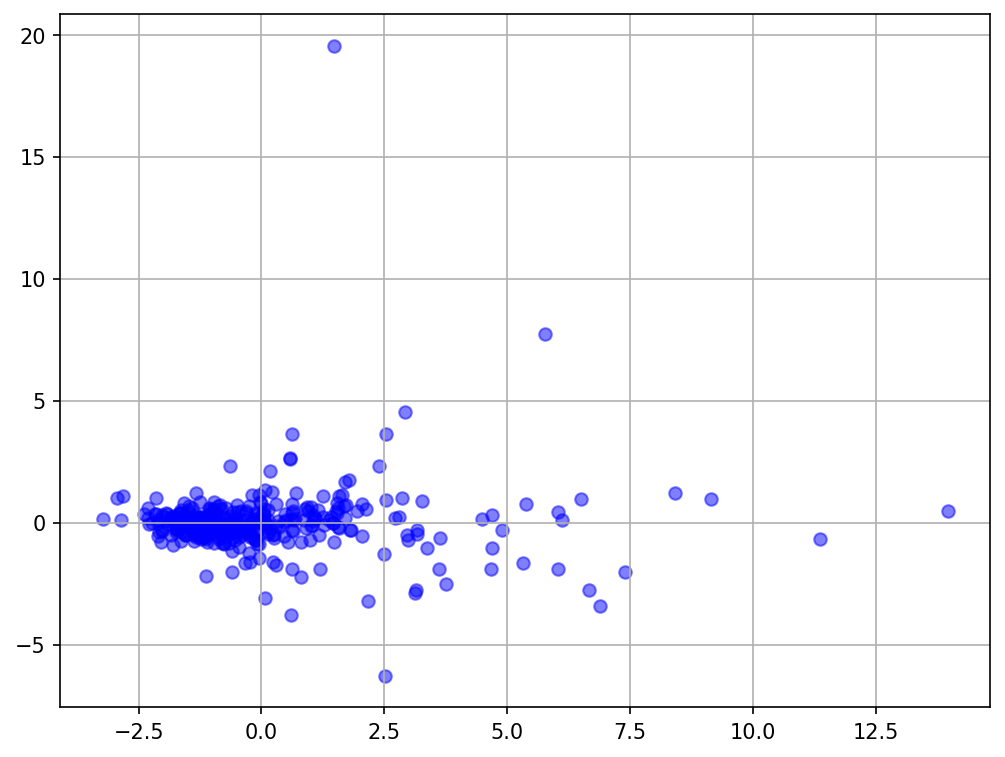

In [315]:
plt.figure(figsize=(8,6),dpi=150)
plt.scatter(principal_components[:,0],principal_components[:,1], c='b', marker='o', alpha=0.5)
plt.grid()

<h1>PCA Using Scikit-Learn</h1>

In [316]:
all_regions_data_filtered_

Agriculture Total  Area (km2)  Commercial Total  \
Local Authority                                                         
Barking and Dagenham          19.579120    642.5864       1553.253161   
Barnet                        74.342545   1474.7211       3601.821682   
Bexley                        27.661103   1092.8705       2295.186992   
Brent                         10.207251    734.9525       3713.265008   
Bromley                      134.075680   2552.2916       3078.271700   
...                                 ...         ...               ...   
Scarborough                 3139.385773  14033.5867       1254.015123   
Selby                       2159.358898  10237.7944        912.579429   
Sheffield                    764.241315   6254.8134       7975.425653   
Wakefield                    855.568610   5756.5366       4413.715040   
York                        1011.558455   4624.2516       2912.510527   

                      Domestic Total  Emissions per km2 (kt CO2e)  \
Local Authority                                                     
Barking and Dagenham     4693.536163                   409.106813   
Barnet                  12364.593312                   330.741682   
Bexley                   7289.514848                   290.768666   
Brent                    8663.648628                   557.320791   
Bromley                 11476.036567                   156.192098   
...                              ...                          ...   
Scarborough              4359.507361                    17.586032   
Selby                    3195.613204                    32.763694   
Sheffield               17158.808470                   148.418494   
Wakefield               10734.765687                   127.065455   
York                     6569.719860                    72.665497   

                      Industry Total  LULUCF Net Emissions  \
Local Authority                                              
Barking and Dagenham     3000.433754             43.106696   
Barnet                    898.185721             28.462209   
Bexley                   3191.273950             28.507405   
Brent                    2611.735053             50.682257   
Bromley                   706.049446           -134.951130   
...                              ...                   ...   
Scarborough              2566.630258           -664.828755   
Selby                    6856.004295            -25.943272   
Sheffield               10930.638873           -215.406431   
Wakefield                9633.743066            -95.993901   
York                     2258.631211             23.312244   

                      Per Capita Emissions (tCO2e)  \
Local Authority                                      
Barking and Dagenham                     82.282843   
Barnet                                   79.685098   
Bexley                                   79.981719   
Brent                                    77.356268   
Bromley                                  74.805600   
...                                            ...   
Scarborough                             133.270552   
Selby                                   232.716759   
Sheffield                                99.845601   
Wakefield                               129.556676   
York                                    100.546918   

                      Population ('000s, mid-year estimate)  \
Local Authority                                               
Barking and Dagenham                            3276.617269   
Barnet                                          6189.282139   
Bexley                                          4004.543634   
Brent                                           5379.886303   
Bromley                                         5367.002039   
...                                                     ...   
Scarborough                                     1852.336369   
Selby                                           1452.833306   
Sheffield                         

In [317]:
from sklearn.preprocessing import StandardScaler

In [318]:
scaler = StandardScaler()

In [319]:
scaled_X = scaler.fit_transform(all_regions_data_filtered_)

In [320]:
scaled_X

array([[-0.61833332, -0.38259894, -0.30971649, ..., -0.44885379,
        -0.67308165,  1.21899702],
       [-0.60373338, -0.35274045,  0.53087629, ...,  0.96859124,
         0.4805603 ,  1.10810053],
       [-0.61617866, -0.36644193, -0.00527745, ..., -0.30298709,
        -0.3868911 , -0.28478938],
       ...,
       [-0.41980616, -0.18122213,  2.325505  , ...,  2.15983182,
         1.46059924,  2.54567085],
       [-0.39545828, -0.1991012 ,  0.86402194, ...,  0.78179277,
         1.92653325,  1.47769091],
       [-0.35387134, -0.23972962,  0.24803001, ...,  0.12907337,
        -0.13292876, -0.5090408 ]])

In [321]:
from sklearn.decomposition import PCA

In [322]:
pca_model = PCA(n_components=2)

In [323]:
pca_model.fit(scaled_X)

PCA(n_components=2)

In [324]:
pca_model.transform(scaled_X)

array([[-1.28593926e-01,  3.93453242e-01],
       [ 2.71366394e+00,  1.87957651e-01],
       [ 3.00729837e-02,  3.22140522e-01],
       [ 2.05171358e+00,  7.63829087e-01],
       [ 1.46365905e+00, -5.22840498e-03],
       [ 2.52998153e+00,  3.65026489e+00],
       [ 1.47038913e+00,  1.95506148e+01],
       [ 1.94047910e+00,  4.62224795e-01],
       [ 1.71535510e+00,  7.41496867e-01],
       [ 1.42390230e+00,  2.35565468e-01],
       [ 9.26092561e-01,  6.39099833e-01],
       [ 7.63268546e-02,  1.33536757e+00],
       [ 1.69507197e-01,  2.10030471e+00],
       [-1.97973444e-02,  7.96025759e-01],
       [-1.26807607e-01,  3.13145326e-01],
       [ 1.00427789e+00, -1.30159366e-01],
       [ 3.27173912e+00,  8.70371043e-01],
       [ 1.57230383e+00,  1.08281767e+00],
       [ 5.82395156e-01,  2.63407227e+00],
       [ 6.22293368e-01,  3.62098893e+00],
       [-7.29249841e-01,  6.10851717e-01],
       [ 1.70060311e+00,  1.66686470e+00],
       [ 8.75938406e-01,  5.45732197e-01],
       [-2.

In [325]:
pc_results = pca_model.fit_transform(scaled_X)

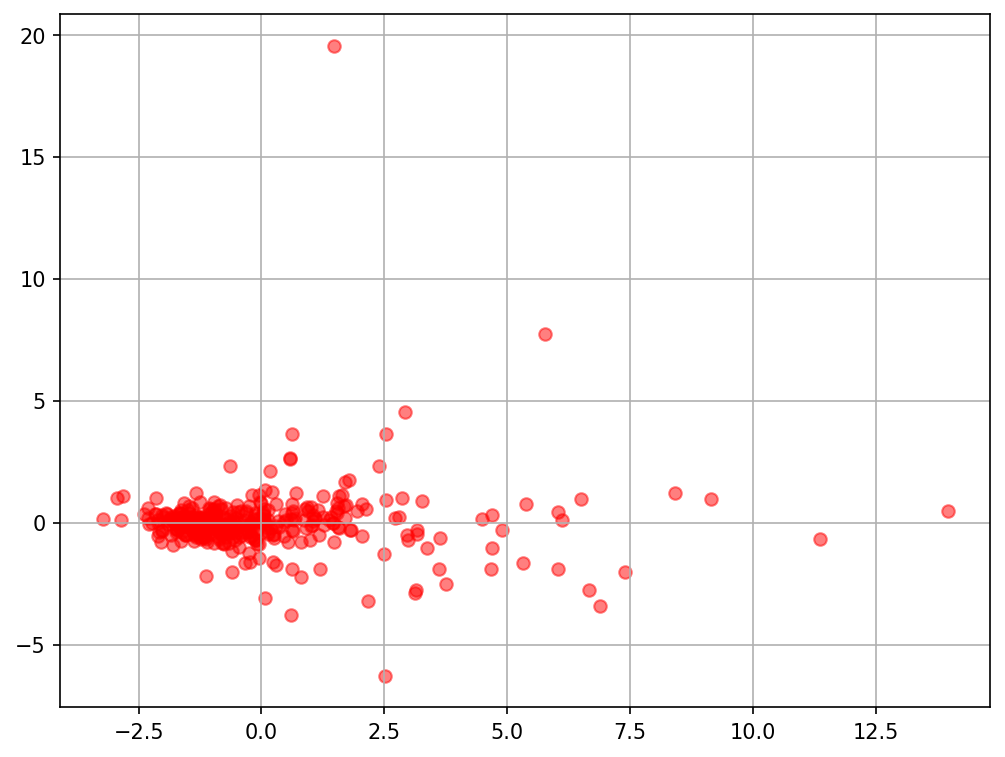

In [326]:
plt.figure(figsize=(8,6),dpi=150)
plt.scatter(pc_results[:,0],pc_results[:,1], c='r', marker='o', alpha=0.5)
plt.grid()

In [327]:
pca_model.components_

array([[ 0.05947605,  0.05224037,  0.35361081,  0.44728348,  0.08784852,
         0.08737687, -0.02620825, -0.0136846 ,  0.44830501,  0.398324  ,
         0.37885788,  0.38630496],
       [-0.36520247, -0.31650621,  0.35068733, -0.12406863,  0.61081826,
         0.05625305,  0.04329869,  0.40053519, -0.05462815,  0.16512104,
        -0.22024824, -0.10368841]])

In [328]:
df_comp = pd.DataFrame(pca_model.components_,index=['PC1','PC2'], columns=all_regions_data_filtered_.columns)

In [329]:
df_comp

Agriculture Total  Area (km2)  Commercial Total  Domestic Total  \
PC1           0.059476    0.052240          0.353611        0.447283   
PC2          -0.365202   -0.316506          0.350687       -0.124069   

     Emissions per km2 (kt CO2e)  Industry Total  LULUCF Net Emissions  \
PC1                     0.087849        0.087377             -0.026208   
PC2                     0.610818        0.056253              0.043299   

     Per Capita Emissions (tCO2e)  Population ('000s, mid-year estimate)  \
PC1                     -0.013685                               0.448305   
PC2                      0.400535                              -0.054628   

     Public Sector Total  Transport Total  Waste Management Total  
PC1             0.398324         0.378858                0.386305  
PC2             0.165121        -0.220248               -0.103688

<Axes: >

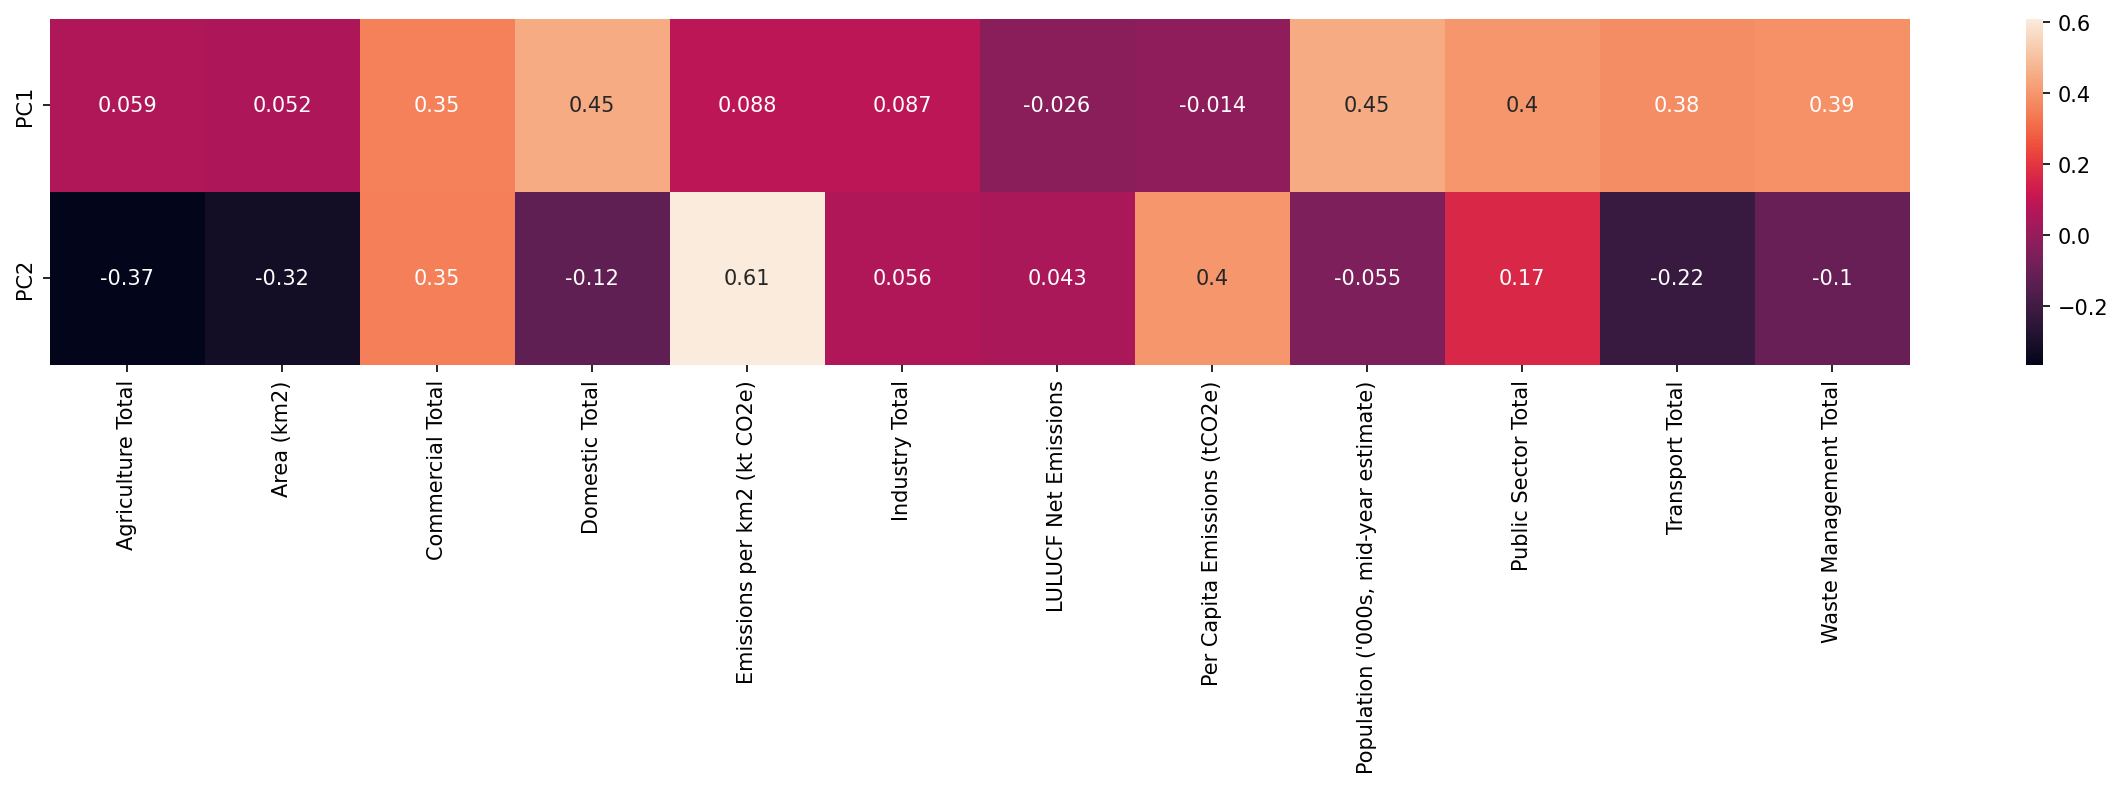

In [330]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp, annot=True)

In [331]:
pca_model.explained_variance_ratio_

array([0.37096602, 0.17258103])

In [332]:
np.sum(pca_model.explained_variance_ratio_)

0.5435470564113112

In [333]:
pca_12 = PCA(n_components = 12)

In [334]:
pca_12.fit(scaled_X)

PCA(n_components=12)

In [335]:
pca_12.explained_variance_ratio_

array([0.37096602, 0.17258103, 0.14975827, 0.09147278, 0.08087781,
       0.04174231, 0.02842277, 0.0272774 , 0.01865068, 0.01244211,
       0.00470402, 0.00110479])

In [336]:
np.sum(pca_12.explained_variance_ratio_)

0.9999999999999999

In [337]:
explained_variance = []

for n in range(1,12):
  pca= PCA(n_components=n)
  pca.fit(scaled_X)

  explained_variance.append(np.sum(pca.explained_variance_ratio_))

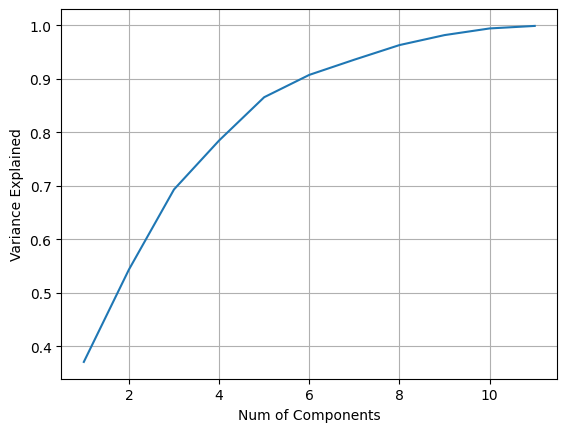

In [338]:
plt.plot(range(1,12),explained_variance)
plt.xlabel('Num of Components')
plt.ylabel('Variance Explained')
plt.grid()

<h1>PCA Calibration</h1>

In [339]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [340]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_regions_data_filtered_)

In [341]:
# Step 2: Apply PCA and choose the number of components based on explained variance
pca = PCA().fit(scaled_data)

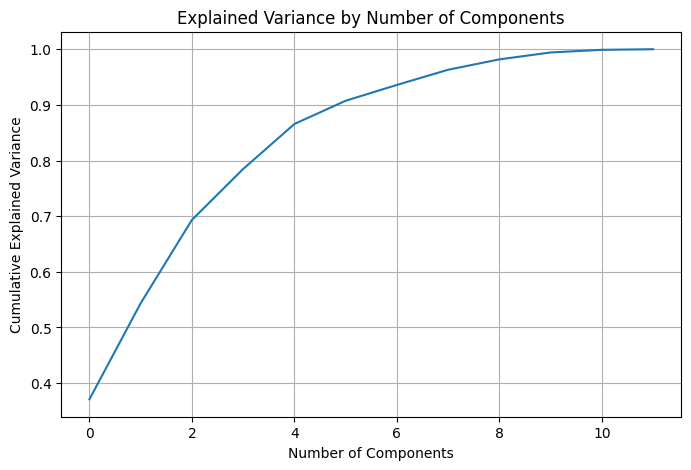

In [342]:
# Step 3: Determine the number of components to retain
# Plot the cumulative sum of explained variance to decide how many components is optimal
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [343]:
# Based on the plot above, the number of components 6 components explain 90% of variance:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

PCA(n_components=6)

In [344]:
# Step 4: Transform the data using the PCA model
transformed_data = pca.transform(scaled_data)

In [345]:
# Step 5: Create a DataFrame with the PCA features
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(transformed_data, columns=pca_columns, index=all_regions_data_filtered_.index)


In [346]:
components_df = pd.DataFrame(pca.components_, columns=all_regions_data_filtered_.columns, index=pca_columns)


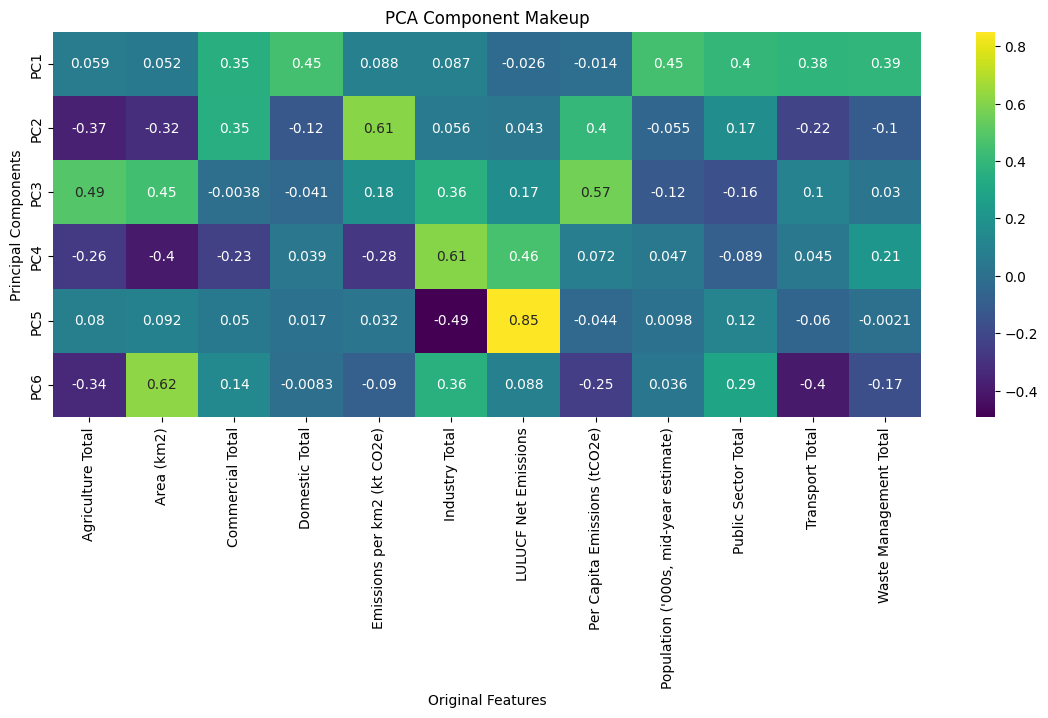

In [347]:
# Step 6: Visualize the PCA component makeup
plt.figure(figsize=(14, 5))
sns.heatmap(components_df, annot=True, cmap='viridis')
plt.title('PCA Component Makeup')
plt.ylabel('Principal Components')
plt.xlabel('Original Features')
plt.show()

In [348]:
# Step 7: The explained variance by each principal component
print("Explained variance by each component: ", pca.explained_variance_ratio_)


Explained variance by each component:  [0.37096602 0.17258103 0.14975827 0.09147278 0.08087781 0.04174231]


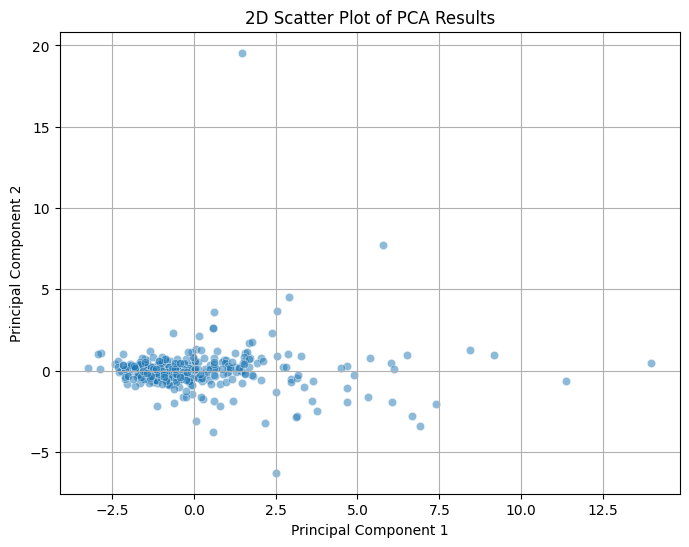

In [349]:
# Create a 2D scatter plot using the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title('2D Scatter Plot of PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


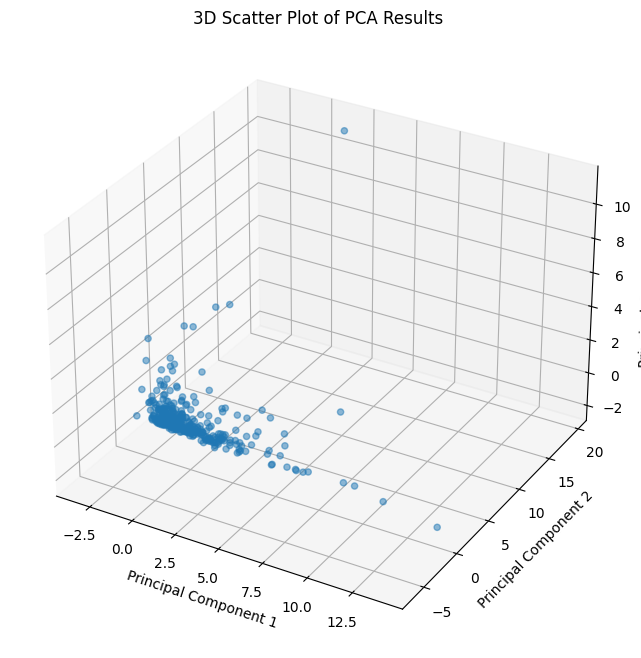

In [350]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5)

ax.set_title('3D Scatter Plot of PCA Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


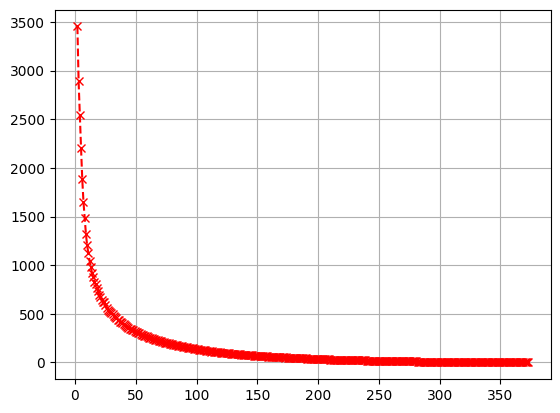

In [351]:
X = all_regions_data_filtered_

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

from sklearn.cluster import KMeans

k_values = range(2,374)

sum_squared_distance = []
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(scaled_X)

  sum_squared_distance.append(model.inertia_)

plt.plot(k_values, sum_squared_distance,'x--', color='red')
plt.grid(True)

In [352]:
#pd.Series(sum_squared_distance).diff().plot(kind='bar', color='red')

In [353]:
pip install kneed

In [354]:
from kneed import KneeLocator

knee_locator = KneeLocator(k_values, sum_squared_distance, curve='convex', direction='decreasing')

# The optimal k is where the elbow is located
optimal_k = knee_locator.elbow

print(f"The optimal k is: {optimal_k}")


The optimal k is: 45


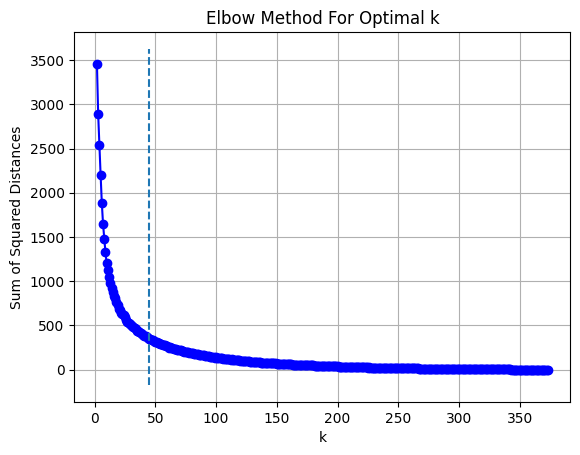

In [355]:
plt.plot(k_values, sum_squared_distance, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.grid()
plt.show()

<h1>Choosing K=32</h1>

In [356]:
model = KMeans(n_clusters=32)
model.fit(scaled_X)

KMeans(n_clusters=32)

In [357]:
X['K=32 Cluster Labels'] = model.labels_

<Axes: >

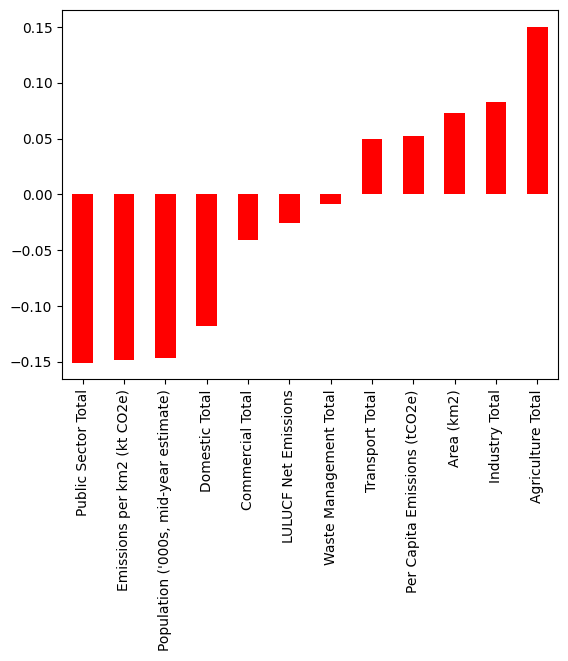

In [358]:
X.corr()['K=32 Cluster Labels'].iloc[:-1].sort_values().plot(kind='bar', color='red')

In [360]:
all_regions_data_filtered_['K=32 Cluster Labels'] = model.labels_
pca_df['K=32 Cluster Labels'] = model.labels_

In [370]:
model.labels_.shape

(374,)

In [378]:
pca_df

PC1       PC2       PC3       PC4       PC5  \
Local Authority                                                          
Barking and Dagenham -0.128594  0.393453 -0.643029  0.330815 -0.058487   
Barnet                2.713664  0.187958 -1.114811  0.113135  0.211386   
Bexley                0.030073  0.322141 -0.802694  0.065639 -0.046094   
Brent                 2.051714  0.763829 -0.918244  0.172872  0.162269   
Bromley               1.463659 -0.005228 -1.124338 -0.013746  0.085503   
...                        ...       ...       ...       ...       ...   
Scarborough          -1.307369 -0.335389 -0.072605 -0.376426 -0.284654   
Selby                -1.428600 -0.127965  0.406047  0.201079 -0.345055   
Sheffield             6.124410  0.093747 -0.971568  0.562967 -0.109381   
Wakefield             3.171462 -0.288767 -0.371144  0.644893 -0.317744   
York                  0.031429  0.073943 -0.681790 -0.105088  0.043921   

                           PC6  K=32 Cluster Labels  
Local Authority                                      
Barking and Dagenham -0.136944                   16  
Barnet               -0.043582                    6  
Bexley                0.135635                    0  
Brent                 0.075974                    6  
Bromley               0.162618                    6  
...                        ...                  ...  
Scarborough           0.134967                   25  
Selby                -0.237068                    4  
Sheffield             0.336472                    1  
Wakefield            -0.419978                   28  
York                  0.201305                    0  

[374 rows x 7 columns]

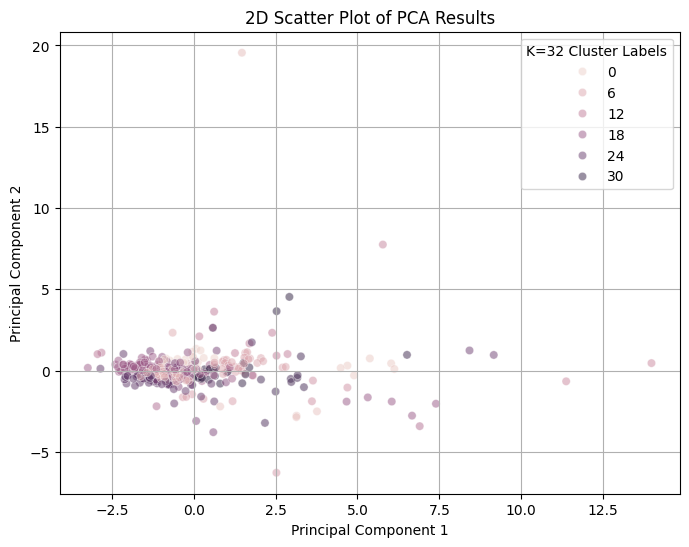

In [361]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='K=32 Cluster Labels', data=pca_df, alpha=0.5)
plt.title('2D Scatter Plot of PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [377]:
pca_df.index

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       ...
       'North East Lincolnshire', 'North Lincolnshire', 'Richmondshire',
       'Rotherham', 'Ryedale', 'Scarborough', 'Selby', 'Sheffield',
       'Wakefield', 'York'],
      dtype='object', name='Local Authority', length=374)

In [390]:
pca_df["Local Authority"].index

KeyError: 'Local Authority'

<h1>DBSCAN Cluster</h1>